<a href="https://colab.research.google.com/github/atish-pramanik-99/machine_learning/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Price Prediction
# Capstone Project Notes -1  & Notes -2 submission
#### By Atish Pramanik

## Problem Statement

As a house value is simply more than location and square footage. Like the features that make up a person, an educated party would want to know all aspects that give a house its value. For example, if we want to sell a house and we don't know the price which we can take, as it can't be too low or too high. To find house price we usually try to find similar properties in our neighbourhood and based on collected data we trying to assess our house price.

# DATA LOADING

First, we will load the data from the given xlsx(Microsoft Excel Worksheet) file provided as part of the Capstone Project.

In [ ]:
# loading the library required for data loading and processing
import pandas as pd
import numpy as np

#Supress warnings
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()

In [ ]:
# read the data using pandas function from 'innercity.csv' file
house_df = pd.read_excel('innercity.xlsx')

In [ ]:
# let's check whether data loaded successfully or not, by checking first few records
house_df.head()

cid         dayhours     price  room_bed  room_bath  \
0  3.876101e+09  20150427T000000  600000.0       4.0       1.75   
1  3.145600e+09  20150317T000000  190000.0       2.0       1.00   
2  7.129303e+09  20140820T000000  735000.0       4.0       2.75   
3  7.338220e+09  20141010T000000  257000.0       3.0       2.50   
4  7.950301e+09  20150218T000000  450000.0       2.0       1.00   

   living_measure  lot_measure ceil coast  sight  ... basement  yr_built  \
0          3050.0       9440.0  1.0   0.0    0.0  ...   1250.0    1966.0   
1           670.0       3101.0  1.0   0.0    0.0  ...      0.0    1948.0   
2          3040.0       2415.0  2.0   1.0    4.0  ...      0.0    1966.0   
3          1740.0       3721.0  2.0   0.0    0.0  ...      0.0    2009.0   
4          1120.0       4590.0  1.0   0.0    0.0  ...      0.0    1924.0   

   yr_renovated  zipcode      lat     long  living_measure15  lot_measure15  \
0           0.0  98034.0  47.7228 -122.183            2020.0         8660.0   
1           0.0  98118.0  47.5546 -122.274            1660.0         4100.0   
2           0.0  98118.0  47.5188 -122.256            2620.0         2433.0   
3           0.0  98002.0  47.3363 -122.213            2030.0         3794.0   
4           0.0  98118.0  47.5663 -122.285            1120.0         5100.0   

  furnished  total_area  
0       0.0     12490.0  
1       0.0      3771.0  
2       0.0      5455.0  
3       0.0      5461.0  
4       0.0      5710.0  

[5 rows x 23 columns]

***Data is loaded successfully as we can see first 5 records from the dataset.***

### Data Understanding

After loading data into our pandas library dataframe, we can now try to understand the kind of data we have with us.

In [ ]:
house_df.shape

(21613, 23)

***We have more than 21k records having 23 features***

In [ ]:
# let's check out the columns/features we have in the dataset

house_df.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area'],
      dtype='object')

From the above we can see the different columns we have in dataset.

These columns provide below information

<ol>
    <li><b>cid:</b> Notation for a house. Will not of our use. So we will drop this column</li>
    <li><b>dayhours:</b> Represents Date, when house was sold.</li>
    <li><b>price:</b> It's our TARGET feature, that we have to predict based on other featues</li>
    <li><b>room_bed:</b> Represents number of bedrooms in a house</li>
    <li><b>room_bath:</b> Represents number of bathrooms</li>
    <li><b>living_measure:</b> Represents square footage of house</li>
    <li><b>lot_measure:</b> Represents square footage of lot</li>
    <li><b>ceil:</b> Represents number of floors in house</li>
    <li><b>coast:</b> Represents whether house has waterfront view. It seems to be a categorical variable. We will see in our further data analysis</li>
    <li><b>sight:</b> Represents how many times sight has been viewed.</li>
    <li><b>condition:</b> Represents the overall condition of the house. It's kind of rating given to the house.</li>
    <li><b>quality:</b> Represents grade given to the house based on grading system</li>
    <li><b>ceil_measure:</b> Represents square footage of house apart from basement</li>
    <li><b>basement:</b> Represents square footage of basement</li>
    <li><b>yr_built:</b> Represents the year when house was built</li>
    <li><b>yr_renovated:</b> Represents the year when house was last renovated</li>
    <li><b>zipcode:</b> Represents zipcode as name implies</li>
    <li><b>lat:</b> Represents Lattitude co-ordniates</li>
    <li><b>long:</b> Represents Longitude co-ordinates</li>
    <li><b>living_measure15:</b> Represents square footage of house, when measured in 2015 year as house area may or may not changed after renovation if any happened</li>
    <li><b>lot_measure15:</b> Represents square footage of lot, when measured in 2015 year as lot area may or may not change after renovation if any done</li>
    <li><b>furnished:</b> Tells whether house is furnished or not. It seems to be categorical variable as description implies</li>
    <li><b>total_area:</b> Represents total area i.e. area of both living and lot</li>
</ol>

In [ ]:
# let's see the data types of the features
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  float64
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  float64
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21571 non-null  object 
 8   coast             21612 non-null  object 
 9   sight             21556 non-null  float64
 10  condition         21556 non-null  object 
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21612 non-null  object 
 15  yr_renovated      21613 non-null  float64
 16  zipcode           21613 non-null  float6

In the dataset, we have more than 21k+ records and 23 columns, out of which
<li> 16 features are of float type </li>
<li> 7 feature is of object type (we may need to convert this object type to specific datatype) </li>

In [ ]:
# let's check whether our dataset have any null/missing values
house_df.isnull().sum()

cid                   0
dayhours              0
price                 0
room_bed            108
room_bath           108
living_measure       17
lot_measure          42
ceil                 42
coast                 1
sight                57
condition            57
quality               1
ceil_measure          1
basement              1
yr_built              1
yr_renovated          0
zipcode               0
lat                   0
long                  0
living_measure15    166
lot_measure15        29
furnished            29
total_area           29
dtype: int64

***We have any null or missing values for any of the columns***

In [ ]:
# let's check whether there's any duplicate record in our dataset or not. If present, we have to remove them
house_df.duplicated().sum()

0

***We don't have any duplicate record in out dataset. So we can say we have more than 21k Unique records***

In [ ]:
# let's do the 5 - factor analysis of the features

house_df.describe().transpose()

count          mean           std           min  \
cid               21613.0  4.580302e+09  2.876566e+09  1.000102e+06   
price             21613.0  5.401822e+05  3.673622e+05  7.500000e+04   
room_bed          21505.0  3.371355e+00  9.302886e-01  0.000000e+00   
room_bath         21505.0  2.115171e+00  7.702481e-01  0.000000e+00   
living_measure    21596.0  2.079861e+03  9.184961e+02  2.900000e+02   
lot_measure       21571.0  1.510458e+04  4.142362e+04  5.200000e+02   
sight             21556.0  2.343663e-01  7.664376e-01  0.000000e+00   
quality           21612.0  7.656857e+00  1.175484e+00  1.000000e+00   
ceil_measure      21612.0  1.788367e+03  8.281025e+02  2.900000e+02   
basement          21612.0  2.915225e+02  4.425808e+02  0.000000e+00   
yr_renovated      21613.0  8.440226e+01  4.016792e+02  0.000000e+00   
zipcode           21613.0  9.807794e+04  5.350503e+01  9.800100e+04   
lat               21613.0  4.756005e+01  1.385637e-01  4.715590e+01   
living_measure15  21447.0  1.987066e+03  6.855196e+02  3.990000e+02   
lot_measure15     21584.0  1.276654e+04  2.728699e+04  6.510000e+02   
furnished         21584.0  1.967198e-01  3.975279e-01  0.000000e+00   

                           25%           50%           75%           max  
cid               2.123049e+09  3.904930e+09  7.308900e+09  9.900000e+09  
price             3.219500e+05  4.500000e+05  6.450000e+05  7.700000e+06  
room_bed          3.000000e+00  3.000000e+00  4.000000e+00  3.300000e+01  
room_bath         1.750000e+00  2.250000e+00  2.500000e+00  8.000000e+00  
living_measure    1.429250e+03  1.910000e+03  2.550000e+03  1.354000e+04  
lot_measure       5.040000e+03  7.618000e+03  1.068450e+04  1.651359e+06  
sight             0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00  
quality           7.000000e+00  7.000000e+00  8.000000e+00  1.300000e+01  
ceil_measure      1.190000e+03  1.560000e+03  2.210000e+03  9.410000e+03  
basement          0.000000e+00  0.000000e+00  5.600000e+02  4.820000e+03  
yr_renovated      0.000000e+00  0.000000e+00  0.000000e+00  2.015000e+03  
zipcode           9.803300e+04  9.806500e+04  9.811800e+04  9.819900e+04  
lat               4.747100e+01  4.757180e+01  4.767800e+01  4.777760e+01  
living_measure15  1.490000e+03  1.840000e+03  2.360000e+03  6.210000e+03  
lot_measure15     5.100000e+03  7.620000e+03  1.008700e+04  8.712000e+05  
furnished         0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00

<ol>
    <li><b>CID:</b> House ID/Property ID.Not used for analysis</li>
    <li><b>Dayhours:</b> 5 factor analysis is reflecting for this column</li>
    <li><b>price:</b> Our taget column value is in 75k - 7700k range. As Mean > Median, it's <b>Right-Skewed</b>.</li>
    <li><b>room_bed:</b> Number of bedrooms range from 0 - 33. As Mean slightly > Median, it's <b>slightly Right-Skewed.</b></li>
    <li><b>room_bath:</b> Number of bathrooms range from 0 - 8. As Mean slightly &lt; Median, it's <b>slightly Left-Skewed</b>.</li>
    <li><b>living_measure:</b> Square footage of house range from 290 - 13,540. As Mean > Median, it's <b>Right-Skewed</b>.</li>
    <li><b>lot_measure:</b> Square footage of lot range from 520 - 16,51,359. As Mean almost double of Median, it's <b>Hightly Right-Skewed</b>.</li>
    <li><b>ceil:</b> </li>
    <li><b>coast:</b> </li>
    <li><b>sight:</b> Value ranges from 0 - 4. As Mean > Median, it's <b>Right-Skewed</b></li>
    <li><b>condition:</b> </li>
    <li><b>quality:</b> Representign grade given to house which range from 1 - 13. As Mean > Median, it's <b>Right-Skewed</b>.</li>
    <li><b>ceil_measure:</b> Square footage of house apart from basement ranges in 290 - 9,410. As Mean > Median, it's <b>Right-Skewed</b>.</li>
    <li><b>basement:</b> Square footage house basement ranges in 0 - 4,820. As Mean highlty > Median, it's <b>Highly Right-Skewed</b>.</li>
    <li><b>yr_built:</b> </li>
    <li><b>yr_renovated:</b> House renovation year only 2015. So this column can be used as <b>Categorical Variable</b> for knowing whether house is renovated or not.</li>
    <li><b>zipcode:</b> House ZipCode ranges from 98001 - 98199. As Mean > Median, it's <b>Right-Skewed</b>.</li>
    <li><b>lat:</b> Lattitude ranges from 47.1559 - 47.7776 As Mean &lt; Median, it's <b>Left-Skewed</b>.</li>
    <li><b>long:</b></li>
    <li><b>living_measure15:</b> Value ragnes from 399 to 6,210. As Mean > Median, it's <b>Right-Skewed</b>.</li>
    <li><b>lot_measure15:</b> Value ragnes from 651 to 8,71,200. As Mean highly > Median, it's <b>Highly Right-Skewed</b>.</li>
    <li><b>furnished:</b> Representing whether house is furnished or not. It's a <b>Categorical Variable</b></li>
    <li><b>total_area</b> </li>
</ol>

From above analysis we got to know,

Most columns distribution is Right-Skewed and only few features are Left-Skewed (like room_bath lat).

We have columns which are Categorical in nature are -> coast, yr_renovated, furnished  

# DATA PROCESSING

### Addition / Removal of variables

We can see that <b>long</b> variable has a missing data and it will be hard to denote the value for it, whereas we know the zipcode of every property, so we can drop the <b>lat</b> and <b>long</b> variable. For this its better to use the City name for its data with the help of zipcode and using the <b>uszipcode</b> library for getting the City names. <b>cid</b> can also be removed as its a unique identifier having no use in model making. For model making <b>Dayhours</b> have no use other than just analysis, but we have to change in to month-year format to use this variable.

In [ ]:
#we will create new data frame that can be used for modeling
#We will convert the dayhours to 'month_year' as sale month-year is relevant for analysis

house_df.dayhours=house_df.dayhours.str.replace('T000000', "")
house_df.dayhours=pd.to_datetime(house_df.dayhours,format='%Y%m%d')
house_df['month_year']=house_df['dayhours'].apply(lambda x: x.strftime('%B-%Y'))
house_df['month_year'].head()

0       April-2015
1       March-2015
2      August-2014
3     October-2014
4    February-2015
Name: month_year, dtype: object

In [ ]:
#Binning Basement to analyse data
def create_basement_group(series):
    if series == 0:
        return "No"
    elif series > 0:
        return "Yes"

house_df['has_basement'] = house_df['basement'].apply(create_basement_group)

In [ ]:
#Lets try to group yr_renovated
#Binning Basement to analyse data
def create_renovated_group(series):
    if series == 0:
        return "No"
    elif series > 0:
        return "Yes"

house_df['has_renovated'] = house_df['yr_renovated'].apply(create_renovated_group)

#### A new column City is introduced just for analysis it will be removed later

In [ ]:
import uszipcode

In [ ]:
from uszipcode import SearchEngine

In [ ]:
search = SearchEngine()

In [ ]:
def zco(x):
    city = search.by_zipcode(x).major_city
    return city if city else 'None'

In [ ]:
house_df['zipcode'] = house_df['zipcode'].astype(int)

In [ ]:
house_df['City'] = house_df['zipcode'].apply(zco)

In [ ]:
#Dropping the feature not required in 1st Iteration
house_df=house_df.drop(['cid','dayhours','lat','long'],axis=1)

### Treating missing values

#### room_bed

In [ ]:
print(house_df['room_bed'].mode())

0    3.0
dtype: float64


In [ ]:
house_df['room_bed'].fillna(3.0, inplace=True)

#### room_bath

In [ ]:
house_df['room_bath'].mode()

0    2.5
dtype: float64

In [ ]:
house_df['room_bath'].fillna(2.5, inplace=True)

In [ ]:
house_df['room_bath'].unique()

array([1.75, 1.  , 2.75, 2.5 , 1.5 , 3.5 , 2.  , 2.25, 3.  , 4.  , 3.25,
       3.75, 5.  , 0.75, 5.5 , 4.25, 4.5 , 4.75, 8.  , 6.75, 5.25, 6.  ,
       0.  , 1.25, 5.75, 7.5 , 6.5 , 0.5 , 7.75, 6.25])

#### living_measure

In [ ]:
house_df['living_measure'].median()

1910.0

In [ ]:
house_df['living_measure'].fillna(1910.0, inplace=True)

#### lot_measure

In [ ]:
house_df['lot_measure'].median()

7618.0

In [ ]:
house_df['lot_measure'].fillna(7618.0, inplace=True)

#### ceil

In [ ]:
house_df['ceil'].unique()

array([1.0, 2.0, 3.0, 1.5, 2.5, '$', nan, 3.5], dtype=object)

In [ ]:
house_df['ceil'].mode()

0    1.0
dtype: object

In [ ]:
house_df['ceil'].fillna(1.0, inplace=True)

In [ ]:
house_df['ceil'] = house_df['ceil'].replace(['$'], 1.0)

In [ ]:
house_df['ceil'].unique()

array([1. , 2. , 3. , 1.5, 2.5, 3.5])

#### coast

In [ ]:
house_df['coast'].unique()

array([0.0, 1.0, '$', nan], dtype=object)

In [ ]:
house_df['coast'].mode()

0    0.0
dtype: object

In [ ]:
house_df['coast'].fillna(0.0, inplace=True)

In [ ]:
house_df['coast'] = house_df['coast'].replace(['$'], 0.0)

In [ ]:
house_df['coast'].unique()

array([0., 1.])

#### sight

In [ ]:
house_df['sight'].mode()

0    0.0
dtype: float64

In [ ]:
house_df['sight'].fillna(0.0, inplace=True)

#### condition

In [ ]:
house_df['condition'].unique()

array([3.0, 4.0, 5.0, 2.0, nan, 1.0, '$'], dtype=object)

In [ ]:
house_df['condition'].mode()

0    3.0
dtype: object

In [ ]:
house_df['condition'].fillna(3.0, inplace=True)

In [ ]:
house_df['condition'] = house_df['condition'].replace(['$'], 3.0)

#### quality

In [ ]:
house_df['quality'].mode()

0    7.0
dtype: float64

In [ ]:
house_df['quality'].fillna(7.0, inplace=True)

#### ceil_measure

In [ ]:
house_df['ceil_measure'].median()

1560.0

In [ ]:
house_df['ceil_measure'].fillna(1560.0, inplace=True)

#### basement

In [ ]:
house_df['basement'].median()

0.0

In [ ]:
house_df['basement'].fillna(0.0, inplace=True)

#### living_measure15

In [ ]:
house_df['living_measure15'].median()

1840.0

In [ ]:
house_df['living_measure15'].fillna(1840.0, inplace=True)

#### lot_measure15

In [ ]:
house_df['lot_measure15'].median()

7620.0

In [ ]:
house_df['lot_measure15'].fillna(7620.0, inplace=True)

#### furnished

In [ ]:
house_df['furnished'].mode()

0    0.0
dtype: float64

In [ ]:
house_df['furnished'].fillna(0.0, inplace=True)

#### total_area
Since total_area is a numeric variable but its in object format, thus we have to convert in into int then only we can use median in this variable.

In [ ]:
house_df['total_area']= house_df['total_area'].replace(['$'], np.nan)

In [ ]:
house_df['total_area'].astype(float)

0        12490.0
1         3771.0
2         5455.0
3         5461.0
4         5710.0
          ...   
21608    63597.0
21609     5871.0
21610    38122.0
21611     9360.0
21612     6815.0
Name: total_area, Length: 21613, dtype: float64

In [ ]:
house_df['total_area'].median()

9575.0

In [ ]:
house_df['total_area'].fillna(9575.0, inplace=True)

#### yr_built

In [ ]:
house_df['yr_built'].mode()

0    2014.0
dtype: object

In [ ]:
house_df['yr_built'].fillna(2014.0, inplace=True)
house_df['yr_built']= house_df['yr_built'].replace(['$'],2014.0)
#house_df['yr_built'] = house_df['yr_built'].astype(str).astype(float)
#house_df['yr_built'] = house_df['yr_built'].astype(int)
#house_df['yr_built'].head()

#### has_basement

In [ ]:
house_df['has_basement'].mode()

0    No
dtype: object

In [ ]:
house_df['has_basement'].fillna('No', inplace=True)

In [ ]:
house_df.isnull().sum()

price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
zipcode             0
living_measure15    0
lot_measure15       0
furnished           0
total_area          0
month_year          0
has_basement        0
has_renovated       0
City                0
dtype: int64

All the missing values and unknown values are rectified.

### Outlier Treatment

To know the original outliers for the object variable

In [ ]:
def boxplot(column,nbins):

    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=house_df[column])
    plt.show()

cat = []
num = []
for i in house_df.columns:
    if house_df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat)
print(num)

['month_year', 'has_basement', 'has_renovated', 'City']
['price', 'room_bed', 'room_bath', 'living_measure', 'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality', 'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode', 'living_measure15', 'lot_measure15', 'furnished', 'total_area']


BoxPlot of price
----------------------------------------------------------------------------


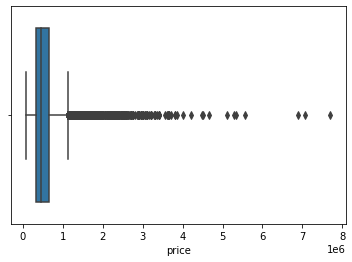

BoxPlot of room_bed
----------------------------------------------------------------------------


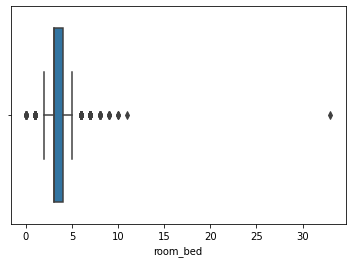

BoxPlot of room_bath
----------------------------------------------------------------------------


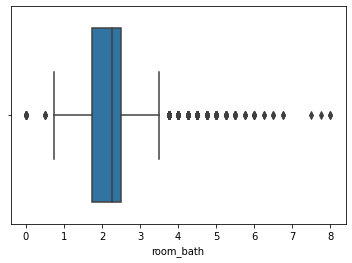

BoxPlot of living_measure
----------------------------------------------------------------------------


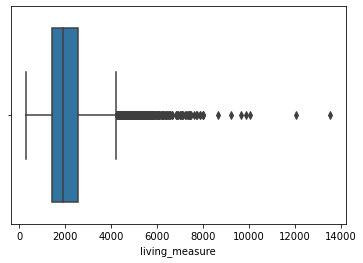

BoxPlot of lot_measure
----------------------------------------------------------------------------


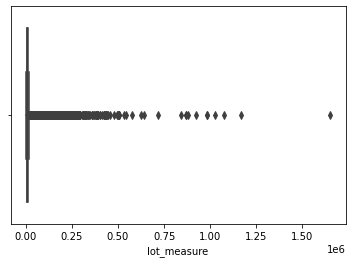

BoxPlot of ceil
----------------------------------------------------------------------------


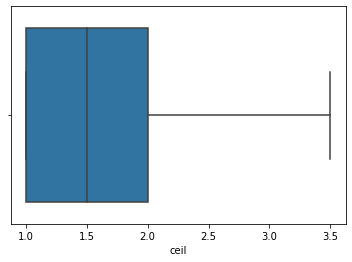

BoxPlot of coast
----------------------------------------------------------------------------


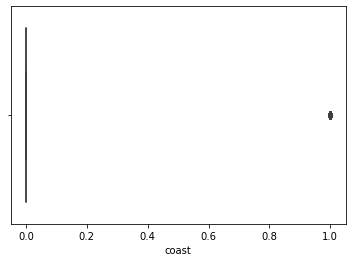

BoxPlot of sight
----------------------------------------------------------------------------


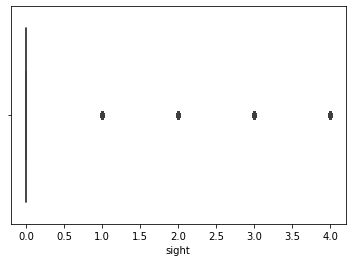

BoxPlot of condition
----------------------------------------------------------------------------


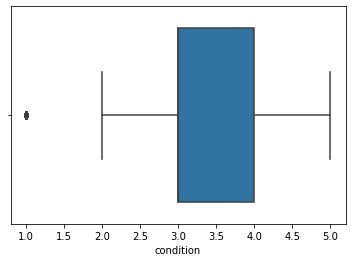

BoxPlot of quality
----------------------------------------------------------------------------


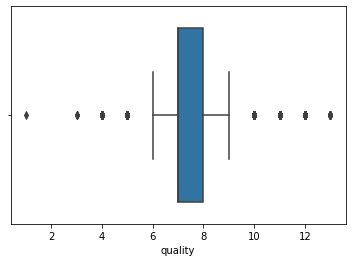

BoxPlot of ceil_measure
----------------------------------------------------------------------------


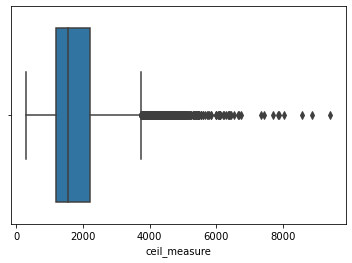

BoxPlot of basement
----------------------------------------------------------------------------


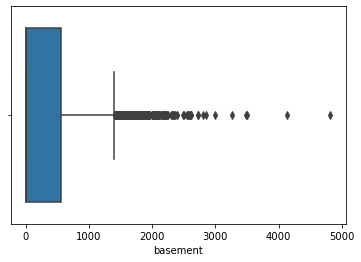

BoxPlot of yr_built
----------------------------------------------------------------------------


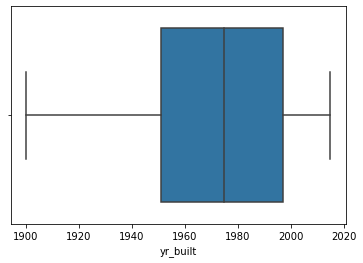

BoxPlot of yr_renovated
----------------------------------------------------------------------------


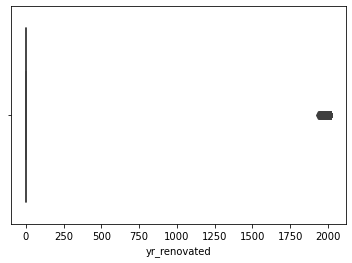

BoxPlot of zipcode
----------------------------------------------------------------------------


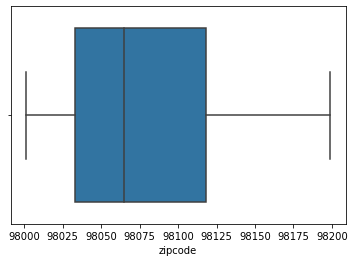

BoxPlot of living_measure15
----------------------------------------------------------------------------


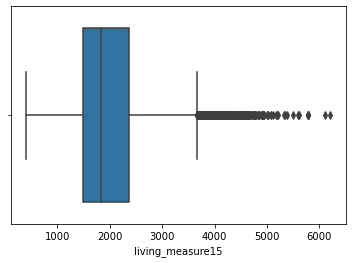

BoxPlot of lot_measure15
----------------------------------------------------------------------------


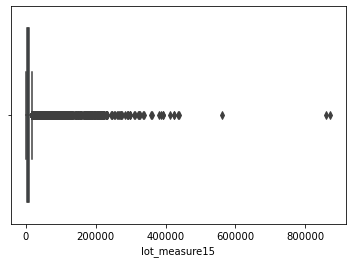

BoxPlot of furnished
----------------------------------------------------------------------------


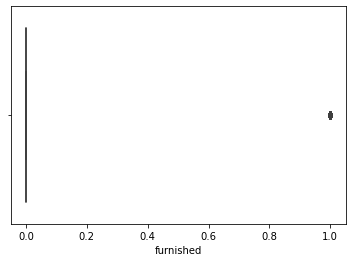

BoxPlot of total_area
----------------------------------------------------------------------------


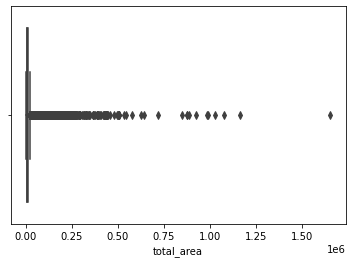

In [ ]:
for x in num:
    boxplot(x,20)

Treating outliers are not done in categorical variables, it's only done on numeric continuous variables. Capping the outliers is done here. Only for <b>room_bed</b> we found 33 as a outlier since the price for it so low, so we are removing it.

In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5 * IQR)
    upper_range=Q3+(1.5 * IQR)
    return lower_range, upper_range

In [ ]:
lr,ur=remove_outlier(house_df["living_measure"])
house_df["living_measure"]=np.where(house_df["living_measure"]>ur,ur,house_df["living_measure"])
house_df["living_measure"]=np.where(house_df["living_measure"]<lr,lr,house_df["living_measure"])

lr,ur=remove_outlier(house_df["lot_measure"])
house_df["lot_measure"]=np.where(house_df["lot_measure"]>ur,ur,house_df["lot_measure"])
house_df["lot_measure"]=np.where(house_df["lot_measure"]<lr,lr,house_df["lot_measure"])

lr,ur=remove_outlier(house_df["ceil_measure"])
house_df["ceil_measure"]=np.where(house_df["ceil_measure"]>ur,ur,house_df["ceil_measure"])
house_df["ceil_measure"]=np.where(house_df["ceil_measure"]<lr,lr,house_df["ceil_measure"])

lr,ur=remove_outlier(house_df["basement"])
house_df["basement"]=np.where(house_df["basement"]>ur,ur,house_df["basement"])
house_df["basement"]=np.where(house_df["basement"]<lr,lr,house_df["basement"])

lr,ur=remove_outlier(house_df["living_measure15"])
house_df["living_measure15"]=np.where(house_df["living_measure15"]>ur,ur,house_df["living_measure15"])
house_df["living_measure15"]=np.where(house_df["living_measure15"]<lr,lr,house_df["living_measure15"])

lr,ur=remove_outlier(house_df["lot_measure15"])
house_df["lot_measure15"]=np.where(house_df["lot_measure15"]>ur,ur,house_df["lot_measure15"])
house_df["lot_measure15"]=np.where(house_df["lot_measure15"]<lr,lr,house_df["lot_measure15"])

lr,ur=remove_outlier(house_df["total_area"])
house_df["total_area"]=np.where(house_df["total_area"]>ur,ur,house_df["total_area"])
house_df["total_area"]=np.where(house_df["total_area"]<lr,lr,house_df["total_area"])

BoxPlot of price
----------------------------------------------------------------------------


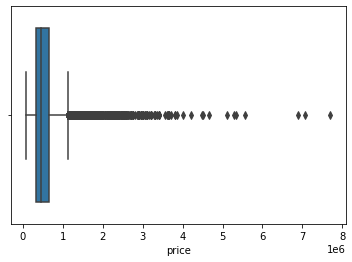

BoxPlot of room_bed
----------------------------------------------------------------------------


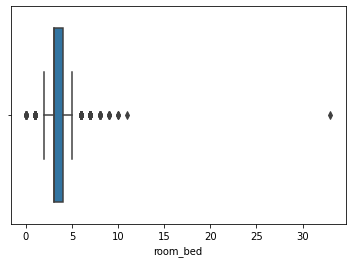

BoxPlot of room_bath
----------------------------------------------------------------------------


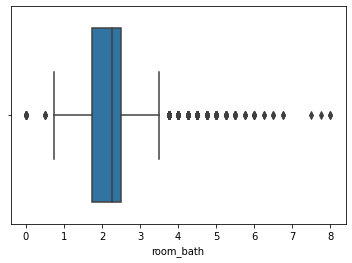

BoxPlot of living_measure
----------------------------------------------------------------------------


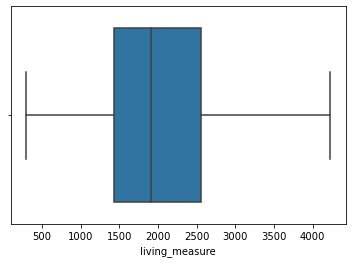

BoxPlot of lot_measure
----------------------------------------------------------------------------


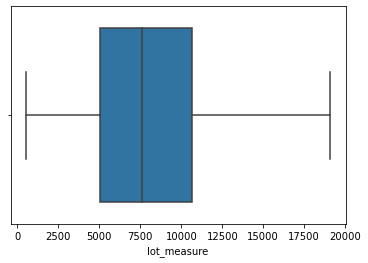

BoxPlot of ceil
----------------------------------------------------------------------------


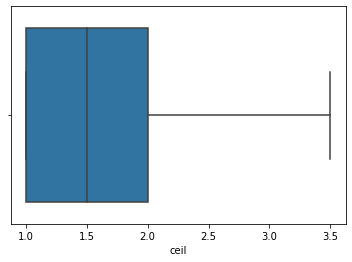

BoxPlot of coast
----------------------------------------------------------------------------


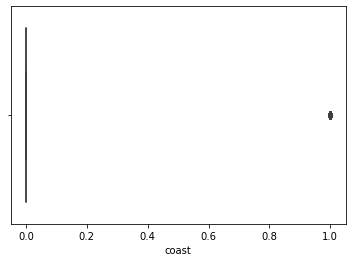

BoxPlot of sight
----------------------------------------------------------------------------


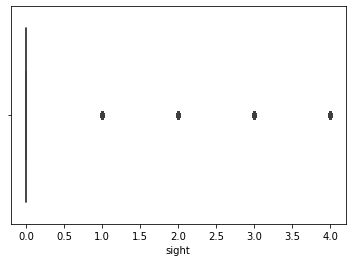

BoxPlot of condition
----------------------------------------------------------------------------


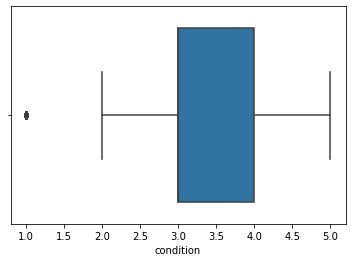

BoxPlot of quality
----------------------------------------------------------------------------


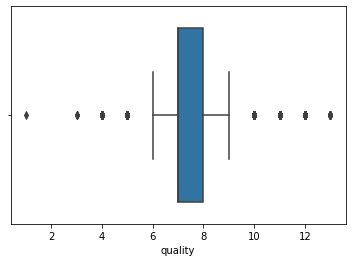

BoxPlot of ceil_measure
----------------------------------------------------------------------------


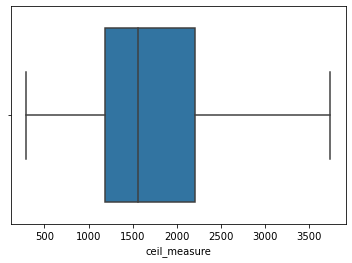

BoxPlot of basement
----------------------------------------------------------------------------


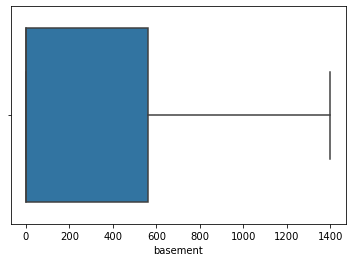

BoxPlot of yr_built
----------------------------------------------------------------------------


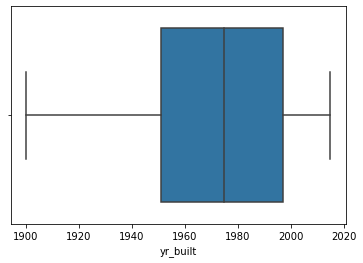

BoxPlot of yr_renovated
----------------------------------------------------------------------------


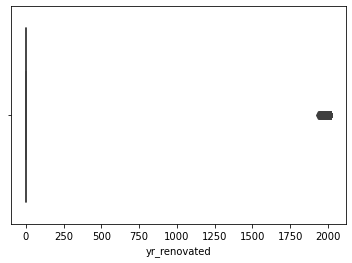

BoxPlot of zipcode
----------------------------------------------------------------------------


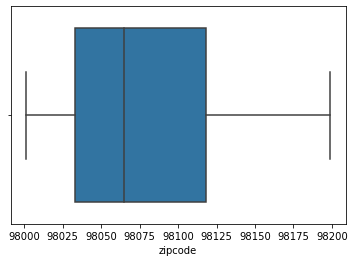

BoxPlot of living_measure15
----------------------------------------------------------------------------


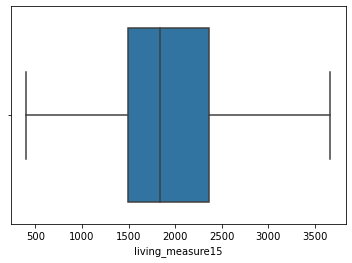

BoxPlot of lot_measure15
----------------------------------------------------------------------------


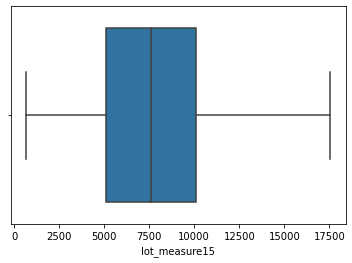

BoxPlot of furnished
----------------------------------------------------------------------------


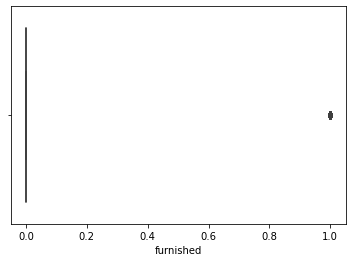

BoxPlot of total_area
----------------------------------------------------------------------------


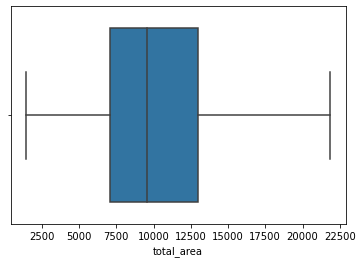

In [ ]:
for x in num:
    boxplot(x,20)

#### Treating outliers for column - room_bed

In [ ]:
#As we know for room_bed = 33 was outlier from our earlier findings, let's see the record and drop it
house_df[house_df['room_bed']==33]

price  room_bed  room_bath  living_measure  lot_measure  ceil  \
16913  640000.0      33.0       1.75          1620.0       6000.0   1.0   

       coast  sight  condition  quality  ...  yr_renovated  zipcode  \
16913    0.0    0.0        5.0      7.0  ...           0.0    98103   

       living_measure15  lot_measure15  furnished  total_area  month_year  \
16913            1330.0         4700.0        0.0      7620.0   June-2014   

       has_basement  has_renovated     City  
16913           Yes             No  Seattle  

[1 rows x 23 columns]

In [ ]:
#dropping the record from the dataset
house_df.drop(house_df[ (house_df.room_bed == 33) ].index, inplace=True)

In [ ]:
house_df.shape

(21612, 23)

###  Variable transformation

In [ ]:
#let's verify the columns
house_df.columns

Index(['price', 'room_bed', 'room_bath', 'living_measure', 'lot_measure',
       'ceil', 'coast', 'sight', 'condition', 'quality', 'ceil_measure',
       'basement', 'yr_built', 'yr_renovated', 'zipcode', 'living_measure15',
       'lot_measure15', 'furnished', 'total_area', 'month_year',
       'has_basement', 'has_renovated', 'City'],
      dtype='object')

In [ ]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21612 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             21612 non-null  float64
 1   room_bed          21612 non-null  float64
 2   room_bath         21612 non-null  float64
 3   living_measure    21612 non-null  float64
 4   lot_measure       21612 non-null  float64
 5   ceil              21612 non-null  float64
 6   coast             21612 non-null  float64
 7   sight             21612 non-null  float64
 8   condition         21612 non-null  float64
 9   quality           21612 non-null  float64
 10  ceil_measure      21612 non-null  float64
 11  basement          21612 non-null  float64
 12  yr_built          21612 non-null  float64
 13  yr_renovated      21612 non-null  float64
 14  zipcode           21612 non-null  int32  
 15  living_measure15  21612 non-null  float64
 16  lot_measure15     21612 non-null  float6

In [ ]:
df_model = house_df.copy()

In [ ]:
# Getting dummies for columns ceil, coast, sight, condition, quality, yr_renovated, furnished
dff = pd.get_dummies(df_model, columns=['has_basement', 'has_renovated'],drop_first=True)

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
dff.columns

Index(['price', 'room_bed', 'room_bath', 'living_measure', 'lot_measure',
       'ceil', 'coast', 'sight', 'condition', 'quality', 'ceil_measure',
       'basement', 'yr_built', 'yr_renovated', 'zipcode', 'living_measure15',
       'lot_measure15', 'furnished', 'total_area', 'month_year', 'City',
       'has_basement_Yes', 'has_renovated_Yes'],
      dtype='object')

### Exploratory Data Analysis

Let's do some visual data analysis of the features. But some of the features needs their data type to be changed before cleaning or preprossing the data in the main dataframe. So for this reason, I have made a copy of the original dataframe for proper analysis of the variables.

In [ ]:
house_EDA = house_df.copy()

In [ ]:
def boxplot(column,nbins):

    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=house_EDA[column])
    plt.show()

In [ ]:
cat = []
num = []
for i in house_EDA.columns:
    if house_EDA[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat)
print(num)

['month_year', 'has_basement', 'has_renovated', 'City']
['price', 'room_bed', 'room_bath', 'living_measure', 'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality', 'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode', 'living_measure15', 'lot_measure15', 'furnished', 'total_area']


BoxPlot of price
----------------------------------------------------------------------------


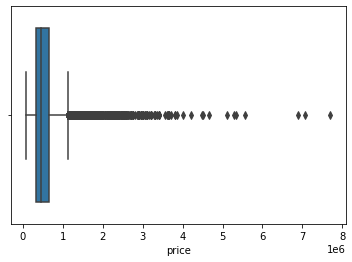

BoxPlot of room_bed
----------------------------------------------------------------------------


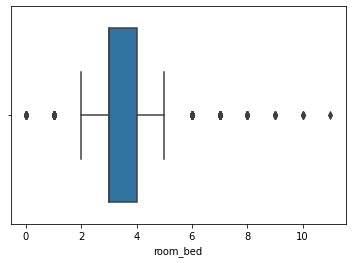

BoxPlot of room_bath
----------------------------------------------------------------------------


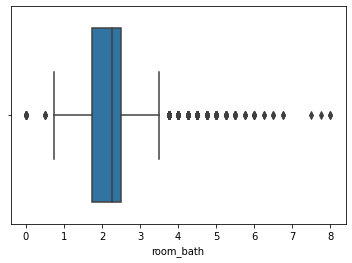

BoxPlot of living_measure
----------------------------------------------------------------------------


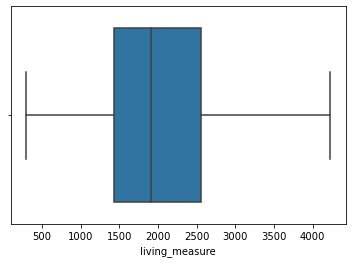

BoxPlot of lot_measure
----------------------------------------------------------------------------


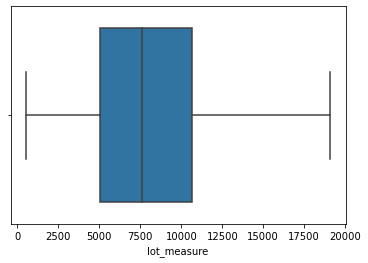

BoxPlot of ceil
----------------------------------------------------------------------------


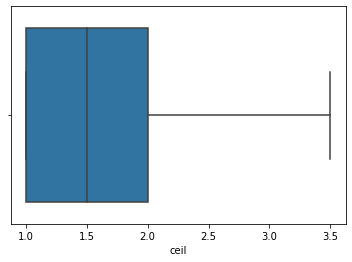

BoxPlot of coast
----------------------------------------------------------------------------


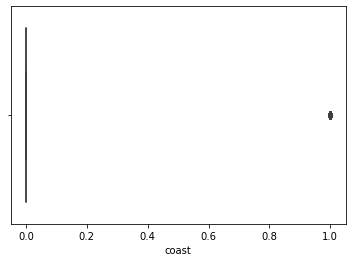

BoxPlot of sight
----------------------------------------------------------------------------


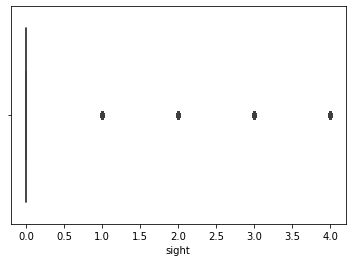

BoxPlot of condition
----------------------------------------------------------------------------


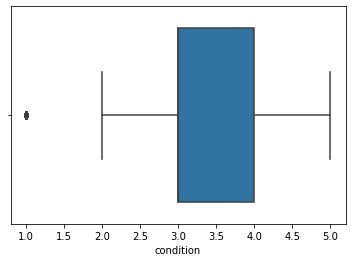

BoxPlot of quality
----------------------------------------------------------------------------


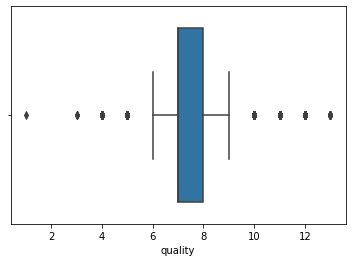

BoxPlot of ceil_measure
----------------------------------------------------------------------------


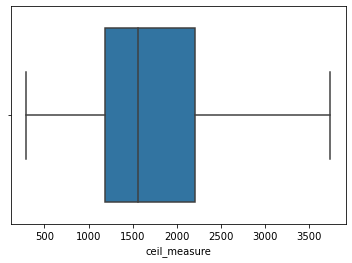

BoxPlot of basement
----------------------------------------------------------------------------


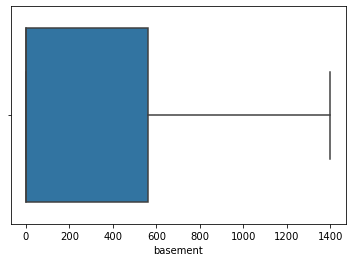

BoxPlot of yr_built
----------------------------------------------------------------------------


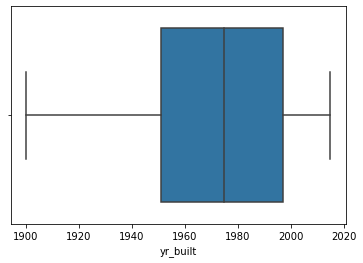

BoxPlot of yr_renovated
----------------------------------------------------------------------------


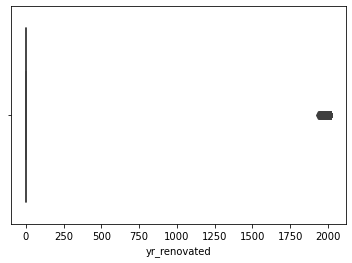

BoxPlot of zipcode
----------------------------------------------------------------------------


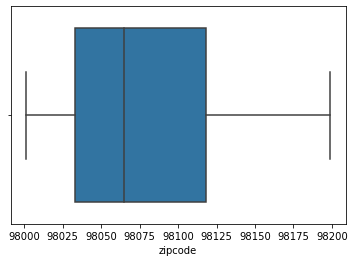

BoxPlot of living_measure15
----------------------------------------------------------------------------


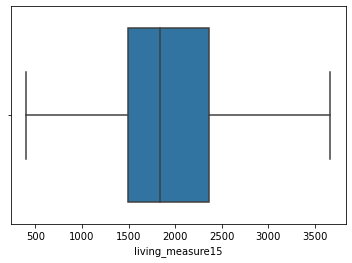

BoxPlot of lot_measure15
----------------------------------------------------------------------------


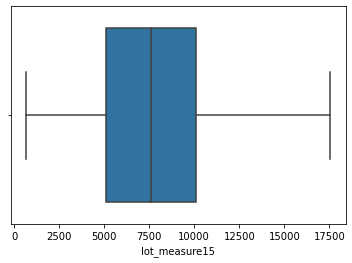

BoxPlot of furnished
----------------------------------------------------------------------------


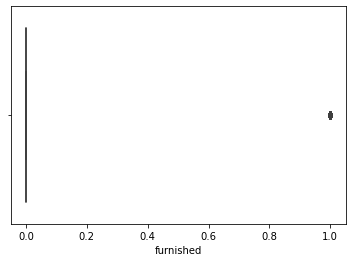

BoxPlot of total_area
----------------------------------------------------------------------------


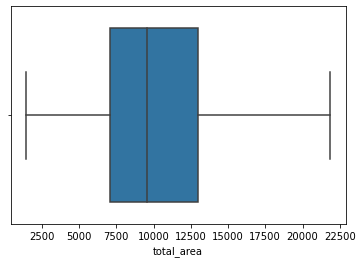

In [ ]:
for x in num:
    boxplot(x,20)

In [ ]:
def hist_plot(column,nbins):

    plt.figure()
    print("Countplot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.histplot(x=house_EDA[column])
    plt.show()

Countplot of price
----------------------------------------------------------------------------


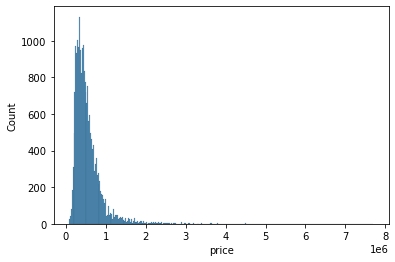

Countplot of room_bed
----------------------------------------------------------------------------


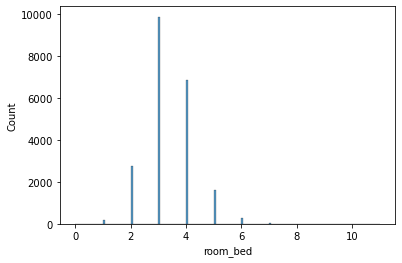

Countplot of room_bath
----------------------------------------------------------------------------


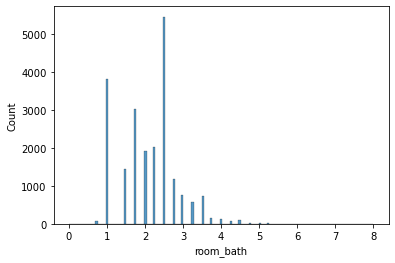

Countplot of living_measure
----------------------------------------------------------------------------


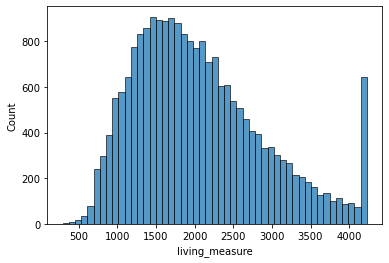

Countplot of lot_measure
----------------------------------------------------------------------------


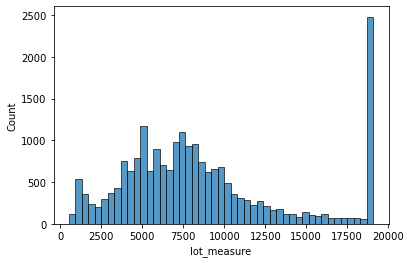

Countplot of ceil
----------------------------------------------------------------------------


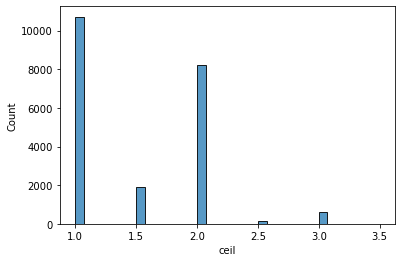

Countplot of coast
----------------------------------------------------------------------------


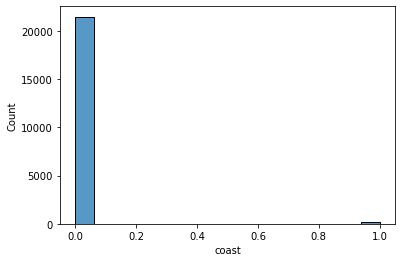

Countplot of sight
----------------------------------------------------------------------------


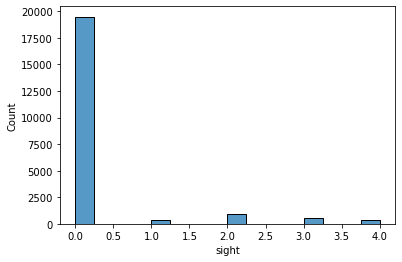

Countplot of condition
----------------------------------------------------------------------------


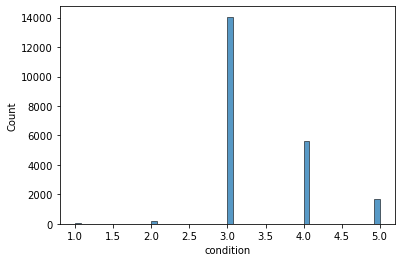

Countplot of quality
----------------------------------------------------------------------------


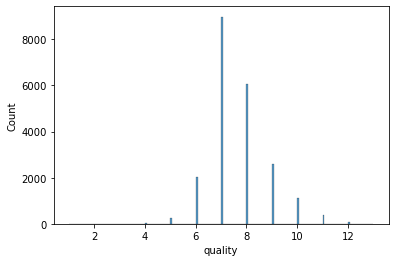

Countplot of ceil_measure
----------------------------------------------------------------------------


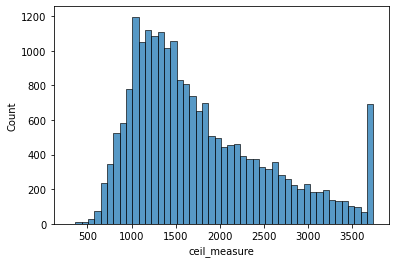

Countplot of basement
----------------------------------------------------------------------------


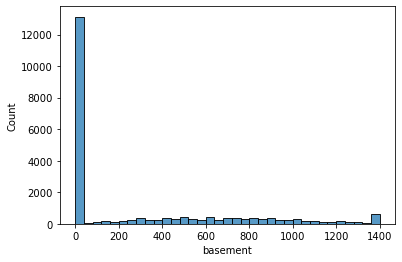

Countplot of yr_built
----------------------------------------------------------------------------


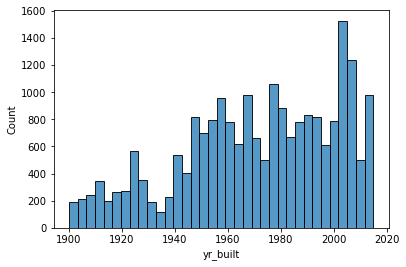

Countplot of yr_renovated
----------------------------------------------------------------------------


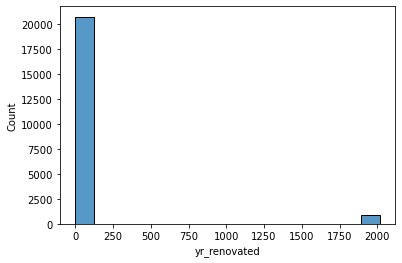

Countplot of zipcode
----------------------------------------------------------------------------


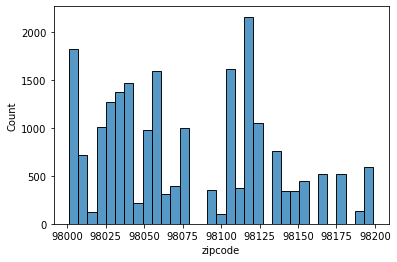

Countplot of living_measure15
----------------------------------------------------------------------------


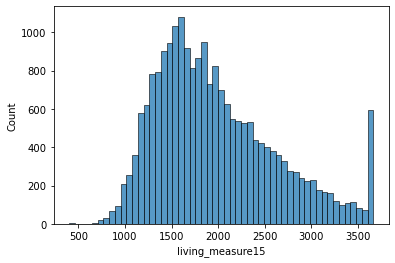

Countplot of lot_measure15
----------------------------------------------------------------------------


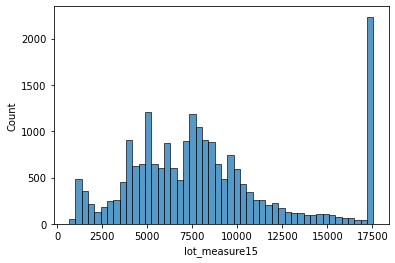

Countplot of furnished
----------------------------------------------------------------------------


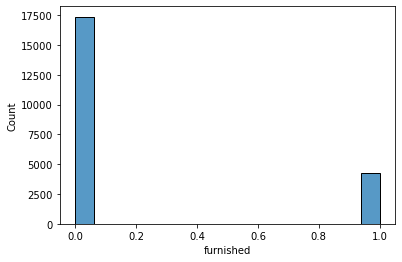

Countplot of total_area
----------------------------------------------------------------------------


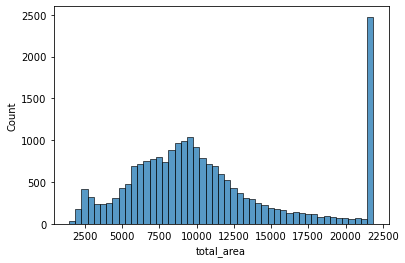

In [ ]:
for x in num:
    hist_plot(x,20)

#### Analyzing Feature: month-year from dayhours

We successfully converted dayhours feature to month_year for better analysis.

In [ ]:
house_EDA['month_year'].value_counts()

April-2015        2231
July-2014         2211
June-2014         2179
August-2014       1940
October-2014      1878
March-2015        1875
September-2014    1774
May-2014          1768
December-2014     1471
November-2014     1411
February-2015     1250
January-2015       978
May-2015           646
Name: month_year, dtype: int64

We can see most houses sold in April 2015, July 2014 and June 2014.

In [ ]:
house_EDA.groupby(['month_year'])['price'].agg('mean')

month_year
April-2015        561933.463021
August-2014       536527.039691
December-2014     524602.893270
February-2015     507919.603200
January-2015      525963.251534
July-2014         544892.161013
June-2014         558086.161083
March-2015        544057.683200
May-2014          548166.600113
May-2015          558193.095975
November-2014     522058.861800
October-2014      539127.477636
September-2014    529315.868095
Name: price, dtype: float64

So the time line of the sale data of the properties is from May-2014 to May-2015 and April month have the highest mean price.

#### Analyzing Feature: Price (our Target)

In [ ]:
house_EDA.price.describe()

count    2.161200e+04
mean     5.401775e+05
std      3.673701e+05
min      7.500000e+04
25%      3.218375e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

Text(0.5, 0, 'price')

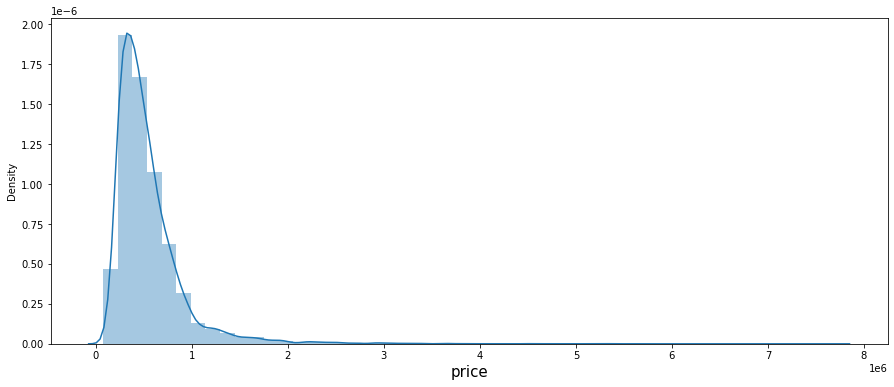

In [ ]:
plt.figure(figsize=(15, 6))
sns.distplot(house_EDA['price'])
plt.xlabel('price', fontsize=15)

The Price is ranging from 75,000 to 77,00,000 and distribution is right-skewed.

##### Analyzing Feature: room_bed

In [ ]:
house_EDA['room_bed'].value_counts()

3.0     9875
4.0     6854
2.0     2747
5.0     1595
6.0      270
1.0      197
7.0       38
8.0       13
0.0       13
9.0        6
10.0       3
11.0       1
Name: room_bed, dtype: int64

Text(0.5, 0, 'room_bed')

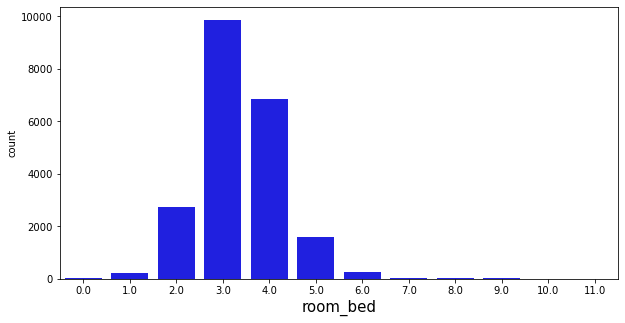

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(house_EDA.room_bed,color='blue')
plt.xlabel('room_bed', fontsize=15)

Most of the houses/properties have 3 to 4 bedrooms

#### Analyzing Feature: room_bath

0.00      10
0.50       4
0.75      72
1.00    3829
1.25       9
1.50    1439
1.75    3030
2.00    1917
2.25    2039
2.50    5466
2.75    1178
3.00     750
3.25     588
3.50     726
3.75     155
4.00     135
4.25      78
4.50     100
4.75      23
5.00      21
5.25      13
5.50      10
5.75       4
6.00       6
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
8.00       2
Name: room_bath, dtype: int64

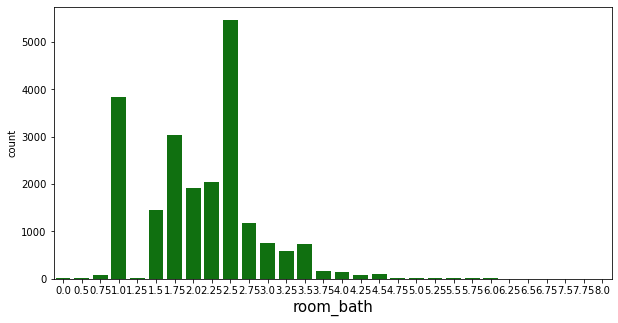

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(house_EDA.room_bath,color='green')
plt.xlabel('room_bath', fontsize=15)
house_EDA['room_bath'].value_counts().sort_index()

Majority of the properties have bathroom in the range of 1.0 to 2.5

Skewness is : 0.5050714799017976


<AxesSubplot:xlabel='room_bath', ylabel='Density'>

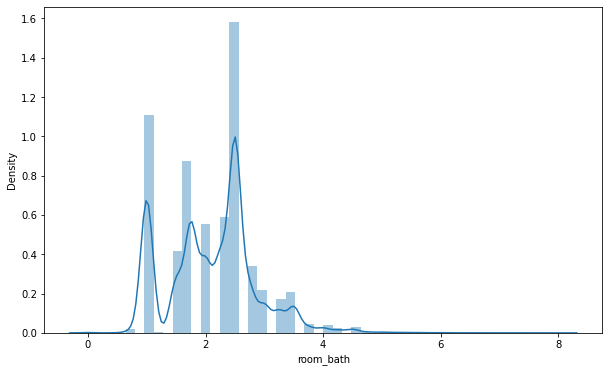

In [ ]:
plt.figure(figsize=(10, 6))
print("Skewness is :",house_EDA.room_bath.skew())
sns.distplot(house_EDA.room_bath)

#### Analyzing Feature: Living measure

Skewness is : 0.7289485274205487


count    21612.000000
mean      2057.807144
std        838.687255
min        290.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max       4230.000000
Name: living_measure, dtype: float64

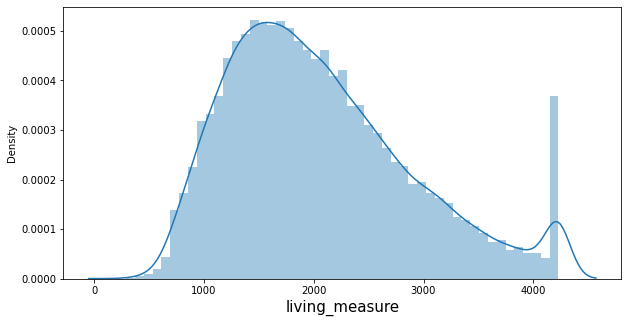

In [ ]:
#Data is skewed as visible from plot, as its distribution is normal
plt.figure(figsize=(10, 5))
print("Skewness is :",house_df.living_measure.skew())
sns.distplot(house_EDA.living_measure)
plt.xlabel('living_measure', fontsize=15)
house_EDA.living_measure.describe()

Data distribution tells us, living_measure is right-skewed.

Skewness is : 0.8262175608131131


count    21612.000000
mean      8693.629002
std       5023.785989
min        520.000000
25%       5043.000000
50%       7618.000000
75%      10660.250000
max      19085.500000
Name: lot_measure, dtype: float64

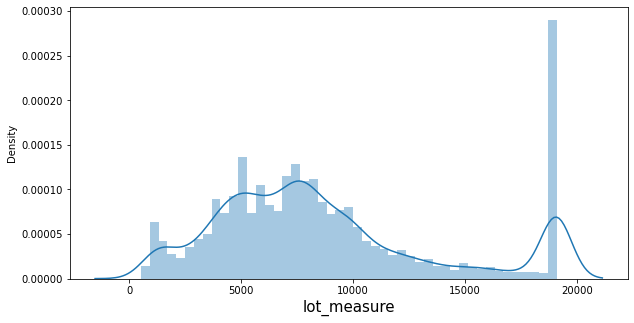

In [ ]:
#Data is skewed as visible from plot, as its distribution is normal
plt.figure(figsize=(10, 5))
print("Skewness is :",house_df.lot_measure.skew())
sns.distplot(house_EDA.lot_measure)
plt.xlabel('lot_measure', fontsize=15)
house_EDA.lot_measure.describe()

<AxesSubplot:xlabel='living_measure'>

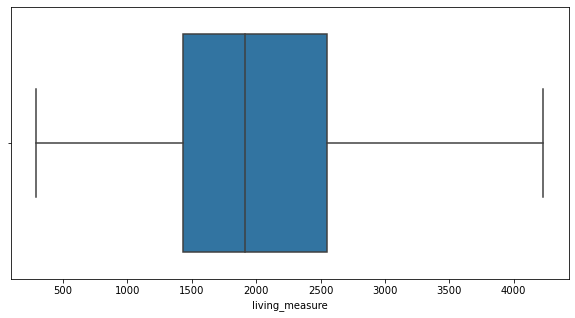

In [ ]:
#Let's plot the boxplot for living_measure
plt.figure(figsize=(10, 5))
sns.boxplot(house_EDA.living_measure)

#### Analyzing Feature: lot_measure

Skewness is : 0.8262175608131131


count    21612.000000
mean      8693.629002
std       5023.785989
min        520.000000
25%       5043.000000
50%       7618.000000
75%      10660.250000
max      19085.500000
Name: lot_measure, dtype: float64

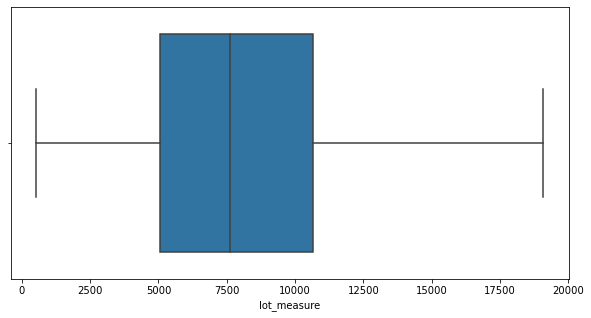

In [ ]:
#Data is skewed as visible from plot
plt.figure(figsize=(10, 5))
print("Skewness is :",house_EDA.lot_measure.skew())
sns.boxplot(house_EDA.lot_measure)
house_EDA.lot_measure.describe()

#### Analyzing Feature: ceil

In [ ]:
#let's see the ceil count for all the records
house_EDA.ceil.value_counts()

1.0    10718
2.0     8210
1.5     1905
3.0      610
2.5      161
3.5        8
Name: ceil, dtype: int64

Text(0.5, 0, 'ceil')

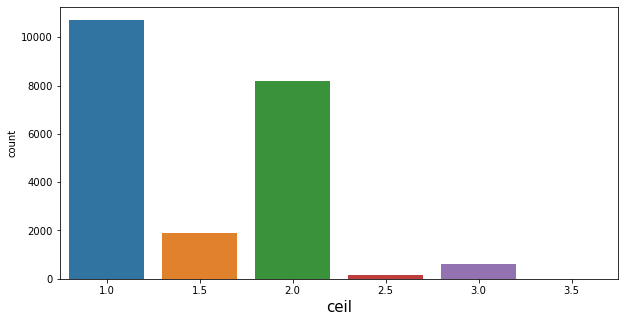

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot('ceil',data=house_EDA)
plt.xlabel('ceil', fontsize=15)

Above grapth confirming the same, that most properties have 1 and 2 floors

#### Analyzing Feature: coast

In [ ]:
#coast - most houses donot have waterfront view, very few are waterfront
house_EDA.coast.value_counts()

0.0    21451
1.0      161
Name: coast, dtype: int64

Text(0.5, 0, 'coast')

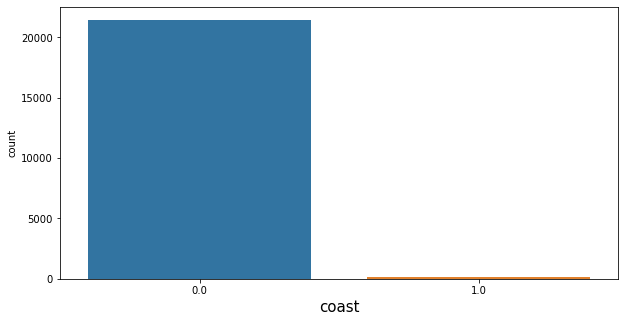

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot('coast',data=house_EDA)
plt.xlabel('coast', fontsize=15)

#### Analyzing Feature: sight

In [ ]:
#sight - most sights have not been viewed
house_EDA.sight.value_counts()

0.0    19493
2.0      959
3.0      510
1.0      332
4.0      318
Name: sight, dtype: int64

Text(0.5, 0, 'sight')

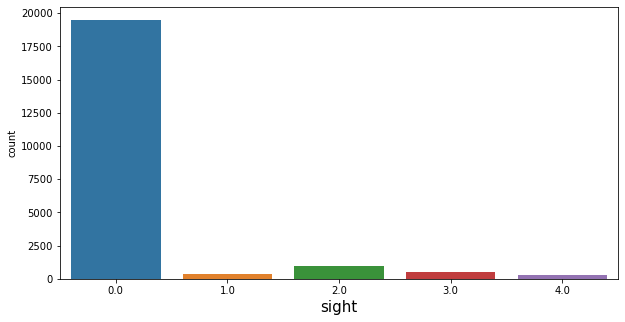

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot('sight',data=house_EDA)
plt.xlabel('sight', fontsize=15)

#### Analyzing Feature: condition

In [ ]:
#condition - Overall most houses are rated as 3 and above for its condition overall
house_EDA.condition.value_counts()

3.0    14063
4.0     5655
5.0     1693
2.0      171
1.0       30
Name: condition, dtype: int64

Text(0.5, 0, 'condition')

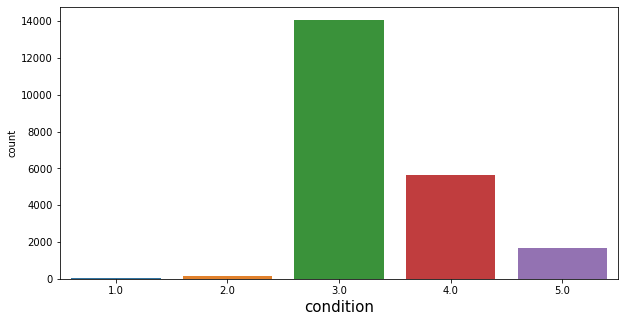

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot('condition',data=house_EDA)
plt.xlabel('condition', fontsize=15)

#### Analyzing Feature: quality

Text(0.5, 0, 'quality')

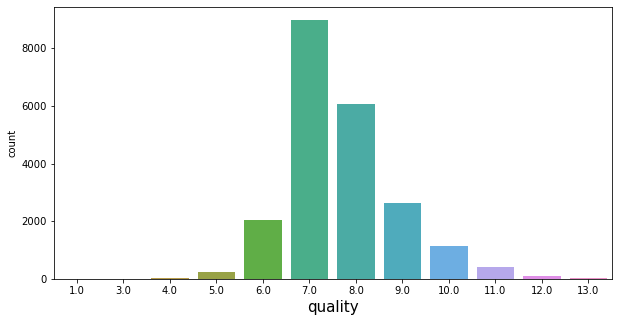

In [ ]:
#Quality - most properties have quality rating between 6 to 10
house_EDA.quality.value_counts()
plt.figure(figsize=(10, 5))
sns.countplot('quality',data=house_EDA)
plt.xlabel('quality', fontsize=15)

#### Analyzing Feature: ceil_measure

Skewness is : 0.9055234195688323


count    21612.000000
mean      1769.562095
std        764.023368
min        290.000000
25%       1190.000000
50%       1560.000000
75%       2210.000000
max       3740.000000
Name: ceil_measure, dtype: float64

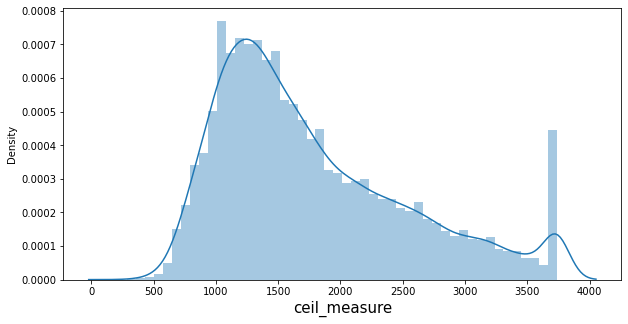

In [ ]:
#ceil_measure - its highly skewed
print("Skewness is :", house_EDA.ceil_measure.skew())
plt.figure(figsize=(10, 5))
sns.distplot(house_EDA.ceil_measure)
plt.xlabel('ceil_measure', fontsize=15)
house_EDA.ceil_measure.describe()

#### Analyzing Feature: basement

Text(0.5, 0, 'basement')

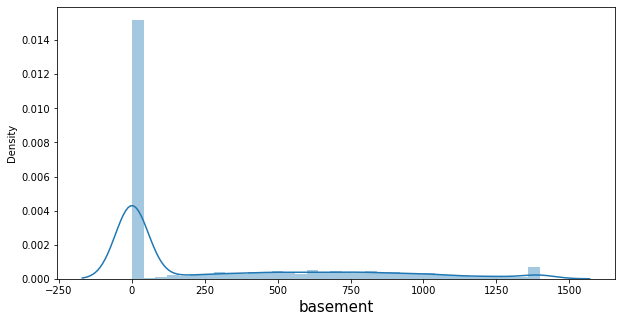

In [ ]:
#basement_measure
plt.figure(figsize=(10, 5))
sns.distplot(house_EDA.basement)
plt.xlabel('basement', fontsize=15)

From the graph, we can see that most of the properties are without basement.

In [ ]:
house_EDA[house_EDA.basement==0].shape

(13126, 23)

<AxesSubplot:xlabel='basement'>

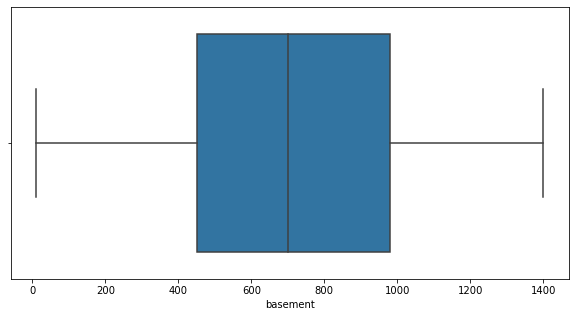

In [ ]:
#houses have zero measure of basement i.e. they donot have basements
#let's plot boxplot for properties which have basements only
house_EDA_base=house_EDA[house_EDA['basement']>0]
plt.figure(figsize=(10, 5))
sns.boxplot(house_EDA_base['basement'])

We can clearly see, there are outliers. We need to treat this before our model.

<AxesSubplot:xlabel='basement', ylabel='Density'>

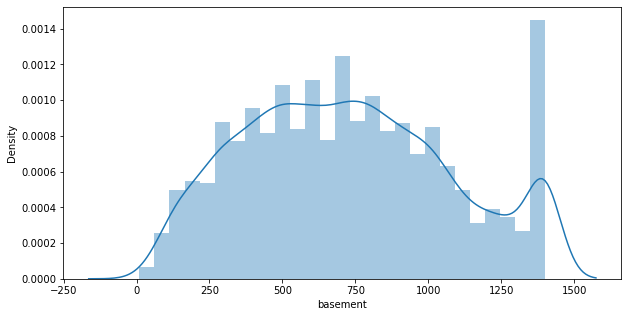

In [ ]:
#Distribution of houses having basement
plt.figure(figsize=(10, 5))
sns.distplot(house_EDA_base.basement)

Distribution having basement is right-skewed

#### Analyzing Feature: yr_built

In [ ]:
house_EDA.yr_built.value_counts()

2014.0    574
2006.0    454
2005.0    450
2004.0    433
2003.0    421
         ... 
1933.0     30
1901.0     29
1902.0     27
1935.0     24
1934.0     21
Name: yr_built, Length: 116, dtype: int64

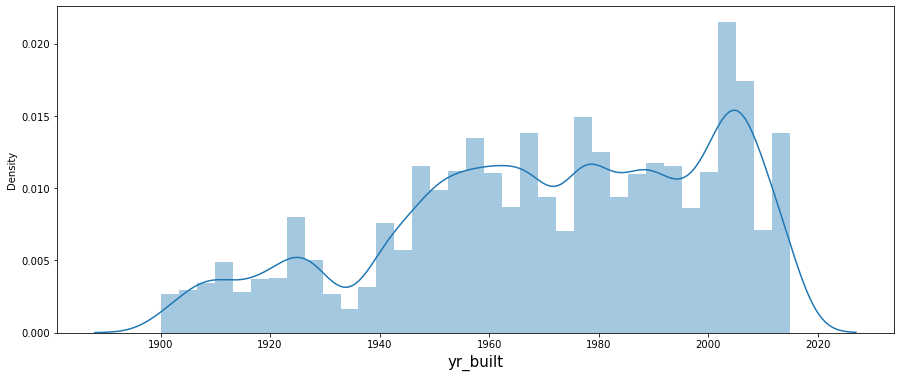

In [ ]:
#house range from new to very old
plt.figure(figsize=(15, 6))
sns.distplot(house_EDA.yr_built)
plt.xlabel('yr_built', fontsize=15)
plt.show()

#### Analyzing Feature: yr_renovated

In [ ]:
house_EDA[house_EDA['yr_renovated']>0].shape

(914, 23)

Text(0.5, 0, 'yr_renovated')

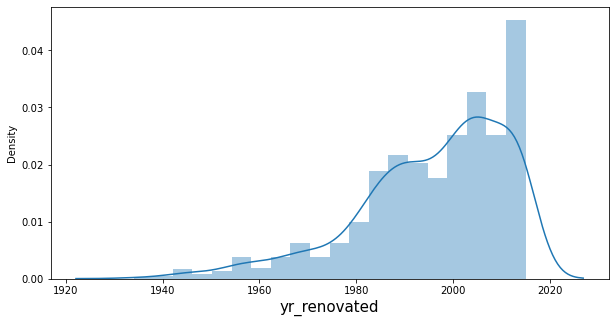

In [ ]:
#yr_renovated - plot of houses which are renovated
house_EDA_ren =house_EDA[house_EDA['yr_renovated']>0]
plt.figure(figsize=(10, 5))
sns.distplot(house_EDA_ren.yr_renovated)
plt.xlabel('yr_renovated', fontsize=15)

#### Analyzing Feature: City

In [ ]:
house_EDA.City.unique()

array(['Kirkland', 'Seattle', 'Auburn', 'Kent', 'Bellevue', 'Snoqualmie',
       'Renton', 'Redmond', 'Maple Valley', 'Federal Way', 'Sammamish',
       'Bothell', 'Carnation', 'Woodinville', 'North Bend', 'Issaquah',
       'Mercer Island', 'Vashon', 'Kenmore', 'Duvall', 'Fall City',
       'Black Diamond', 'Medina', 'Enumclaw'], dtype=object)

In [ ]:
house_EDA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21612 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             21612 non-null  float64
 1   room_bed          21612 non-null  float64
 2   room_bath         21612 non-null  float64
 3   living_measure    21612 non-null  float64
 4   lot_measure       21612 non-null  float64
 5   ceil              21612 non-null  float64
 6   coast             21612 non-null  float64
 7   sight             21612 non-null  float64
 8   condition         21612 non-null  float64
 9   quality           21612 non-null  float64
 10  ceil_measure      21612 non-null  float64
 11  basement          21612 non-null  float64
 12  yr_built          21612 non-null  float64
 13  yr_renovated      21612 non-null  float64
 14  zipcode           21612 non-null  int32  
 15  living_measure15  21612 non-null  float64
 16  lot_measure15     21612 non-null  float6

In [ ]:
house_EDA.City.value_counts().head(35)

Seattle          8976
Renton           1597
Bellevue         1407
Kent             1203
Redmond           979
Kirkland          977
Auburn            912
Sammamish         800
Federal Way       779
Issaquah          733
Maple Valley      590
Woodinville       471
Snoqualmie        310
Kenmore           283
Mercer Island     282
Enumclaw          234
North Bend        221
Bothell           195
Duvall            190
Carnation         124
Vashon            118
Black Diamond     100
Fall City          81
Medina             50
Name: City, dtype: int64

Text(0, 0.5, 'City')

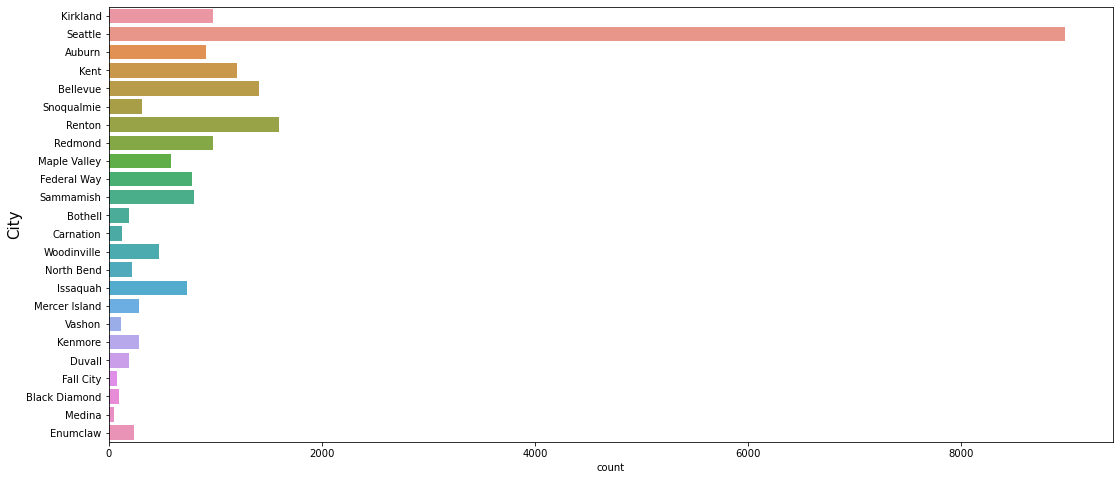

In [ ]:
plt.figure(figsize=(18, 8))
sns.countplot(y='City',data=house_EDA)
plt.ylabel('City', fontsize=15)

So we have most properties in 'Seattle' city and least in 'Medina' city.

#### Analyzing Feature: furnished

Text(0.5, 0, 'furnished')

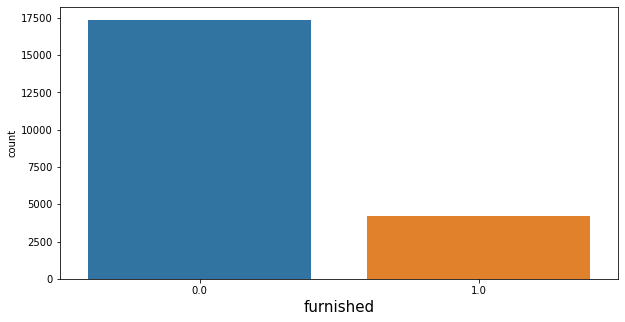

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot('furnished',data=house_EDA)
house_EDA.furnished.value_counts()
plt.xlabel('furnished', fontsize=15)

Most properties are not furnished. Furnish column need to be converted into categorical column

# BIVARIATE ANALYSIS

### PairPlot

To get the proper correlations we have to change some of the variables from their datatypes of object to int/float. This change is not done in the main file. It is done in a copy of the main file.

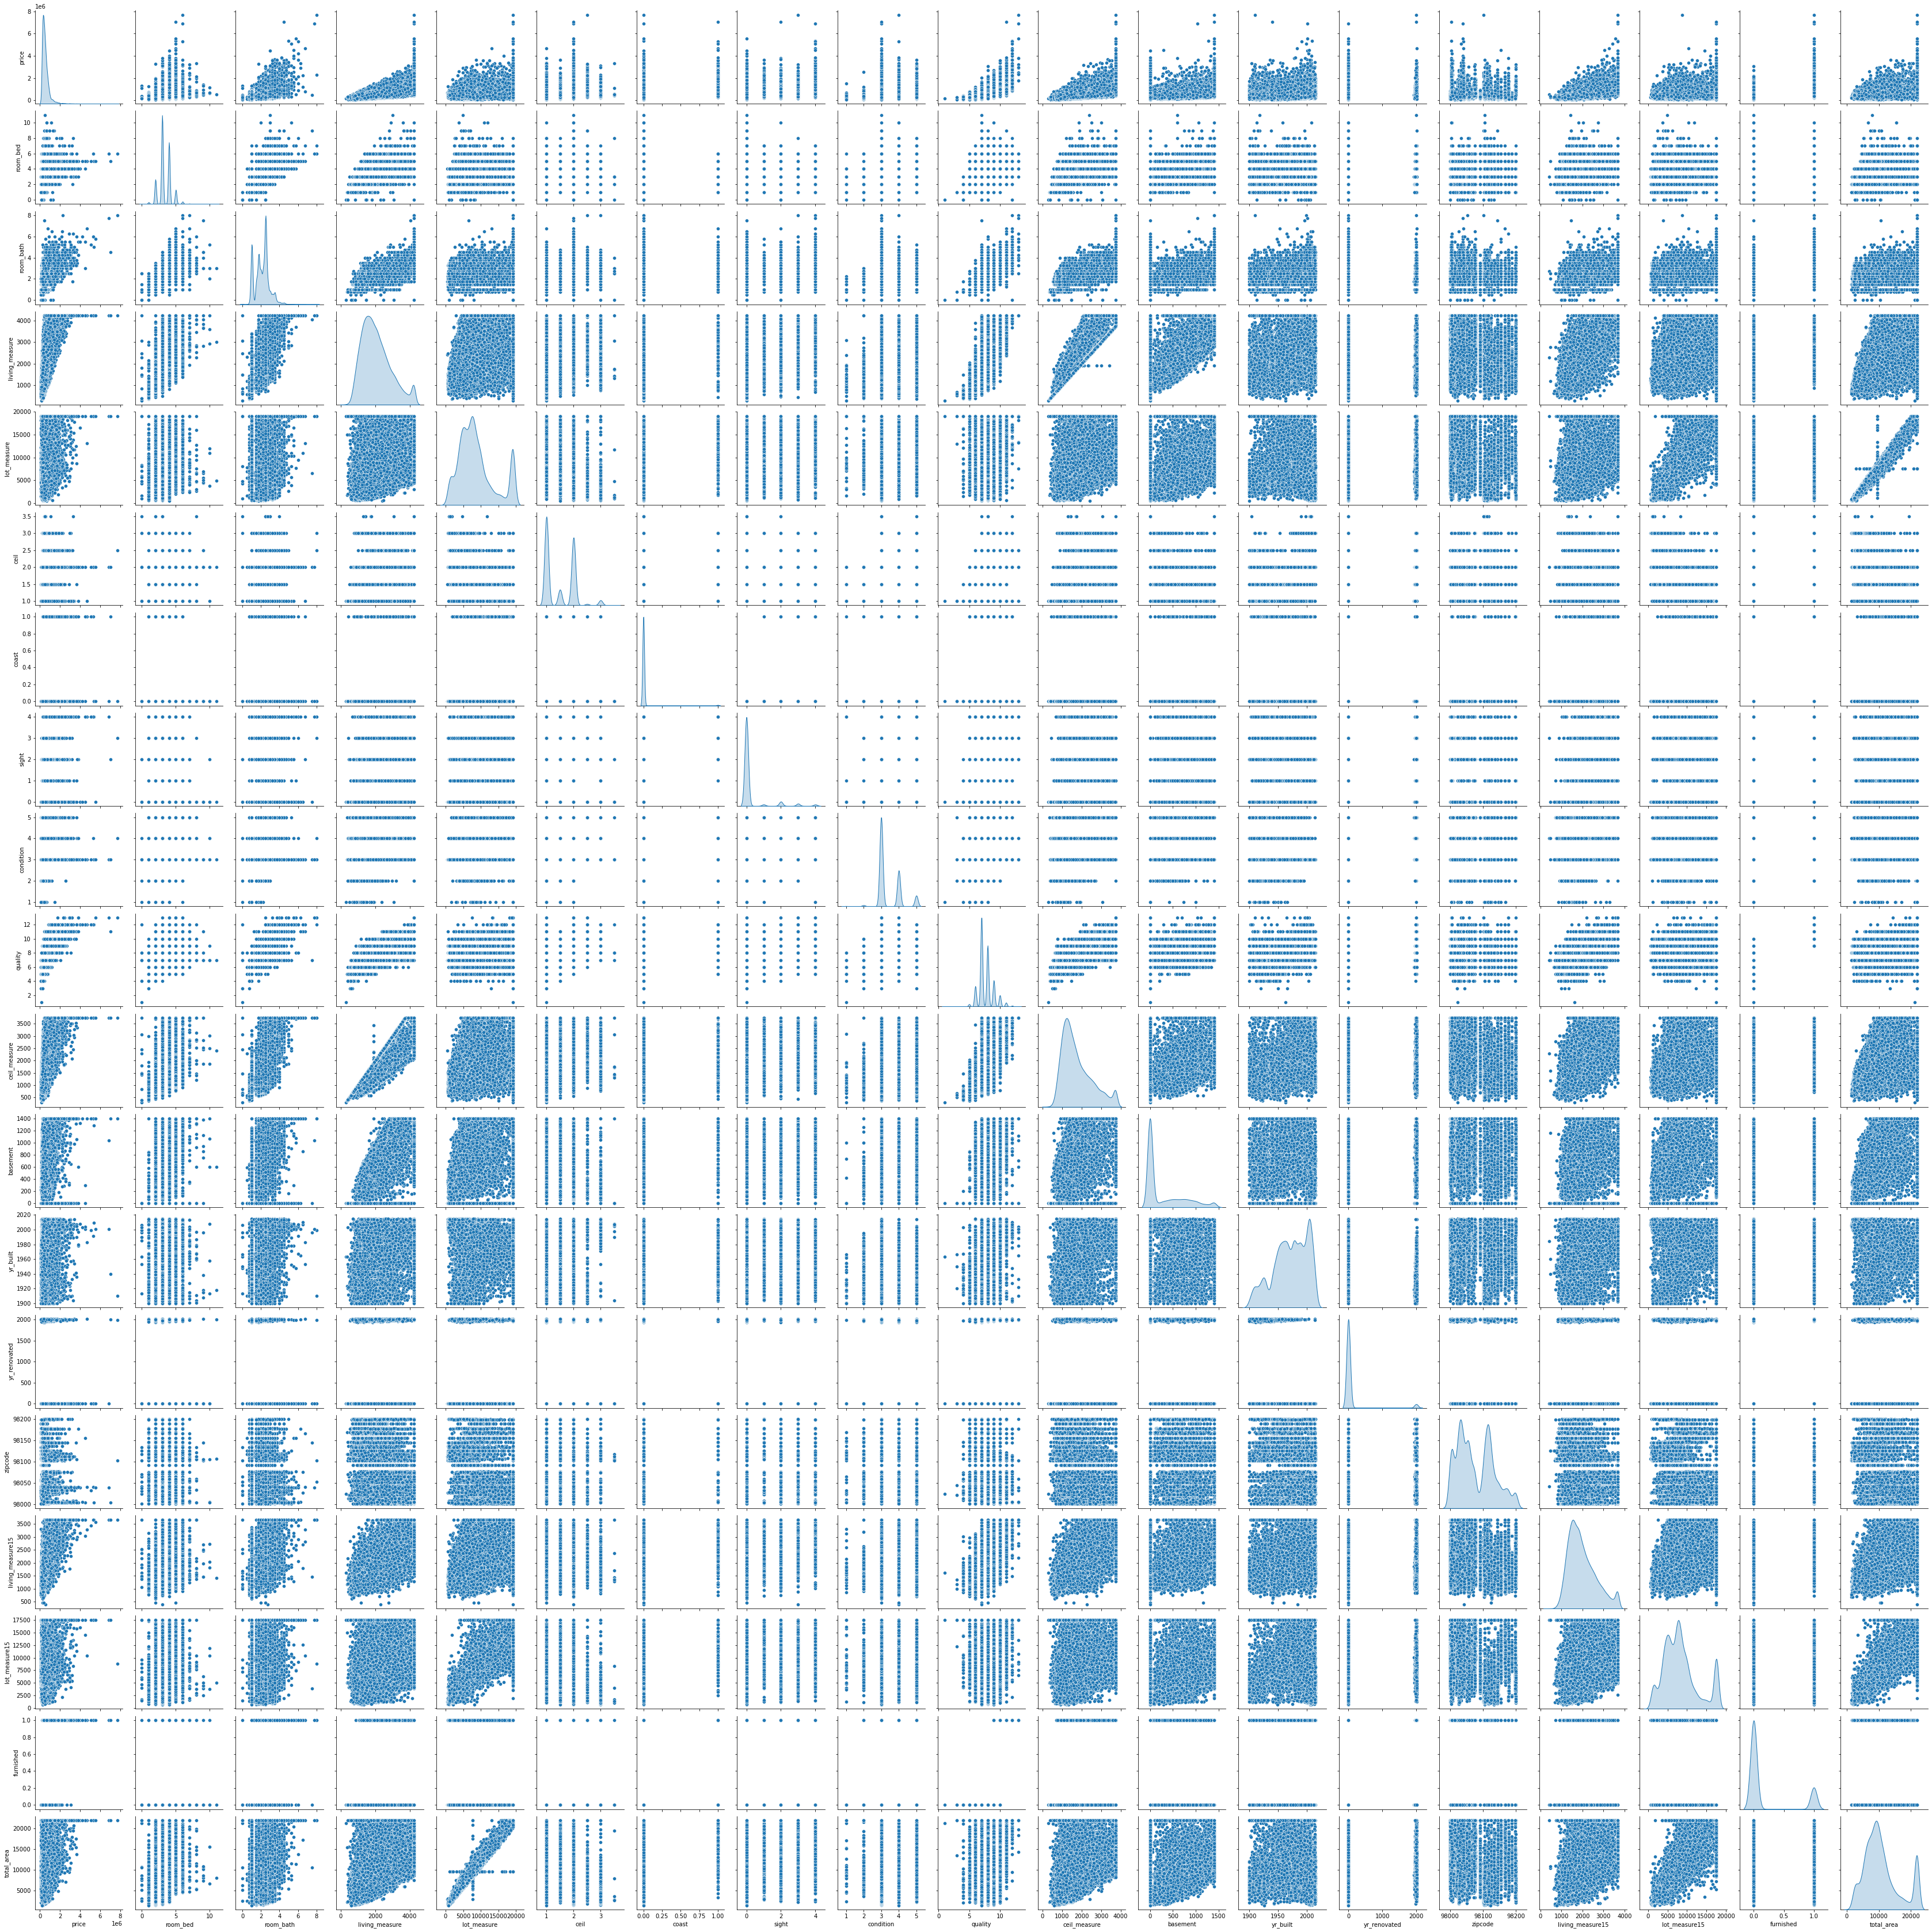

In [ ]:
# let's plot all the variables and confirm our above deduction with more confidence
sns.pairplot(house_EDA, diag_kind = 'kde')

In [ ]:
# let's see corelatoin between the different features
house_corr = house_EDA.corr(method ='pearson')
house_corr

price  room_bed  room_bath  living_measure  lot_measure  \
price             1.000000  0.314876   0.524090        0.646883     0.195342   
room_bed          0.314876  1.000000   0.527548        0.606889     0.186867   
room_bath         0.524090  0.527548   1.000000        0.746569     0.123770   
living_measure    0.646883  0.606889   0.746569        1.000000     0.347850   
lot_measure       0.195342  0.186867   0.123770        0.347850     1.000000   
ceil              0.256402  0.179754   0.496172        0.362745    -0.191498   
coast             0.266043 -0.006098   0.061870        0.085063     0.101890   
sight             0.397004  0.080589   0.185848        0.266401     0.143959   
condition         0.035530  0.024813  -0.126467       -0.059209     0.066827   
quality           0.667495  0.365586   0.663309        0.759549     0.230420   
ceil_measure      0.559311  0.499377   0.675511        0.868610     0.320287   
basement          0.289699  0.303077   0.264787        0.399301     0.099107   
yr_built          0.053553  0.158666   0.504717        0.332579     0.035788   
yr_renovated      0.126445  0.019206   0.050338        0.054361     0.025269   
zipcode          -0.053174 -0.156994  -0.203304       -0.206639    -0.286432   
living_measure15  0.567338  0.404957   0.562849        0.760976     0.391114   
lot_measure15     0.190760  0.173232   0.116518        0.334922     0.909460   
furnished         0.565844  0.265496   0.483365        0.640126     0.239280   
total_area        0.270674  0.259862   0.218808        0.462518     0.987442   

                      ceil     coast     sight  condition   quality  \
price             0.256402  0.266043  0.397004   0.035530  0.667495   
room_bed          0.179754 -0.006098  0.080589   0.024813  0.365586   
room_bath         0.496172  0.061870  0.185848  -0.126467  0.663309   
living_measure    0.362745  0.085063  0.266401  -0.059209  0.759549   
lot_measure      -0.191498  0.101890  0.143959   0.066827  0.230420   
ceil              1.000000  0.024133  0.028933  -0.262049  0.457335   
coast             0.024133  1.000000  0.400219   0.017695  0.082513   
sight             0.028933  0.400219  1.000000   0.046560  0.250861   
condition        -0.262049  0.017695  0.046560   1.000000 -0.144707   
quality           0.457335  0.082513  0.250861  -0.144707  1.000000   
ceil_measure      0.540910  0.062566  0.156460  -0.163258  0.749638   
basement         -0.255591  0.064766  0.258989   0.179617  0.145551   
yr_built          0.486450 -0.025921 -0.052816  -0.360409  0.446181   
yr_renovated      0.005342  0.088357  0.102977  -0.060478  0.014417   
zipcode          -0.058401  0.030291  0.084393   0.002987 -0.184817   
living_measure15  0.279848  0.086233  0.276158  -0.092503  0.704773   
lot_measure15    -0.194601  0.112418  0.146064   0.075528  0.235705   
furnished         0.347224  0.069570  0.219892  -0.122372  0.788121   
total_area       -0.129065  0.107774  0.173862   0.053664  0.316442   

                  ceil_measure  basement  yr_built  yr_renovated   zipcode  \
price                 0.559311  0.289699  0.053553      0.126445 -0.053174   
room_bed              0.499377  0.303077  0.158666      0.019206 -0.156994   
room_bath             0.675511  0.264787  0.504717      0.050338 -0.203304   
living_measure        0.868610  0.399301  0.332579      0.054361 -0.206639   
lot_measure           0.320287  0.099107  0.035788      0.025269 -0.286432   
ceil                  0.540910 -0.255591  0.486450      0.005342 -0.058401   
coast                 0.062566  0.064766 -0.025921      0.088357  0.030291   
sight                 0.156460  0.258989 -0.052816      0.102977  0.084393   
condition            -0.163258  0.179617 -0.360409     -0.060478  0.002987   
quality               0.749638  0.145551  0.446181      0.014417 -0.184817   
ceil_measure          1.000000 -0.092445  0.440207      0.023481 -0.271413   
basement             -0.092445  1.000000 -0.144774      0.06919

<AxesSubplot:>

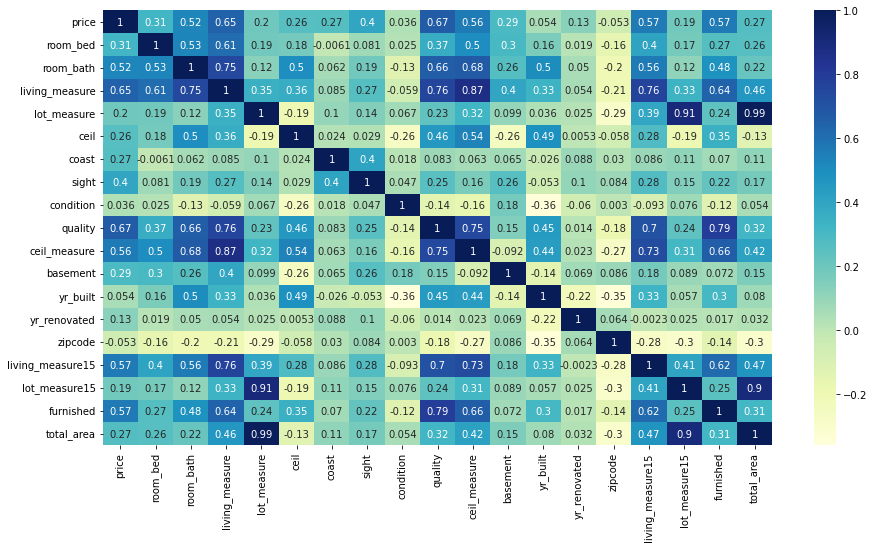

In [ ]:
# Plotting heatmap
plt.subplots(figsize =(15, 8))
sns.heatmap(house_corr,cmap="YlGnBu",annot=True)

### Analyzing Bivariate for Feature: month_year

In [ ]:
house_EDA['month_year'].unique()

array(['April-2015', 'March-2015', 'August-2014', 'October-2014',
       'February-2015', 'July-2014', 'June-2014', 'May-2014',
       'January-2015', 'September-2014', 'November-2014', 'December-2014',
       'May-2015'], dtype=object)

Text(-15.449999999999989, 0.5, 'price')

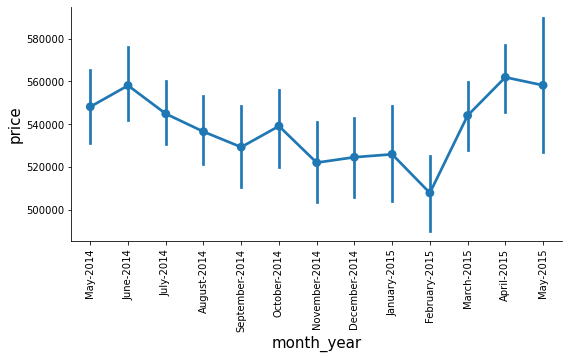

In [ ]:
#month,year in which house is sold. Price is not influenced by it, though there are outliers and can be easily seen.
house_EDA['month_year'] = pd.to_datetime(house_EDA['month_year'], format='%B-%Y')

house_EDA.sort_values(["month_year"], axis=0,
                 ascending=True, inplace=True)
house_EDA["month_year"] = house_EDA["month_year"].dt.strftime('%B-%Y')

sns.factorplot(x='month_year',y='price',data=house_EDA, size=4, aspect=2)
plt.xticks(rotation=90)
#groupby
house_EDA.groupby('month_year')['price'].agg(['mean','median','size'])
plt.xlabel('month_year', fontsize=15)
plt.ylabel('price', fontsize=15)

### Analyzing Bivariate for Feature: room_bed

Text(6.800000000000011, 0.5, 'price')

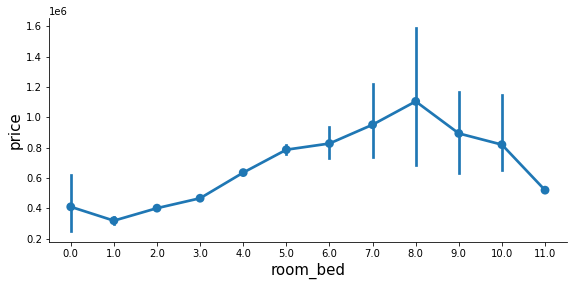

In [ ]:
#Room_bed - outliers can be seen easily. Mean and median of price increases with number bedrooms/house uptill a point
#and then drops
sns.factorplot(x='room_bed',y='price',data=house_EDA, size=4, aspect=2)

#groupby
house_EDA.groupby('room_bed')['price'].agg(['mean','median','size'])
plt.xlabel('room_bed', fontsize=15)
plt.ylabel('price', fontsize=15)

There is clear increasing trend in price with room_bed

### Analyzing Bivariate for Feature: room_bath

mean     median  size
room_bath                               
0.00       4.490950e+05   317500.0    10
0.50       2.373750e+05   264000.0     4
0.75       2.945209e+05   273500.0    72
1.00       3.470889e+05   320000.0  3829
1.25       6.217722e+05   516500.0     9
1.50       4.091834e+05   370000.0  1439
1.75       4.548798e+05   422650.0  3030
2.00       4.575184e+05   422500.0  1917
2.25       5.337925e+05   472500.0  2039
2.50       5.527632e+05   499330.0  5466
2.75       6.605538e+05   605000.0  1178
3.00       7.087325e+05   600000.0   750
3.25       9.710299e+05   837352.0   588
3.50       9.329520e+05   823250.0   726
3.75       1.198179e+06  1070000.0   155
4.00       1.271616e+06  1060000.0   135
4.25       1.535072e+06  1390000.0    78
4.50       1.334211e+06  1060000.0   100
4.75       2.022300e+06  2300000.0    23
5.00       1.674167e+06  1430000.0    21
5.25       1.817962e+06  1420000.0    13
5.50       2.522500e+06  2340000.0    10
5.75       2.492500e+06  1930000.0     4
6.00       2.948333e+06  2895000.0     6
6.25       3.095000e+06  3095000.0     2
6.50       1.710000e+06  1710000.0     2
6.75       2.735000e+06  2735000.0     2
7.50       4.500000e+05   450000.0     1
7.75       6.890000e+06  6890000.0     1
8.00       4.990000e+06  4990000.0     2

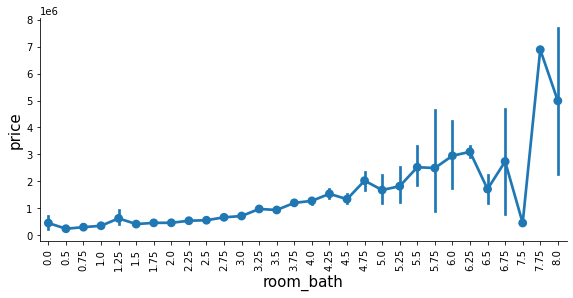

In [ ]:
#room_bath - outliers can be seen easily. Overall mean and median price increares with increasing room_bath
sns.factorplot(x='room_bath',y='price',data=house_EDA,size=4, aspect=2)
plt.xticks(rotation=90)
plt.xlabel('room_bath', fontsize=15)
plt.ylabel('price', fontsize=15)
#groupby
house_EDA.groupby('room_bath')['price'].agg(['mean','median','size'])

There is upward trend in price with increase in room_bath

### Analyzing Bivariate for Feature: living_measure

AxesSubplot(0.125,0.125;0.775x0.755)


count    21612.000000
mean      2057.807144
std        838.687255
min        290.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max       4230.000000
Name: living_measure, dtype: float64

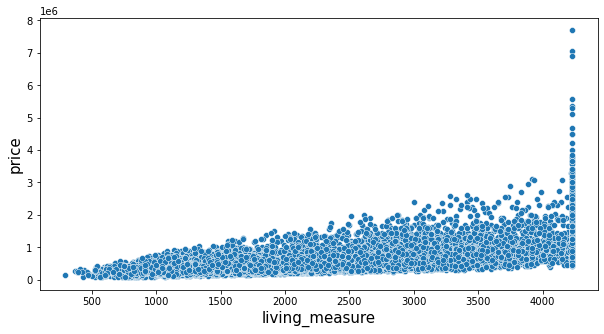

In [ ]:
#living_measure - price increases with increase in living measure
plt.figure(figsize=(10, 5))
plt.xlabel('living_measure', fontsize=15)
plt.ylabel('price', fontsize=15)
print(sns.scatterplot(house_EDA['living_measure'],house_EDA['price']))
house_EDA['living_measure'].describe()

There is clear increment in price of the property with increment in the living measure

### Analyzing Bivariate for Feature: lot_measure

AxesSubplot(0.125,0.125;0.775x0.755)


count    21612.000000
mean      8693.629002
std       5023.785989
min        520.000000
25%       5043.000000
50%       7618.000000
75%      10660.250000
max      19085.500000
Name: lot_measure, dtype: float64

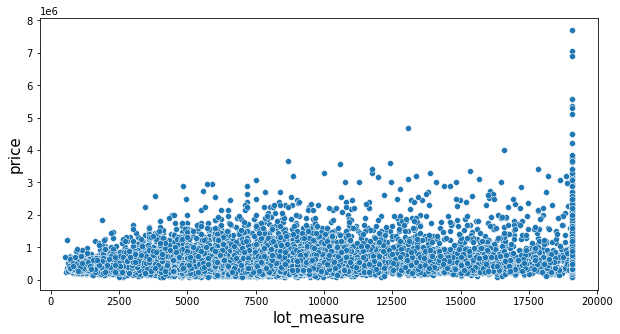

In [ ]:
#lot_measure - there seems to be no relation between lot_measure and price
#lot_measure - data value range is very large so breaking it get better view.
plt.figure(figsize=(10, 5))
plt.xlabel('lot_measure', fontsize=15)
plt.ylabel('price', fontsize=15)
print(sns.scatterplot(house_EDA['lot_measure'],house_EDA['price']))
house_EDA['lot_measure'].describe()

There doesnt seem to be no relation between lot_measure and price trend

### Analyzing Bivariate for Feature: ceil

mean    median   size
ceil                               
1.0   4.427527e+05  390000.0  10718
1.5   5.593744e+05  525000.0   1905
2.0   6.491210e+05  543250.0   8210
2.5   1.061021e+06  799200.0    161
3.0   5.831248e+05  490500.0    610
3.5   9.339375e+05  534500.0      8

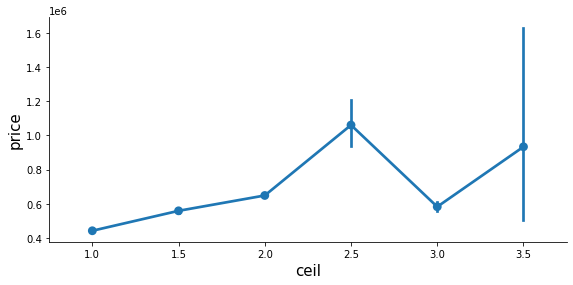

In [ ]:
#ceil - median price increases initially and then falls
print(sns.factorplot(x='ceil',y='price',data=house_EDA, size = 4, aspect = 2))
plt.xlabel('ceil', fontsize=15)
plt.ylabel('price', fontsize=15)
#groupby
house_EDA.groupby('ceil')['price'].agg(['mean','median','size'])

There is some slight upward trend in price with the ceil

### Analyzing Bivariate for Feature: coast

living_measure                   price              
              median         mean     median          mean
coast                                                     
0.0           1910.0  2051.626731   450000.0  5.317104e+05
1.0           2830.0  2881.260870  1410000.0  1.668301e+06

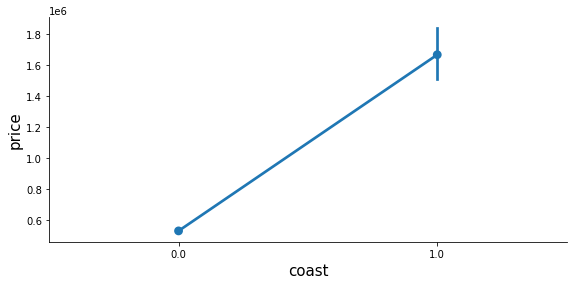

In [ ]:
#coast - mean and median of waterfront view is high however such houses are very small in compare to non-waterfront
#Also, living_measure mean and median is greater for waterfront house.
print(sns.factorplot(x='coast',y='price',data=house_EDA, size = 4, aspect = 2))
plt.xlabel('coast', fontsize=15)
plt.ylabel('price', fontsize=15)
#groupby
house_EDA.groupby('coast')['living_measure','price'].agg(['median','mean'])

The house properties with water_front tend to have higher price compared to that of non-water_front properties

### Analyzing Bivariate for Feature: sight

price                   living_measure               
               mean     median   size           mean  median   size
sight                                                              
0.0    4.967344e+05   432500.0  19493    1986.382445  1850.0  19493
1.0    8.125186e+05   690944.0    332    2517.216867  2420.0    332
2.0    7.918609e+05   675000.0    959    2574.392075  2450.0    959
3.0    9.724684e+05   802500.0    510    2889.892157  2840.0    510
4.0    1.466554e+06  1190000.0    318    3064.062893  3070.0    318

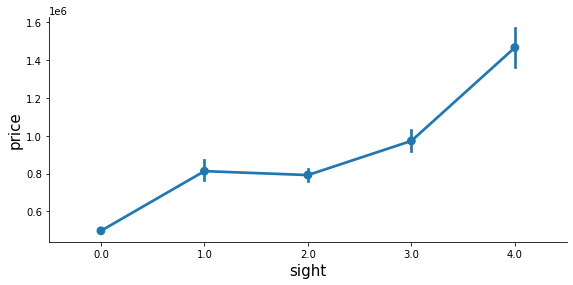

In [ ]:
#sight - have outliers. The house sighted more have high price (mean and median) and have large living area as well.
print(sns.factorplot(x='sight',y='price',data=house_EDA, size = 4, aspect = 2))
plt.xlabel('sight', fontsize=15)
plt.ylabel('price', fontsize=15)
#groupby
house_EDA.groupby('sight')['price','living_measure'].agg(['mean','median','size'])

Properties with higher price have more no.of sights compared to that of houses with lower price.

AxesSubplot(0.125,0.125;0.775x0.755)


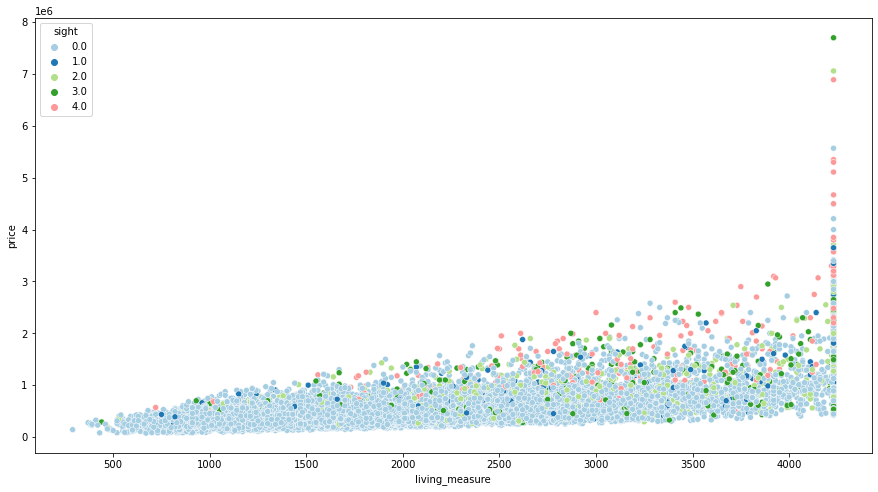

In [ ]:
#Sight - Viewed in relation with price and living_measure
#Costlier houses with large living area are sighted more.
plt.figure(figsize=(15, 8))
print(sns.scatterplot(house_EDA['living_measure'],house_EDA['price'],hue=house_EDA['sight'],palette='Paired',legend='full'))

The above graph also justify that: Properties with higher price have more no.of sights compared to that of houses with lower price

### Analyzing Bivariate for Feature: condition

price                  living_measure               
                    mean    median   size           mean  median   size
condition                                                              
1.0        334431.666667  262500.0     30    1216.000000  1000.0     30
2.0        326423.327485  279000.0    171    1400.818713  1330.0    171
3.0        542364.148048  451000.0  14063    2122.710873  1970.0  14063
4.0        520643.219275  440000.0   5655    1935.786561  1820.0   5655
5.0        612499.255759  525000.0   1693    2007.532191  1880.0   1693

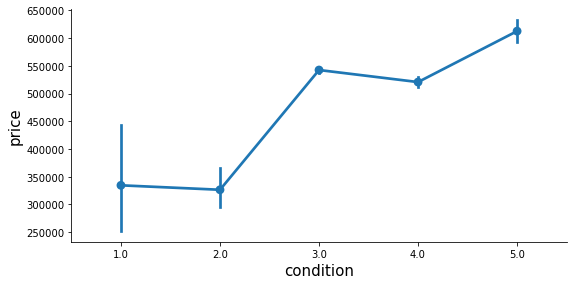

In [ ]:
#condition - as the condition rating increases its price and living measure mean and median also increases.
print(sns.factorplot(x='condition',y='price',data=house_EDA, size = 4, aspect = 2))
plt.xlabel('condition', fontsize=15)
plt.ylabel('price', fontsize=15)
#groupby
house_EDA.groupby('condition')['price','living_measure'].agg(['mean','median','size'])

The price of the house increases with condition rating of the house

AxesSubplot(0.125,0.125;0.775x0.755)


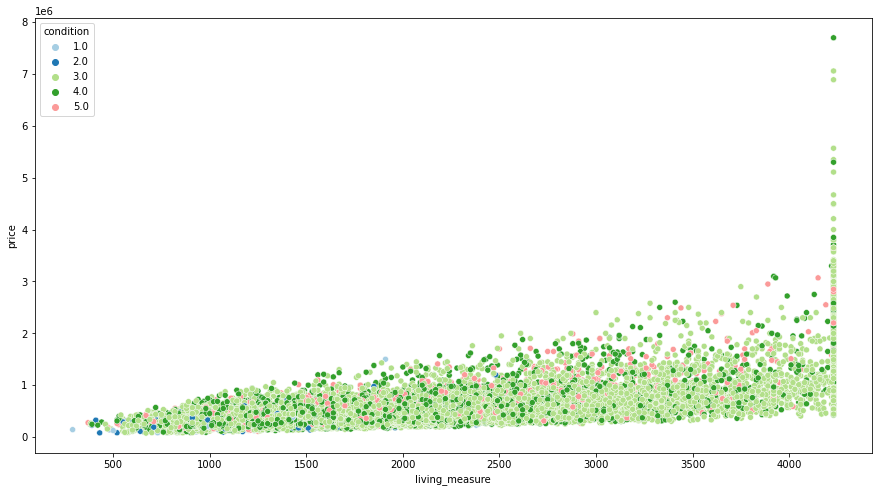

In [ ]:
#Condition - Viewed in relation with price and living_measure. Most houses are rated as 3 or more.
#We can see some outliers as well
plt.figure(figsize=(15, 8))
print(sns.scatterplot(house_EDA['living_measure'],house_EDA['price'],hue=house_EDA['condition'],palette='Paired',legend='full'))

***So we found out that smaller houses are in better condition and better condition houses are having higher prices***

### Analyzing Bivariate for Feature: quality

price                  living_measure              
                 mean     median  size           mean  median  size
quality                                                            
1.0      1.420000e+05   142000.0     1     290.000000   290.0     1
3.0      2.056667e+05   262000.0     3     596.666667   600.0     3
4.0      2.143810e+05   205000.0    29     660.482759   660.0    29
5.0      2.485240e+05   228700.0   242     983.326446   905.0   242
6.0      3.019166e+05   275276.5  2038    1192.096173  1120.0  2038
7.0      4.025585e+05   375000.0  8981    1689.751141  1630.0  8981
8.0      5.429310e+05   510000.0  6067    2183.405967  2150.0  6067
9.0      7.737382e+05   720000.0  2615    2853.054685  2820.0  2615
10.0     1.072347e+06   914327.0  1134    3434.694004  3450.0  1134
11.0     1.497792e+06  1280000.0   399    3944.704261  4230.0   399
12.0     2.192500e+06  1820000.0    90    4196.111111  4230.0    90
13.0     3.710769e+06  2980000.0    13    4230.000000  4230.0    13

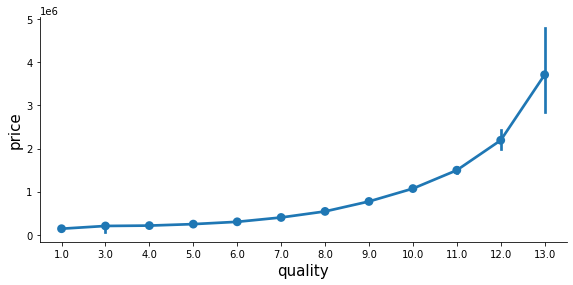

In [ ]:
#quality - with grade increase price and living_measure increase (mean and median)

print(sns.factorplot(x='quality',y='price',data=house_EDA, size = 4, aspect = 2))
plt.xlabel('quality', fontsize=15)
plt.ylabel('price', fontsize=15)
#groupby
house_EDA.groupby('quality')['price','living_measure'].agg(['mean','median','size'])

AxesSubplot(0.125,0.125;0.775x0.755)


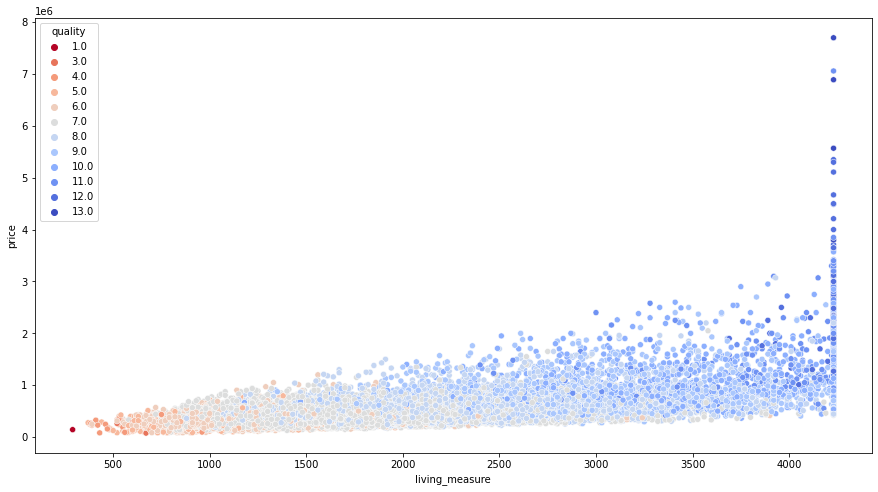

In [ ]:
#quality - Viewed in relation with price and living_measure. Most houses are graded as 6 or more.
#We can see some outliers as well
plt.figure(figsize=(15, 8))
print(sns.scatterplot(house_EDA['living_measure'],house_EDA['price'],hue=house_EDA['quality'],palette='coolwarm_r',
                      legend='full'))

### Analyzing Bivariate for Feature: ceil_measure

AxesSubplot(0.125,0.125;0.775x0.755)


count    21612.000000
mean      1769.562095
std        764.023368
min        290.000000
25%       1190.000000
50%       1560.000000
75%       2210.000000
max       3740.000000
Name: ceil_measure, dtype: float64

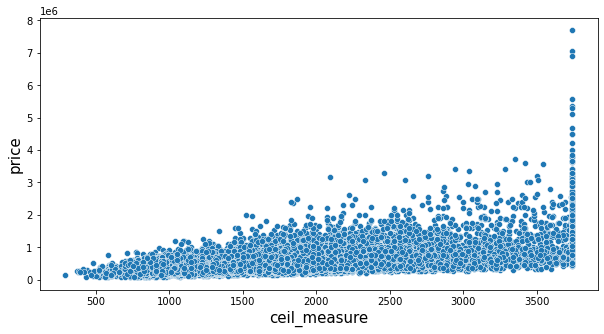

In [ ]:
#ceil_measure - price increases with increase in ceil measure
plt.figure(figsize=(10, 5))
plt.xlabel('ceil_measure', fontsize=15)
plt.ylabel('price', fontsize=15)
print(sns.scatterplot(house_EDA['ceil_measure'],house_EDA['price']))
house_EDA['ceil_measure'].describe()

There is upward trend in price with ceil_measure

### Analyzing Bivariate for Feature: basement

AxesSubplot(0.125,0.125;0.775x0.755)


count    21612.000000
mean       284.036461
std        417.069349
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       1400.000000
Name: basement, dtype: float64

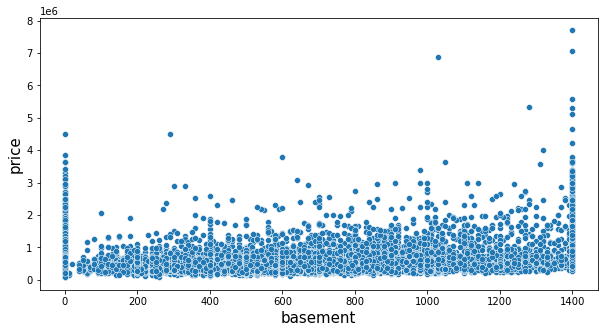

In [ ]:
#basement - price increases with increase in ceil measure
plt.figure(figsize=(10, 5))
plt.xlabel('basement', fontsize=15)
plt.ylabel('price', fontsize=15)
print(sns.scatterplot(house_EDA['basement'],house_EDA['price']))
house_EDA['basement'].describe()

We have created the categorical variable for basement 'has_basement' for houses with basement and no basement.This categorical variable will be used for further analysis.

price                  living_measure               
                       mean    median   size           mean  median   size
has_basement                                                              
No            486945.394789  411500.0  13126     1919.65016  1740.0  13126
Yes           622516.114306  515000.0   8486     2271.50601  2100.0   8486

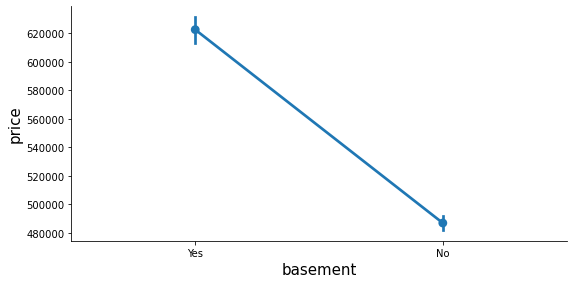

In [ ]:
#basement - after binning we data shows with basement houses are costlier and have higher
#living measure (mean & median)
print(sns.factorplot(x='has_basement',y='price',data=house_EDA, size = 4, aspect = 2))
plt.xlabel('basement', fontsize=15)
plt.ylabel('price', fontsize=15)
house_EDA.groupby('has_basement')['price','living_measure'].agg(['mean','median','size'])

AxesSubplot(0.125,0.125;0.775x0.755)


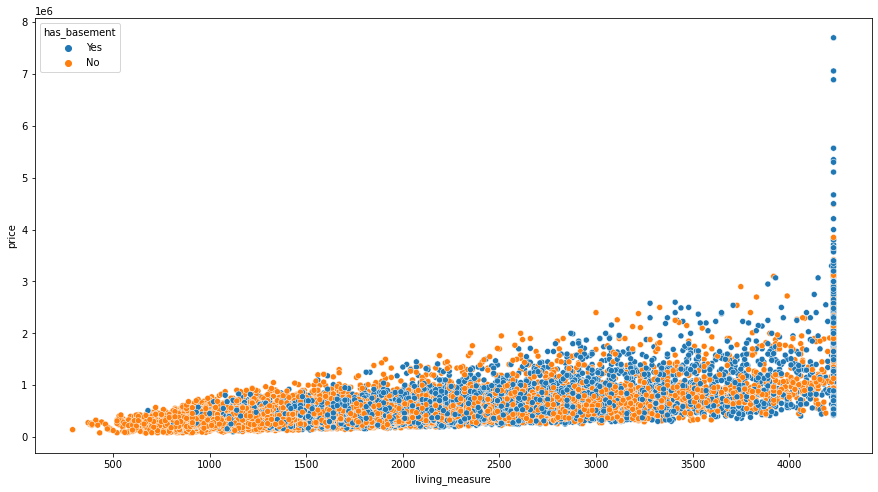

In [ ]:
#basement - have higher price & living measure
plt.figure(figsize=(15, 8))
print(sns.scatterplot(house_EDA['living_measure'],house_EDA['price'],hue=house_EDA['has_basement']))

The houses with basement has better price compared to that of houses without basement

AxesSubplot(0.125,0.125;0.775x0.755)


mean    median  size
yr_built                               
1900.0    581536.632184  549000.0    87
1901.0    557108.344828  550000.0    29
1902.0    673192.592593  624000.0    27
1903.0    480958.195652  461000.0    46
1904.0    583867.755556  478000.0    45
...                 ...       ...   ...
2011.0    544648.384615  440000.0   130
2012.0    527436.982353  448475.0   170
2013.0    678599.582090  565000.0   201
2014.0    677006.203833  590962.5   574
2015.0    762970.162162  628000.0    37

[116 rows x 3 columns]

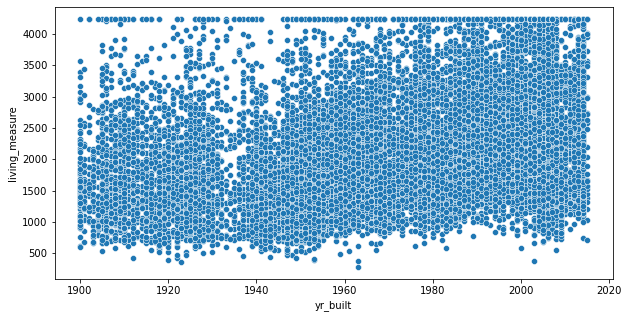

In [ ]:
#yr_built - outliers can be seen easily.
plt.figure(figsize=(10, 5))
print(sns.scatterplot(house_EDA['yr_built'],house_EDA['living_measure']))
#groupby
house_EDA.groupby('yr_built')['price'].agg(['mean','median','size'])

### Analyzing Bivariate for Feature: yr_renovated

AxesSubplot(0.125,0.125;0.775x0.755)


mean    median  size
yr_renovated                               
1934.0        459950.000000  459950.0     1
1940.0        378400.000000  378400.0     2
1944.0        521000.000000  521000.0     1
1945.0        398666.666667  375000.0     3
1946.0        351137.500000  351137.5     2
...                     ...       ...   ...
2011.0        607496.153846  577000.0    13
2012.0        625181.818182  515000.0    11
2013.0        664960.810811  560000.0    37
2014.0        655030.098901  575000.0    91
2015.0        659156.250000  651000.0    16

[69 rows x 3 columns]

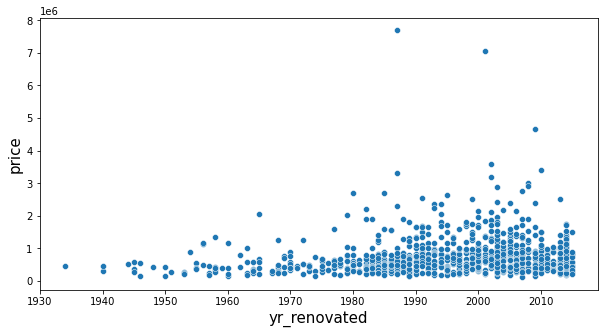

In [ ]:
#yr_renovated -
plt.figure(figsize=(10, 5))
plt.xlabel('yr_renovated', fontsize=15)
plt.ylabel('price', fontsize=15)
x=house_EDA[house_EDA['yr_renovated']>0]
print(sns.scatterplot(x['yr_renovated'],x['price']))
#groupby
x.groupby('yr_renovated')['price'].agg(['mean','median','size'])

So most houses are renovated after 1980's. We will create new categorical variable 'has_renovated' to categorize the property as renovated and non-renovated. For further ananlysis we will use this categorical variable.

AxesSubplot(0.125,0.125;0.775x0.755)


mean    median   size
has_renovated                                
No             530442.665716  448000.0  20698
Yes            760628.777899  600000.0    914

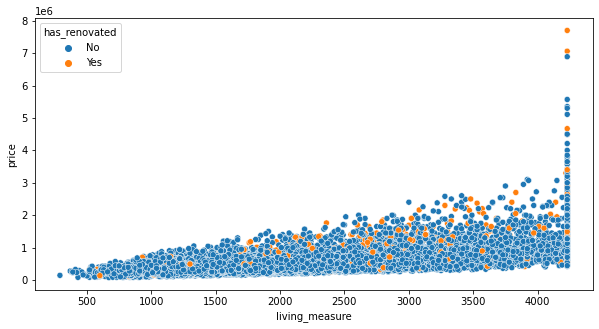

In [ ]:
#has_renovated - renovated have higher mean and median, however it does not confirm if the prices of house renovated
#actually increased or not.
#HouseLandRatio - Renovated house utilized more land area for construction of house
plt.figure(figsize=(10, 5))
print(sns.scatterplot(house_EDA['living_measure'],house_EDA['price'],hue=house_EDA['has_renovated']))
#groupby
house_EDA.groupby(['has_renovated'])['price'].agg(['mean','median','size'])

Renovated properties have higher price than others with same living measure space.

### Analyzing Bivariate for Feature: furnished

AxesSubplot(0.125,0.125;0.775x0.755)


price                  living_measure               
                    mean    median   size           mean  median   size
furnished                                                              
0.0        437392.307382  401000.0  17366    1792.349418  1720.0  17366
1.0        960565.753179  810000.0   4246    3143.520490  3110.0   4246

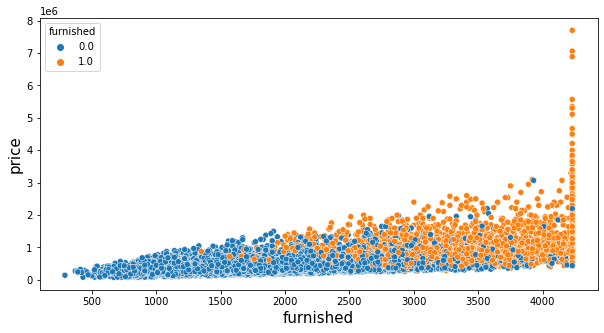

In [ ]:
#furnished - Furnished has higher price value and has greater living_measure
plt.figure(figsize=(10, 5))
print(sns.scatterplot(house_EDA['living_measure'],house_EDA['price'],hue=house_EDA['furnished']))
plt.xlabel('furnished', fontsize=15)
plt.ylabel('price', fontsize=15)
#groupby
house_EDA.groupby('furnished')['price','living_measure'].agg(['mean','median','size'])

***Furnished houses have higher price than that of the Non-furnished houses***

### Analyzing Bivariate for Feature: city

mean     median  size
City                                        
Medina         2.161300e+06  1895000.0    50
Mercer Island  1.194874e+06   993750.0   282
Bellevue       8.984661e+05   749000.0  1407
Sammamish      7.328210e+05   688500.0   800
Redmond        6.589089e+05   625000.0   979
Issaquah       6.151222e+05   572000.0   733
Woodinville    6.174979e+05   570000.0   471
Kirkland       6.465428e+05   510000.0   977
Snoqualmie     5.280031e+05   500000.0   310
Bothell        4.903771e+05   470000.0   195
Vashon         4.874805e+05   463750.0   118
Fall City      5.806379e+05   460000.0    81
Seattle        5.350578e+05   453000.0  8976
Kenmore        4.624889e+05   445000.0   283
Carnation      4.556171e+05   415000.0   124
Duvall         4.248151e+05   401250.0   190
North Bend     4.395073e+05   399500.0   221
Black Diamond  4.236660e+05   359999.5   100
Renton         4.034685e+05   358000.0  1597
Maple Valley   3.668761e+05   342000.0   590
Kent           2.995499e+05   283200.0  1203
Enumclaw       3.157093e+05   279500.0   234
Auburn         2.914815e+05   270000.0   912
Federal Way    2.893913e+05   268000.0   779

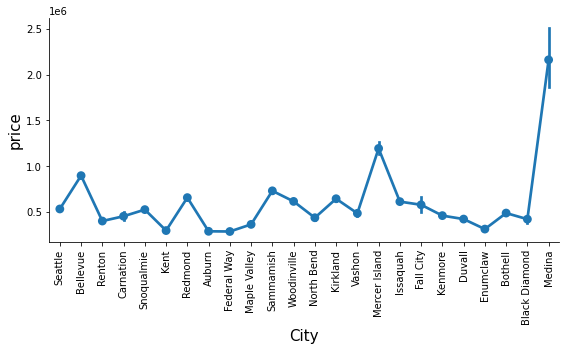

In [ ]:
#City - outliers can be seen easily.
print(sns.factorplot(x='City',y='price',data=house_EDA, size = 4, aspect = 2))
plt.xticks(rotation=90)
plt.xlabel('City', fontsize=15)
plt.ylabel('price', fontsize=15)
#groupby
house_EDA.groupby('City')['price'].agg(['mean','median','size']).sort_values(by='median',ascending=False)

From the above graph, few cities have higher average price of the houses compared to others. We need to further analyse why the price varies among cities.

## Business Insights

#### Is the data unbalanced? If so, what can be done? Please explain in the context of the business

Not applicable as we are going to develop regression model not classification model.

Since, in regression model we use continuous variable as target and unbalanced data is only possible in classification problem having a great difference in the target variable. Well to some extend the presence of outliers might affect the model a bit as we only removed some selected continuous variables leaving the rest variables like categorical variables untreated as their values will get lowered as a result.

#### Any business insights using clustering

We have used KMeans Clustering to obtain the WSS plot with the help of yellowbrick library and its clear noticeable that the elbow is at clusters = 4. Hence the optimal number of clusters will be 4. We have taken the encoded dataframe for this clustering by removing month_year and City. We also removed the high correlated variables with their threshold as high or higher than 0.9.

In [ ]:
dff.head()

price  room_bed  room_bath  living_measure  lot_measure  ceil  coast  \
0  600000.0       4.0       1.75          3050.0       9440.0   1.0    0.0   
1  190000.0       2.0       1.00           670.0       3101.0   1.0    0.0   
2  735000.0       4.0       2.75          3040.0       2415.0   2.0    1.0   
3  257000.0       3.0       2.50          1740.0       3721.0   2.0    0.0   
4  450000.0       2.0       1.00          1120.0       4590.0   1.0    0.0   

   sight  condition  quality  ceil_measure  basement  yr_built  yr_renovated  \
0    0.0        3.0      8.0        1800.0    1250.0    1966.0           0.0   
1    0.0        4.0      6.0         670.0       0.0    1948.0           0.0   
2    4.0        3.0      8.0        3040.0       0.0    1966.0           0.0   
3    0.0        3.0      8.0        1740.0       0.0    2009.0           0.0   
4    0.0        3.0      7.0        1120.0       0.0    1924.0           0.0   

   zipcode  living_measure15  lot_measure15  furnished  total_area  \
0    98034            2020.0         8660.0        0.0     12490.0   
1    98118            1660.0         4100.0        0.0      3771.0   
2    98118            2620.0         2433.0        0.0      5455.0   
3    98002            2030.0         3794.0        0.0      5461.0   
4    98118            1120.0         5100.0        0.0      5710.0   

      month_year      City  has_basement_Yes  has_renovated_Yes  
0     April-2015  Kirkland                 1                  0  
1     March-2015   Seattle                 0                  0  
2    August-2014   Seattle                 0                  0  
3   October-2014    Auburn                 0                  0  
4  February-2015   Seattle                 0                  0

In [ ]:
# For clustering we are taking a copy of the data and removing the "month-year" and "yr_renovated" column from it.
df_cluster = dff.copy()

In [ ]:
df_cluster = df_cluster.drop(["month_year", "City"], axis=1)

##### Drop Correlated variables

In [ ]:
threshold = 0.9
df_corr = df_cluster.corr()

columns = np.full((df_corr.shape[0],), True, dtype=bool)
for i in range(df_corr.shape[0]):
    for j in range(i+1, df_corr.shape[0]):
        if df_corr.iloc[i,j] >= threshold:
            if columns[j]:
                columns[j] = False
selected_columns = df_cluster.columns[columns]
selected_columns
df_cluster = df_cluster[selected_columns]

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_cluster_scale = sc.fit_transform(df_cluster)
df_cluster_scale

array([[ 0.16284353,  0.6972869 , -0.47751395, ...,  0.07020975,
        -0.49447017,  1.24369728],
       [-0.95322303, -1.50976708, -1.4530652 , ..., -0.48649105,
        -0.49447017, -0.80405418],
       [ 0.53032886,  0.6972869 ,  0.82322105, ...,  0.99804441,
        -0.49447017, -0.80405418],
       ...,
       [ 1.24624472, -0.40624009,  2.12395606, ...,  0.64237446,
         2.02236669,  1.24369728],
       [-0.75723085,  0.6972869 ,  0.4980373 , ..., -1.25968661,
        -0.49447017, -0.80405418],
       [ 1.66000598,  0.6972869 ,  0.4980373 , ..., -0.28546021,
         2.02236669, -0.80405418]])

In [ ]:
df_cluster_scale = pd.DataFrame(df_cluster_scale, index = df_cluster.index, columns = df_cluster.columns)
df_cluster_scale.head()

price  room_bed  room_bath  living_measure  lot_measure      ceil  \
0  0.162844  0.697287  -0.477514        1.183058     0.148571 -0.912463   
1 -0.953223 -1.509767  -1.453065       -1.654776    -1.113256 -0.912463   
2  0.530329  0.697287   0.823221        1.171135    -1.249809  0.940238   
3 -0.770841 -0.406240   0.498037       -0.378943    -0.989840  0.940238   
4 -0.245474 -1.509767  -1.453065       -1.118210    -0.816859 -0.912463   

       coast     sight  condition   quality  ceil_measure  basement  yr_built  \
0  -0.086634 -0.305360  -0.627296  0.291923      0.039840  2.316128 -0.171529   
1  -0.086634 -0.305360   0.911537 -1.409544     -1.439207 -0.681045 -0.784094   
2  11.542791  4.919853  -0.627296  0.291923      1.662864 -0.681045 -0.171529   
3  -0.086634 -0.305360  -0.627296  0.291923     -0.038694 -0.681045  1.291823   
4  -0.086634 -0.305360  -0.627296 -0.558810     -0.850206 -0.681045 -1.600849   

   yr_renovated   zipcode  living_measure15  furnished  has_basement_Yes  
0     -0.210133 -0.821210          0.070210   -0.49447          1.243697  
1     -0.210133  0.748744         -0.486491   -0.49447         -0.804054  
2     -0.210133  0.748744          0.998044   -0.49447         -0.804054  
3     -0.210133 -1.419288          0.085674   -0.49447         -0.804054  
4     -0.210133  0.748744         -1.321542   -0.49447         -0.804054

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wss = []
for i in range(1,11):
    KM = KMeans(n_clusters = i)
    KM.fit(df_cluster_scale)
    wss.append(KM.inertia_)
wss

[389016.0000000003,
 300260.4869954955,
 267792.7431135277,
 238496.96098232173,
 214106.6313202495,
 200958.80254697433,
 184809.7176460226,
 175041.0875868709,
 166194.80827976932,
 159142.0527015976]

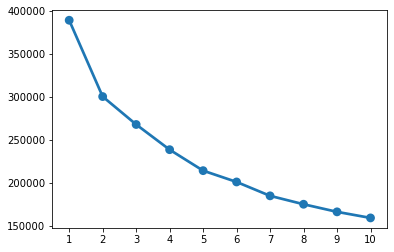

In [ ]:
a = [1,2,3,4,5,6,7,8,9,10]
sns.pointplot(a, wss);

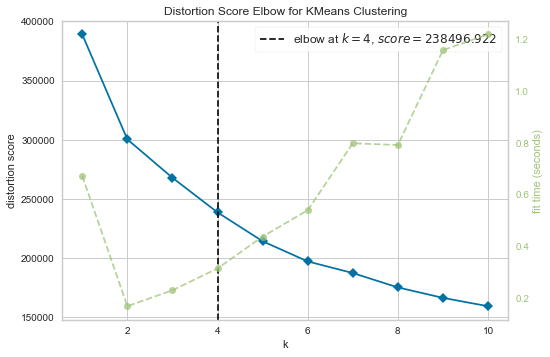

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
m = KMeans()
visualizer = KElbowVisualizer(m, k=(1,11))

visualizer.fit(df_cluster_scale)    # Fit the data to the visualizer
visualizer.show()

In [ ]:
k_means = KMeans(n_clusters = 4)
k_means.fit(df_cluster_scale)
labels = k_means.labels_

In [ ]:
df_cluster["Clus_kmeans"] = labels
df_cluster.head()

price  room_bed  room_bath  living_measure  lot_measure  ceil  coast  \
0  600000.0       4.0       1.75          3050.0       9440.0   1.0    0.0   
1  190000.0       2.0       1.00           670.0       3101.0   1.0    0.0   
2  735000.0       4.0       2.75          3040.0       2415.0   2.0    1.0   
3  257000.0       3.0       2.50          1740.0       3721.0   2.0    0.0   
4  450000.0       2.0       1.00          1120.0       4590.0   1.0    0.0   

   sight  condition  quality  ceil_measure  basement  yr_built  yr_renovated  \
0    0.0        3.0      8.0        1800.0    1250.0    1966.0           0.0   
1    0.0        4.0      6.0         670.0       0.0    1948.0           0.0   
2    4.0        3.0      8.0        3040.0       0.0    1966.0           0.0   
3    0.0        3.0      8.0        1740.0       0.0    2009.0           0.0   
4    0.0        3.0      7.0        1120.0       0.0    1924.0           0.0   

   zipcode  living_measure15  furnished  has_basement_Yes  Clus_kmeans  
0    98034            2020.0        0.0                 1            2  
1    98118            1660.0        0.0                 0            0  
2    98118            2620.0        0.0                 0            1  
3    98002            2030.0        0.0                 0            3  
4    98118            1120.0        0.0                 0            0

In [ ]:
df_cluster.Clus_kmeans.value_counts().sort_index()

0    6596
1    3915
2    5620
3    5481
Name: Clus_kmeans, dtype: int64

In [ ]:
clust_profile=df_cluster.groupby('Clus_kmeans').mean()
clust_profile['freq']=df_cluster.Clus_kmeans.value_counts().sort_index()
clust_profile.T

Clus_kmeans                   0             1              2              3
price             361995.176925  1.000893e+06  515705.180783  450618.375661
room_bed               2.793360  3.969093e+00       3.633274       3.358694
room_bath              1.351728  2.938250e+00       2.129404       2.439062
living_measure      1285.578987  3.284481e+03    2154.028114    2012.273125
lot_measure         8397.387735  1.188567e+04    8965.460587    6491.381956
ceil                   1.131898  1.874585e+00       1.132384       2.022806
coast                  0.003487  2.758621e-02       0.004982       0.000365
sight                  0.088842  6.444444e-01       0.283452       0.063857
condition              3.534263  3.246999e+00       3.646975       3.124612
quality                6.737265  9.525415e+00       7.366904       7.726145
ceil_measure        1253.562614  2.921193e+03    1384.781673    1962.476190
basement              31.300788  3.490143e+02     764.163879      49.469805
yr_built            1950.304427  1.988817e+03    1958.242705    1996.419267
yr_renovated          90.550788  1.072365e+02     106.646085      37.900201
zipcode            98090.351425  9.805999e+04   98087.671708   98065.839628
living_measure15    1517.376289  2.881849e+03    1910.975623    1942.030469
furnished              0.001213  9.586207e-01       0.026512       0.061303
has_basement_Yes       0.104306  3.581098e-01       0.997153       0.144499
freq                6596.000000  3.915000e+03    5620.000000    5481.000000

#### Any other business insights
* The missing data in the data set is already imputed based on the data type.
* Living measure is the most significant variable in our analysis and since living measure, lot measure and ceil measure are proportional we need not spend a lot of time in analysing these variables, analysis based on living measure would provide much greater insights.
* From EDA, we can see that ideal house for selling are having 3-4 bed rooms and 3 bathrooms.
* High price with higher bedrooms and bathrooms is also sold but not as much as the ideal houses.
* Higher the quality of houses higher the price.
* Since higher price houses are a bit investment, hence the no. of sights for these houses are high.
* From the EDA, we saw that Medina City has the lowest number of property sold as their mean price is the highest. And for Seattle having the most properties sold having the mean price way lower. Auburn has the lowest mean price of properties of all the cities.
* Since the population near coastal areas are lower, so we can see houses sold near coast are low.
* Taking all of these measure in mind, we can estimate the price of the houses.

# Notes 2

### 1). Model building and interpretation.

#### Before model building we need to do few more steps as follows:

In [ ]:
dfr = dff.copy()

In [ ]:
dfr = dfr.drop(["month_year", "City"], axis=1)

In [ ]:
threshold = 0.9
df_corr = dfr.corr()

columns = np.full((df_corr.shape[0],), True, dtype=bool)
for i in range(df_corr.shape[0]):
    for j in range(i+1, df_corr.shape[0]):
        if df_corr.iloc[i,j] >= threshold:
            if columns[j]:
                columns[j] = False
selected_columns = dfr.columns[columns]
selected_columns
dfr = dfr[selected_columns]

In [ ]:
dfr.columns

Index(['price', 'room_bed', 'room_bath', 'living_measure', 'lot_measure',
       'ceil', 'coast', 'sight', 'condition', 'quality', 'ceil_measure',
       'basement', 'yr_built', 'yr_renovated', 'zipcode', 'living_measure15',
       'furnished', 'has_basement_Yes'],
      dtype='object')

In [ ]:
dfr.columns = dfr.columns.str.replace('.', '_')

In [ ]:
#Creating X, y for training and testing set
X = dfr.drop("price" , axis=1)
y = dfr["price"]

In [ ]:
print(X.shape)
print(y.shape)

(21612, 17)
(21612,)


#### Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
Scalar = StandardScaler()
# get numeric data
num_d = X.select_dtypes(exclude=['object'])
# update the cols with their normalized values
X[num_d.columns] = Scalar.fit_transform(num_d)

In [ ]:
X.shape

(21612, 17)

In [ ]:
X.head()

room_bed  room_bath  living_measure  lot_measure      ceil      coast  \
0  0.697287  -0.477514        1.183058     0.148571 -0.912463  -0.086634   
1 -1.509767  -1.453065       -1.654776    -1.113256 -0.912463  -0.086634   
2  0.697287   0.823221        1.171135    -1.249809  0.940238  11.542791   
3 -0.406240   0.498037       -0.378943    -0.989840  0.940238  -0.086634   
4 -1.509767  -1.453065       -1.118210    -0.816859 -0.912463  -0.086634   

      sight  condition   quality  ceil_measure  basement  yr_built  \
0 -0.305360  -0.627296  0.291923      0.039840  2.316128 -0.171529   
1 -0.305360   0.911537 -1.409544     -1.439207 -0.681045 -0.784094   
2  4.919853  -0.627296  0.291923      1.662864 -0.681045 -0.171529   
3 -0.305360  -0.627296  0.291923     -0.038694 -0.681045  1.291823   
4 -0.305360  -0.627296 -0.558810     -0.850206 -0.681045 -1.600849   

   yr_renovated   zipcode  living_measure15  furnished  has_basement_Yes  
0     -0.210133 -0.821210          0.070210   -0.49447          1.243697  
1     -0.210133  0.748744         -0.486491   -0.49447         -0.804054  
2     -0.210133  0.748744          0.998044   -0.49447         -0.804054  
3     -0.210133 -1.419288          0.085674   -0.49447         -0.804054  
4     -0.210133  0.748744         -1.321542   -0.49447         -0.804054

#### VIF
Removing variables above vif>5

It is done without taking dummy variables into account.

In [ ]:
vif_X = X.copy()

In [ ]:
vif_X = vif_X.drop(["has_basement_Yes"], axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(X, thresh=5.0):
    # Taken from https://stats.stackexchange.com/a/253620/53565 and modified
    dropped=True
    while dropped:
        variables = X.columns
        dropped = False
        vif = [variance_inflation_factor(X[variables].values, X.columns.get_loc(var)) for var in X.columns]

        max_vif = max(vif)
        if max_vif > thresh:
            maxloc = vif.index(max_vif)
            print(f'Dropping {X.columns[maxloc]} with vif={max_vif}')
            X = X.drop([X.columns.tolist()[maxloc]], axis=1)
            dropped=True

    return X

In [ ]:
calculate_vif(vif_X, thresh=5.0)

Dropping living_measure with vif=75.9054510785883
Dropping ceil_measure with vif=5.44899938125576


room_bed  room_bath  lot_measure      ceil      coast     sight  \
0      0.697287  -0.477514     0.148571 -0.912463  -0.086634 -0.305360   
1     -1.509767  -1.453065    -1.113256 -0.912463  -0.086634 -0.305360   
2      0.697287   0.823221    -1.249809  0.940238  11.542791  4.919853   
3     -0.406240   0.498037    -0.989840  0.940238  -0.086634 -0.305360   
4     -1.509767  -1.453065    -0.816859 -0.912463  -0.086634 -0.305360   
...         ...        ...          ...       ...        ...       ...   
21608  0.697287   0.498037     2.068582  0.940238  -0.086634 -0.305360   
21609 -1.509767  -1.453065    -0.766895 -0.912463  -0.086634 -0.305360   
21610 -0.406240   2.123956     2.068582  0.940238  -0.086634 -0.305360   
21611  0.697287   0.498037    -0.177884  0.940238  -0.086634 -0.305360   
21612  0.697287   0.498037    -0.760127  0.940238  -0.086634 -0.305360   

       condition   quality  basement  yr_built  yr_renovated   zipcode  \
0      -0.627296  0.291923  2.316128 -0.171529     -0.210133 -0.821210   
1       0.911537 -1.409544 -0.681045 -0.784094     -0.210133  0.748744   
2      -0.627296  0.291923 -0.681045 -0.171529     -0.210133  0.748744   
3      -0.627296  0.291923 -0.681045  1.291823     -0.210133 -1.419288   
4      -0.627296 -0.558810 -0.681045 -1.600849     -0.210133  0.748744   
...          ...       ...       ...       ...           ...       ...   
21608  -0.627296  1.142656 -0.681045  0.849414     -0.210133 -1.195009   
21609  -0.627296 -0.558810 -0.417294 -1.090377     -0.210133  0.468395   
21610  -0.627296  1.993390  1.237146  0.236848     -0.210133 -0.054923   
21611  -0.627296 -0.558810 -0.681045  0.883446     -0.210133  1.683240   
21612   0.911537  1.142656 -0.681045 -1.566817     -0.210133  0.636604   

       living_measure15  furnished  
0              0.070210  -0.494470  
1             -0.486491  -0.494470  
2              0.998044  -0.494470  
3              0.085674  -0.494470  
4             -1.321542  -0.494470  
...                 ...        ...  
21608          1.245467   2.022367  
21609         -0.687522  -0.494470  
21610          0.642374   2.022367  
21611         -1.259687  -0.494470  
21612         -0.285460   2.022367  

[21612 rows x 14 columns]

In [ ]:
vif_X = vif_X.drop(["living_measure", "ceil_measure"], axis=1)

In [ ]:
# Importing VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [ ]:
calc_vif(vif_X).sort_values(by='VIF', ascending = False).head(40)

variables       VIF
7            quality  4.302252
1          room_bath  2.985250
13         furnished  2.777393
12  living_measure15  2.527441
9           yr_built  2.185772
3               ceil  2.105872
8           basement  1.594723
0           room_bed  1.538049
2        lot_measure  1.440517
5              sight  1.409488
11           zipcode  1.341845
6          condition  1.244869
4              coast  1.205141
10      yr_renovated  1.145259

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(X, thresh=5.0):
    # Taken from https://stats.stackexchange.com/a/253620/53565 and modified
    dropped=True
    while dropped:
        variables = X.columns
        dropped = False
        vif = [variance_inflation_factor(X[variables].values, X.columns.get_loc(var)) for var in X.columns]
            
        max_vif = max(vif)
        if max_vif > thresh:
            maxloc = vif.index(max_vif)
            print(f'Dropping {X.columns[maxloc]} with vif={max_vif}')
            X = X.drop([X.columns.tolist()[maxloc]], axis=1)
            dropped=True
            
    return X

calculate_vif(X, thresh=5.0)

In [ ]:
X = X.drop(["living_measure", "ceil_measure"], axis=1)

In [ ]:
X.shape

(21612, 15)

In [ ]:
# Importing VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [ ]:
calc_vif(X).sort_values(by='VIF', ascending = False).head(40)

variables       VIF
8           basement  4.499340
7            quality  4.317171
14  has_basement_Yes  3.899504
1          room_bath  2.990036
13         furnished  2.789673
12  living_measure15  2.535414
9           yr_built  2.187195
3               ceil  2.114108
0           room_bed  1.556736
2        lot_measure  1.462005
5              sight  1.411577
11           zipcode  1.350953
6          condition  1.248397
4              coast  1.205154
10      yr_renovated  1.146188

#### p - value check and removing variables one by one whose p-value>0.05

In [ ]:
import statsmodels.api as sm

In [ ]:
x = X.copy()

In [ ]:
x = sm.add_constant(x)
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     2378.
Date:                Fri, 21 Oct 2022   Prob (F-statistic):               0.00
Time:                        20:54:29   Log-Likelihood:            -2.9707e+05
No. Observations:               21612   AIC:                         5.942e+05
Df Residuals:                   21596   BIC:                         5.943e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5.402e+05   1535.030  

#### Train - Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(16209, 16)
(5403, 16)


### a. Build various models

Let's build the model and see their performances

### b. Test your predictive model against the test set using various appropriate performance metrics

### Linear Regression (with Ridge and Lasso)

In [ ]:
#importing the necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
LR1 = LinearRegression()
LR1.fit(X_train, y_train)
#predicting result over test data
y_LR1_predtr= LR1.predict(X_train)
y_LR1_predts= LR1.predict(X_test)

LR1.coef_

array([      0.        ,  -10265.06945969,   74900.75075689,
         -9785.40669207,   18555.72614898,   54392.97535889,
         36210.18370297,   11810.623513  ,  174019.61685731,
         38530.91063528, -114659.59822849,    2425.03992621,
         -4379.77618408,   47569.47782892,   25774.71990994,
        -10174.05594774])

In [ ]:
pd.DataFrame({"Feature":X_train.columns,"Coefficients":np.transpose(LR1.coef_)})

Feature   Coefficients
0              const       0.000000
1           room_bed  -10265.069460
2          room_bath   74900.750757
3        lot_measure   -9785.406692
4               ceil   18555.726149
5              coast   54392.975359
6              sight   36210.183703
7          condition   11810.623513
8            quality  174019.616857
9           basement   38530.910635
10          yr_built -114659.598228
11      yr_renovated    2425.039926
12           zipcode   -4379.776184
13  living_measure15   47569.477829
14         furnished   25774.719910
15  has_basement_Yes  -10174.055948

In [ ]:
pd.DataFrame({"Feature":X_train.columns.tolist(),"Coefficients":LR1.coef_})

Feature   Coefficients
0              const       0.000000
1           room_bed  -10265.069460
2          room_bath   74900.750757
3        lot_measure   -9785.406692
4               ceil   18555.726149
5              coast   54392.975359
6              sight   36210.183703
7          condition   11810.623513
8            quality  174019.616857
9           basement   38530.910635
10          yr_built -114659.598228
11      yr_renovated    2425.039926
12           zipcode   -4379.776184
13  living_measure15   47569.477829
14         furnished   25774.719910
15  has_basement_Yes  -10174.055948

In [ ]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [ ]:
#Model score and Deduction for each Model in a DataFrame
LR1_trscore=r2_score(y_train,y_LR1_predtr)
LR1_trRMSE=np.sqrt(mean_squared_error(y_train, y_LR1_predtr))
LR1_trMSE=mean_squared_error(y_train, y_LR1_predtr)
LR1_trMAE=mean_absolute_error(y_train, y_LR1_predtr)
LR1_trMAPE=MAPE(y_train, y_LR1_predtr)

LR1_tsscore=r2_score(y_test,y_LR1_predts)
LR1_tsRMSE=np.sqrt(mean_squared_error(y_test, y_LR1_predts))
LR1_tsMSE=mean_squared_error(y_test, y_LR1_predts)
LR1_tsMAE=mean_absolute_error(y_test, y_LR1_predts)
LR1_tsMAPE=MAPE(y_test, y_LR1_predts)

Compa_df=pd.DataFrame({'Method':['Linear Reg Model1'],'test Score':LR1_tsscore,'RMSE_test': LR1_tsRMSE, 'MSE_test': LR1_tsMSE, 'MAE_test': LR1_tsMAE, 'MAPE_test': LR1_tsMAPE, 'train Score':LR1_trscore,'RMSE_tr': LR1_trRMSE, 'MSE_tr': LR1_trMSE, 'MAE_tr': LR1_trMAE, 'MAPE_tr': LR1_trMAPE})

#Compa_df = Compa_df[['Method', 'Test Score', 'RMSE', 'MSE', 'MAE']]

Compa_df

Method  test Score      RMSE_test      MSE_test       MAE_test  \
0  Linear Reg Model1    0.630328  219677.440431  4.825818e+10  137362.144533   

   MAPE_test  train Score        RMSE_tr        MSE_tr         MAE_tr  \
0  28.554889     0.620381  227565.994097  5.178628e+10  143898.198264   

     MAPE_tr  
0  29.933046

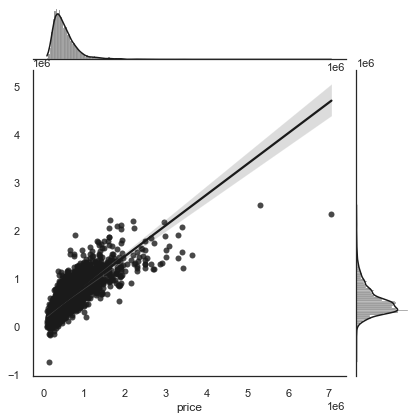

In [ ]:
sns.set(style="darkgrid", color_codes=True)

with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_LR1_predts, kind="reg", color="k")

### Lasso model

In [ ]:
Lasso1 = Lasso(alpha=1)
Lasso1.fit(X_train, y_train)

#predicting result over test data
y_Lasso1_predtr= Lasso1.predict(X_train)
y_Lasso1_predts= Lasso1.predict(X_test)

Lasso1.coef_

array([      0.        ,  -10261.83888128,   74898.84466637,
         -9783.10274602,   18554.45362752,   54392.26796741,
         36210.3180586 ,   11810.14160339,  174019.0342232 ,
         38523.51567458, -114656.54932823,    2424.80472499,
         -4377.87064343,   47568.73884491,   25774.55686723,
        -10166.97486825])

In [ ]:
pd.DataFrame({"Feature":X_train.columns.tolist(),"Coefficients":Lasso1.coef_})

Feature   Coefficients
0              const       0.000000
1           room_bed  -10261.838881
2          room_bath   74898.844666
3        lot_measure   -9783.102746
4               ceil   18554.453628
5              coast   54392.267967
6              sight   36210.318059
7          condition   11810.141603
8            quality  174019.034223
9           basement   38523.515675
10          yr_built -114656.549328
11      yr_renovated    2424.804725
12           zipcode   -4377.870643
13  living_measure15   47568.738845
14         furnished   25774.556867
15  has_basement_Yes  -10166.974868

In [ ]:
#Model score and Deduction for each Model in a DataFrame
Lasso1_trscore=r2_score(y_train,y_Lasso1_predtr)
Lasso1_trRMSE=np.sqrt(mean_squared_error(y_train, y_Lasso1_predtr))
Lasso1_trMSE=mean_squared_error(y_train, y_Lasso1_predtr)
Lasso1_trMAE=mean_absolute_error(y_train, y_Lasso1_predtr)
Lasso1_trMAPE = MAPE(y_train, y_Lasso1_predtr)

Lasso1_tsscore=r2_score(y_test,y_Lasso1_predts)
Lasso1_tsRMSE=np.sqrt(mean_squared_error(y_test, y_Lasso1_predts))
Lasso1_tsMSE=mean_squared_error(y_test, y_Lasso1_predts)
Lasso1_tsMAE=mean_absolute_error(y_test, y_Lasso1_predts)
Lasso1_tsMAPE = MAPE(y_test, y_Lasso1_predts)

Lasso1_df=pd.DataFrame({'Method':['Linear-Reg Lasso1'],'test Score':Lasso1_tsscore,'RMSE_test': Lasso1_tsRMSE, 'MSE_test': Lasso1_tsMSE, 'MAE_test': Lasso1_tsMAE,'MAPE_test': Lasso1_tsMAPE, 'train Score':Lasso1_trscore,'RMSE_tr': Lasso1_trRMSE, 'MSE_tr': Lasso1_trMSE, 'MAE_tr': Lasso1_trMAE, 'MAPE_tr': Lasso1_trMAPE})
Compa_df = pd.concat([Compa_df, Lasso1_df])

Compa_df

Method  test Score      RMSE_test      MSE_test       MAE_test  \
0  Linear Reg Model1    0.630328  219677.440431  4.825818e+10  137362.144533   
0  Linear-Reg Lasso1    0.630328  219677.500034  4.825820e+10  137361.774448   

   MAPE_test  train Score        RMSE_tr        MSE_tr         MAE_tr  \
0  28.554889     0.620381  227565.994097  5.178628e+10  143898.198264   
0  28.554805     0.620381  227565.994165  5.178628e+10  143897.794844   

     MAPE_tr  
0  29.933046  
0  29.932955

In [ ]:
np.round(Lasso1_df, decimals = 3)

Method  test Score  RMSE_test      MSE_test    MAE_test  \
0  Linear-Reg Lasso1        0.63   219677.5  4.825820e+10  137361.774   

   MAPE_test  train Score     RMSE_tr        MSE_tr      MAE_tr  MAPE_tr  
0     28.555         0.62  227565.994  5.178628e+10  143897.795   29.933

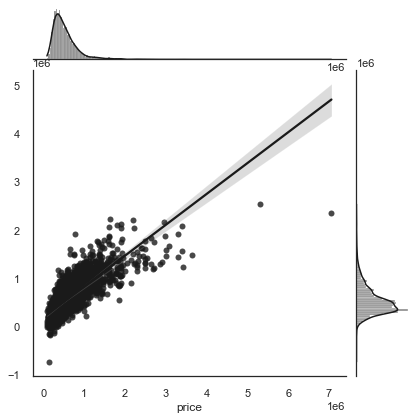

In [ ]:
sns.set(style="darkgrid", color_codes=True)

with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_Lasso1_predts, kind="reg", color="k")

### Ridge model

In [ ]:
Ridge1 = Ridge(alpha=0.5)
Ridge1.fit(X_train, y_train)

#predicting result over test data
y_Ridge1_predtr= Ridge1.predict(X_train)
y_Ridge1_predts= Ridge1.predict(X_test)

Ridge1.coef_

array([      0.        ,  -10261.4994337 ,   74896.64012122,
         -9783.58166579,   18556.97737725,   54391.41044154,
         36211.69611914,   11812.77630692,  174000.25981875,
         38526.50710443, -114648.06807631,    2427.75565282,
         -4377.62394517,   47572.6443304 ,   25784.57883771,
        -10167.56854954])

In [ ]:
pd.DataFrame({"Feature":X_train.columns.tolist(),"Coefficients":Ridge1.coef_})

Feature   Coefficients
0              const       0.000000
1           room_bed  -10261.499434
2          room_bath   74896.640121
3        lot_measure   -9783.581666
4               ceil   18556.977377
5              coast   54391.410442
6              sight   36211.696119
7          condition   11812.776307
8            quality  174000.259819
9           basement   38526.507104
10          yr_built -114648.068076
11      yr_renovated    2427.755653
12           zipcode   -4377.623945
13  living_measure15   47572.644330
14         furnished   25784.578838
15  has_basement_Yes  -10167.568550

In [ ]:
#Model score and Deduction for each Model in a DataFrame
Ridge1_trscore=r2_score(y_train,y_Ridge1_predtr)
Ridge1_trRMSE=np.sqrt(mean_squared_error(y_train, y_Ridge1_predtr))
Ridge1_trMSE=mean_squared_error(y_train, y_Ridge1_predtr)
Ridge1_trMAE=mean_absolute_error(y_train, y_Ridge1_predtr)
Ridge1_trMAPE=MAPE(y_train, y_Ridge1_predtr)

Ridge1_tsscore=r2_score(y_test,y_Ridge1_predts)
Ridge1_tsRMSE=np.sqrt(mean_squared_error(y_test, y_Ridge1_predts))
Ridge1_tsMSE=mean_squared_error(y_test, y_Ridge1_predts)
Ridge1_tsMAE=mean_absolute_error(y_test, y_Ridge1_predts)
Ridge1_tsMAPE=MAPE(y_train, y_Ridge1_predtr)

Ridge1_df=pd.DataFrame({'Method':['Linear-Reg Ridge1'],'test Score':Ridge1_tsscore,'RMSE_test': Ridge1_tsRMSE, 'MSE_test': Ridge1_tsMSE, 'MAE_test': Ridge1_tsMAE,'MAPE_test': Ridge1_tsMAPE, 'train Score':Ridge1_trscore,'RMSE_tr': Ridge1_trRMSE, 'MSE_tr': Ridge1_trMSE, 'MAE_tr': Ridge1_trMAE, 'MAPE_tr': Ridge1_trMAPE})
Compa_df = pd.concat([Compa_df, Ridge1_df])

Compa_df

Method  test Score      RMSE_test      MSE_test       MAE_test  \
0  Linear Reg Model1    0.630328  219677.440431  4.825818e+10  137362.144533   
0  Linear-Reg Lasso1    0.630328  219677.500034  4.825820e+10  137361.774448   
0  Linear-Reg Ridge1    0.630328  219677.403278  4.825816e+10  137360.624692   

   MAPE_test  train Score        RMSE_tr        MSE_tr         MAE_tr  \
0  28.554889     0.620381  227565.994097  5.178628e+10  143898.198264   
0  28.554805     0.620381  227565.994165  5.178628e+10  143897.794844   
0  29.932490     0.620381  227565.994427  5.178628e+10  143896.641957   

     MAPE_tr  
0  29.933046  
0  29.932955  
0  29.932490

In [ ]:
np.round(Ridge1_df, decimals=3)

Method  test Score   RMSE_test      MSE_test    MAE_test  \
0  Linear-Reg Ridge1        0.63  219677.403  4.825816e+10  137360.625   

   MAPE_test  train Score     RMSE_tr        MSE_tr      MAE_tr  MAPE_tr  
0     29.932         0.62  227565.994  5.178628e+10  143896.642   29.932

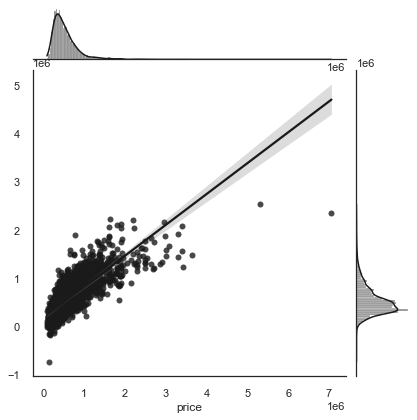

In [ ]:
sns.set(style="darkgrid", color_codes=True)

with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_Ridge1_predts, kind="reg", color="k")

### KNN Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn1 = KNeighborsRegressor(n_neighbors=4,weights='distance')
knn1.fit(X_train, y_train)

#predicting result over test data
y_knn1_predtr= knn1.predict(X_train)
y_knn1_predts= knn1.predict(X_test)

In [ ]:
#Model score and Deduction for each Model in a DataFrame
knn1_trscore=r2_score(y_train,y_knn1_predtr)
knn1_trRMSE=np.sqrt(mean_squared_error(y_train, y_knn1_predtr))
knn1_trMSE=mean_squared_error(y_train, y_knn1_predtr)
knn1_trMAE=mean_absolute_error(y_train, y_knn1_predtr)
knn1_trMAPE=MAPE(y_train, y_knn1_predtr)

knn1_tsscore=r2_score(y_test,y_knn1_predts)
knn1_tsRMSE=np.sqrt(mean_squared_error(y_test, y_knn1_predts))
knn1_tsMSE=mean_squared_error(y_test, y_knn1_predts)
knn1_tsMAE=mean_absolute_error(y_test, y_knn1_predts)
knn1_tsMAPE=MAPE(y_test, y_knn1_predts)

knn1_df=pd.DataFrame({'Method':['knn1'],'test Score':knn1_tsscore,'RMSE_test': knn1_tsRMSE, 'MSE_test': knn1_tsMSE, 'MAE_test': knn1_tsMAE,'MAPE_test': knn1_tsMAPE, 'train Score':knn1_trscore,'RMSE_tr': knn1_trRMSE, 'MSE_tr': knn1_trMSE, 'MAE_tr': knn1_trMAE, 'MAPE_tr': knn1_trMAPE})
Compa_df = pd.concat([Compa_df, knn1_df])

Compa_df

Method  test Score      RMSE_test      MSE_test       MAE_test  \
0  Linear Reg Model1    0.630328  219677.440431  4.825818e+10  137362.144533   
0  Linear-Reg Lasso1    0.630328  219677.500034  4.825820e+10  137361.774448   
0  Linear-Reg Ridge1    0.630328  219677.403278  4.825816e+10  137360.624692   
0               knn1    0.686038  202449.156764  4.098566e+10  120494.320904   

   MAPE_test  train Score        RMSE_tr        MSE_tr         MAE_tr  \
0  28.554889     0.620381  227565.994097  5.178628e+10  143898.198264   
0  28.554805     0.620381  227565.994165  5.178628e+10  143897.794844   
0  29.932490     0.620381  227565.994427  5.178628e+10  143896.641957   
0  23.760468     0.999232   10237.178840  1.047998e+08     964.891053   

     MAPE_tr  
0  29.933046  
0  29.932955  
0  29.932490  
0   0.279427

In [ ]:
np.round(knn1_df, decimals=3)

Method  test Score   RMSE_test      MSE_test    MAE_test  MAPE_test  \
0   knn1       0.686  202449.157  4.098566e+10  120494.321      23.76   

   train Score    RMSE_tr        MSE_tr   MAE_tr  MAPE_tr  
0        0.999  10237.179  1.047998e+08  964.891    0.279

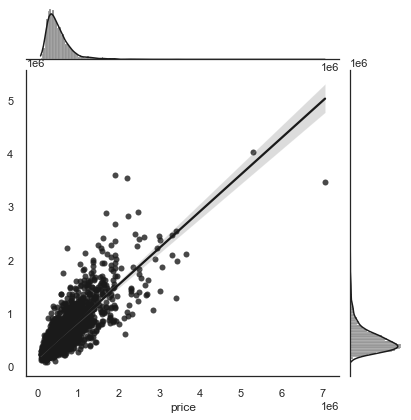

In [ ]:
sns.set(style="darkgrid", color_codes=True)

with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_knn1_predts, kind="reg", color="k")

### Support vector regressor

In [ ]:
from sklearn.svm import SVR

SVR1 = SVR(C=1.0, epsilon=0.2,kernel='rbf')
SVR1.fit(X_train, y_train)

y_SVR1_predtr= SVR1.predict(X_train)
y_SVR1_predts= SVR1.predict(X_test)

In [ ]:
#Model score and Deduction for each Model in a DataFrame
SVR1_trscore=r2_score(y_train,y_SVR1_predtr)
SVR1_trRMSE=np.sqrt(mean_squared_error(y_train, y_SVR1_predtr))
SVR1_trMSE=mean_squared_error(y_train, y_SVR1_predtr)
SVR1_trMAE=mean_absolute_error(y_train, y_SVR1_predtr)
SVR1_trMAPE=MAPE(y_train, y_SVR1_predtr)

SVR1_tsscore=r2_score(y_test,y_SVR1_predts)
SVR1_tsRMSE=np.sqrt(mean_squared_error(y_test, y_SVR1_predts))
SVR1_tsMSE=mean_squared_error(y_test, y_SVR1_predts)
SVR1_tsMAE=mean_absolute_error(y_test, y_SVR1_predts)
SVR1_tsMAPE=MAPE(y_test, y_SVR1_predts)

SVR1_df=pd.DataFrame({'Method':['SVR1'],'test Score':SVR1_tsscore,'RMSE_test': SVR1_tsRMSE, 'MSE_test': SVR1_tsMSE, 'MAE_test': SVR1_tsMAE,'MAPE_test':SVR1_tsMAPE, 'train Score':SVR1_trscore,'RMSE_tr': SVR1_trRMSE, 'MSE_tr': SVR1_trMSE, 'MAE_tr': SVR1_trMAE, 'MAPE_tr': SVR1_trMAPE})
Compa_df = pd.concat([Compa_df, SVR1_df])

Compa_df

Method  test Score      RMSE_test      MSE_test       MAE_test  \
0  Linear Reg Model1    0.630328  219677.440431  4.825818e+10  137362.144533   
0  Linear-Reg Lasso1    0.630328  219677.500034  4.825820e+10  137361.774448   
0  Linear-Reg Ridge1    0.630328  219677.403278  4.825816e+10  137360.624692   
0               knn1    0.686038  202449.156764  4.098566e+10  120494.320904   
0               SVR1   -0.053112  370778.661361  1.374768e+11  219203.242831   

   MAPE_test  train Score        RMSE_tr        MSE_tr         MAE_tr  \
0  28.554889     0.620381  227565.994097  5.178628e+10  143898.198264   
0  28.554805     0.620381  227565.994165  5.178628e+10  143897.794844   
0  29.932490     0.620381  227565.994427  5.178628e+10  143896.641957   
0  23.760468     0.999232   10237.178840  1.047998e+08     964.891053   
0  42.503752    -0.058310  379961.801842  1.443710e+11  222261.001539   

     MAPE_tr  
0  29.933046  
0  29.932955  
0  29.932490  
0   0.279427  
0  42.477781

In [ ]:
np.round(SVR1_df, decimals=3)

Method  test Score   RMSE_test      MSE_test    MAE_test  MAPE_test  \
0   SVR1      -0.053  370778.661  1.374768e+11  219203.243     42.504   

   train Score     RMSE_tr        MSE_tr      MAE_tr  MAPE_tr  
0       -0.058  379961.802  1.443710e+11  222261.002   42.478

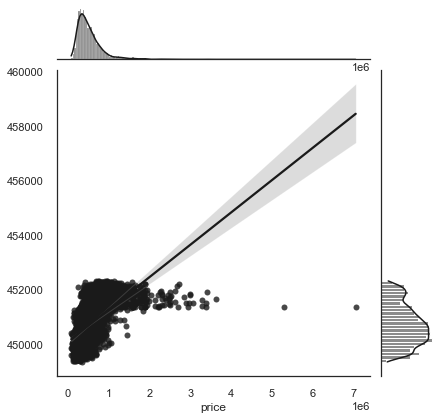

In [ ]:
sns.set(style="darkgrid", color_codes=True)

with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_SVR1_predts, kind="reg", color="k")

### Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
DT1 = DecisionTreeRegressor()
DT1.fit(X_train, y_train)

y_DT1_predtr= DT1.predict(X_train)
y_DT1_predts= DT1.predict(X_test)

In [ ]:
#Model score and Deduction for each Model in a DataFrame
DT1_trscore=r2_score(y_train,y_DT1_predtr)
DT1_trRMSE=np.sqrt(mean_squared_error(y_train, y_DT1_predtr))
DT1_trMSE=mean_squared_error(y_train, y_DT1_predtr)
DT1_trMAE=mean_absolute_error(y_train, y_DT1_predtr)
DT1_trMAPE=MAPE(y_train, y_DT1_predtr)

DT1_tsscore=r2_score(y_test,y_DT1_predts)
DT1_tsRMSE=np.sqrt(mean_squared_error(y_test, y_DT1_predts))
DT1_tsMSE=mean_squared_error(y_test, y_DT1_predts)
DT1_tsMAE=mean_absolute_error(y_test, y_DT1_predts)
DT1_tsMAPE=MAPE(y_test, y_DT1_predts)

DT1_df=pd.DataFrame({'Method':['DT1'],'test Score':DT1_tsscore,'RMSE_test': DT1_tsRMSE, 'MSE_test': DT1_tsMSE, 'MAE_test': DT1_tsMAE,'MAPE_test': DT1_tsMAPE, 'train Score':DT1_trscore,'RMSE_tr': DT1_trRMSE, 'MSE_tr': DT1_trMSE, 'MAE_tr': DT1_trMAE, 'MAPE_tr': DT1_trMAPE})
Compa_df = pd.concat([Compa_df, DT1_df])

Compa_df

Method  test Score      RMSE_test      MSE_test       MAE_test  \
0  Linear Reg Model1    0.630328  219677.440431  4.825818e+10  137362.144533   
0  Linear-Reg Lasso1    0.630328  219677.500034  4.825820e+10  137361.774448   
0  Linear-Reg Ridge1    0.630328  219677.403278  4.825816e+10  137360.624692   
0               knn1    0.686038  202449.156764  4.098566e+10  120494.320904   
0               SVR1   -0.053112  370778.661361  1.374768e+11  219203.242831   
0                DT1    0.608300  226127.908221  5.113383e+10  120919.414955   

   MAPE_test  train Score        RMSE_tr        MSE_tr         MAE_tr  \
0  28.554889     0.620381  227565.994097  5.178628e+10  143898.198264   
0  28.554805     0.620381  227565.994165  5.178628e+10  143897.794844   
0  29.932490     0.620381  227565.994427  5.178628e+10  143896.641957   
0  23.760468     0.999232   10237.178840  1.047998e+08     964.891053   
0  42.503752    -0.058310  379961.801842  1.443710e+11  222261.001539   
0  22.465923     0.999232   10237.178840  1.047998e+08     964.885249   

     MAPE_tr  
0  29.933046  
0  29.932955  
0  29.932490  
0   0.279427  
0  42.477781  
0   0.279426

In [ ]:
np.round(DT1_df, decimals=3)

Method  test Score   RMSE_test      MSE_test    MAE_test  MAPE_test  \
0    DT1       0.608  226127.908  5.113383e+10  120919.415     22.466   

   train Score    RMSE_tr        MSE_tr   MAE_tr  MAPE_tr  
0        0.999  10237.179  1.047998e+08  964.885    0.279

In [ ]:
DT2 = DecisionTreeRegressor(max_depth=30,min_samples_leaf=5)
DT2.fit(X_train, y_train)

y_DT2_predtr= DT2.predict(X_train)
y_DT2_predts= DT2.predict(X_test)

In [ ]:
#Model score and Deduction for each Model in a DataFrame
DT2_trscore=r2_score(y_train,y_DT2_predtr)
DT2_trRMSE=np.sqrt(mean_squared_error(y_train, y_DT2_predtr))
DT2_trMSE=mean_squared_error(y_train, y_DT2_predtr)
DT2_trMAE=mean_absolute_error(y_train, y_DT2_predtr)
DT2_trMAPE=MAPE(y_train, y_DT2_predtr)

DT2_tsscore=r2_score(y_test,y_DT2_predts)
DT2_tsRMSE=np.sqrt(mean_squared_error(y_test, y_DT2_predts))
DT2_tsMSE=mean_squared_error(y_test, y_DT2_predts)
DT2_tsMAE=mean_absolute_error(y_test, y_DT2_predts)
DT2_tsMAPE=MAPE(y_test, y_DT2_predts)

DT2_df=pd.DataFrame({'Method':['DT2'],'test Score':DT2_tsscore,'RMSE_test': DT2_tsRMSE, 'MSE_test': DT2_tsMSE, 'MAE_test': DT2_tsMAE,'MAPE_test': DT2_tsMAPE, 'train Score':DT2_trscore,'RMSE_tr': DT2_trRMSE, 'MSE_tr': DT2_trMSE, 'MAE_tr': DT2_trMAE, 'MAPE_tr': DT2_trMAPE})
Compa_df = pd.concat([Compa_df, DT2_df])

Compa_df

Method  test Score      RMSE_test      MSE_test       MAE_test  \
0  Linear Reg Model1    0.630328  219677.440431  4.825818e+10  137362.144533   
0  Linear-Reg Lasso1    0.630328  219677.500034  4.825820e+10  137361.774448   
0  Linear-Reg Ridge1    0.630328  219677.403278  4.825816e+10  137360.624692   
0               knn1    0.686038  202449.156764  4.098566e+10  120494.320904   
0               SVR1   -0.053112  370778.661361  1.374768e+11  219203.242831   
0                DT1    0.608300  226127.908221  5.113383e+10  120919.414955   
0                DT2    0.705736  195995.270487  3.841415e+10  108159.881622   

   MAPE_test  train Score        RMSE_tr        MSE_tr         MAE_tr  \
0  28.554889     0.620381  227565.994097  5.178628e+10  143898.198264   
0  28.554805     0.620381  227565.994165  5.178628e+10  143897.794844   
0  29.932490     0.620381  227565.994427  5.178628e+10  143896.641957   
0  23.760468     0.999232   10237.178840  1.047998e+08     964.891053   
0  42.503752    -0.058310  379961.801842  1.443710e+11  222261.001539   
0  22.465923     0.999232   10237.178840  1.047998e+08     964.885249   
0  20.300532     0.895749  119254.144527  1.422155e+10   67044.851292   

     MAPE_tr  
0  29.933046  
0  29.932955  
0  29.932490  
0   0.279427  
0  42.477781  
0   0.279426  
0  12.572525

In [ ]:
np.round(DT2_df, decimals=3)

Method  test Score  RMSE_test      MSE_test    MAE_test  MAPE_test  \
0    DT2       0.706  195995.27  3.841415e+10  108159.882     20.301   

   train Score     RMSE_tr        MSE_tr     MAE_tr  MAPE_tr  
0        0.896  119254.145  1.422155e+10  67044.851   12.573

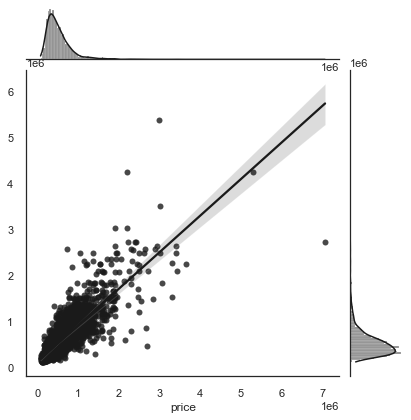

In [ ]:
sns.set(style="darkgrid", color_codes=True)

with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_DT2_predts, kind="reg", color="k")

### c.Interpretation of the model(s)

In [ ]:
np.round(Compa_df, decimals=3)

Method  test Score   RMSE_test      MSE_test    MAE_test  \
0  Linear Reg Model1       0.630  219677.440  4.825818e+10  137362.145   
0  Linear-Reg Lasso1       0.630  219677.500  4.825820e+10  137361.774   
0  Linear-Reg Ridge1       0.630  219677.403  4.825816e+10  137360.625   
0               knn1       0.686  202449.157  4.098566e+10  120494.321   
0               SVR1      -0.053  370778.661  1.374768e+11  219203.243   
0                DT1       0.608  226127.908  5.113383e+10  120919.415   
0                DT2       0.706  195995.270  3.841415e+10  108159.882   

   MAPE_test  train Score     RMSE_tr        MSE_tr      MAE_tr  MAPE_tr  
0     28.555        0.620  227565.994  5.178628e+10  143898.198   29.933  
0     28.555        0.620  227565.994  5.178628e+10  143897.795   29.933  
0     29.932        0.620  227565.994  5.178628e+10  143896.642   29.932  
0     23.760        0.999   10237.179  1.047998e+08     964.891    0.279  
0     42.504       -0.058  379961.802  1.443710e+11  222261.002   42.478  
0     22.466        0.999   10237.179  1.047998e+08     964.885    0.279  
0     20.301        0.896  119254.145  1.422155e+10   67044.851   12.573

### 2). Model Tuning and business implication

### a.Ensemble modelling

#### Boosting and Bagging

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor

In [ ]:
GB1=GradientBoostingRegressor(random_state=42)
GB1.fit(X_train, y_train)

y_GB1_predtr= GB1.predict(X_train)
y_GB1_predts= GB1.predict(X_test)

In [ ]:
#Model score and Deduction for each Model in a DataFrame
GB1_trscore=r2_score(y_train,y_GB1_predtr)
GB1_trRMSE=np.sqrt(mean_squared_error(y_train, y_GB1_predtr))
GB1_trMSE=mean_squared_error(y_train, y_GB1_predtr)
GB1_trMAE=mean_absolute_error(y_train, y_GB1_predtr)
GB1_trMAPE=MAPE(y_train, y_GB1_predtr)

GB1_tsscore=r2_score(y_test,y_GB1_predts)
GB1_tsRMSE=np.sqrt(mean_squared_error(y_test, y_GB1_predts))
GB1_tsMSE=mean_squared_error(y_test, y_GB1_predts)
GB1_tsMAE=mean_absolute_error(y_test, y_GB1_predts)
GB1_tsMAPE=MAPE(y_test, y_GB1_predts)

GB1_df=pd.DataFrame({'Method':['GB1'],'test Score':GB1_tsscore,'RMSE_test': GB1_tsRMSE, 'MSE_test': GB1_tsMSE, 'MAE_test': GB1_tsMAE,'MAPE_test': GB1_tsMAPE, 'train Score':GB1_trscore,'RMSE_tr': GB1_trRMSE, 'MSE_tr': GB1_trMSE, 'MAE_tr': GB1_trMAE, 'MAPE_tr': GB1_trMAPE})
Compa_df = pd.concat([Compa_df, GB1_df])

Compa_df

Method  test Score      RMSE_test      MSE_test       MAE_test  \
0  Linear Reg Model1    0.630328  219677.440431  4.825818e+10  137362.144533   
0  Linear-Reg Lasso1    0.630328  219677.500034  4.825820e+10  137361.774448   
0  Linear-Reg Ridge1    0.630328  219677.403278  4.825816e+10  137360.624692   
0               knn1    0.686038  202449.156764  4.098566e+10  120494.320904   
0               SVR1   -0.053112  370778.661361  1.374768e+11  219203.242831   
0                DT1    0.608300  226127.908221  5.113383e+10  120919.414955   
0                DT2    0.705736  195995.270487  3.841415e+10  108159.881622   
0                GB1    0.783704  168035.580192  2.823596e+10  102355.324106   

   MAPE_test  train Score        RMSE_tr        MSE_tr         MAE_tr  \
0  28.554889     0.620381  227565.994097  5.178628e+10  143898.198264   
0  28.554805     0.620381  227565.994165  5.178628e+10  143897.794844   
0  29.932490     0.620381  227565.994427  5.178628e+10  143896.641957   
0  23.760468     0.999232   10237.178840  1.047998e+08     964.891053   
0  42.503752    -0.058310  379961.801842  1.443710e+11  222261.001539   
0  22.465923     0.999232   10237.178840  1.047998e+08     964.885249   
0  20.300532     0.895749  119254.144527  1.422155e+10   67044.851292   
0  20.442281     0.832719  151062.662825  2.281993e+10  100397.872838   

     MAPE_tr  
0  29.933046  
0  29.932955  
0  29.932490  
0   0.279427  
0  42.477781  
0   0.279426  
0  12.572525  
0  20.712898

In [ ]:
np.round(GB1_df, decimals=3)

Method  test Score  RMSE_test      MSE_test    MAE_test  MAPE_test  \
0    GB1       0.784  168035.58  2.823596e+10  102355.324     20.442   

   train Score     RMSE_tr        MSE_tr      MAE_tr  MAPE_tr  
0        0.833  151062.663  2.281993e+10  100397.873   20.713

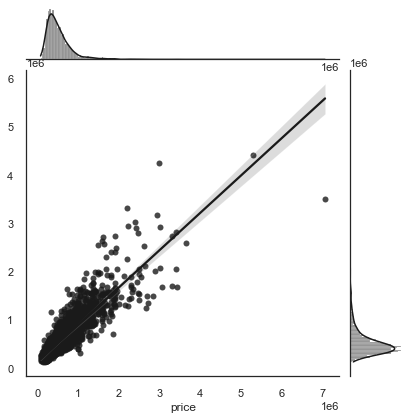

In [ ]:
sns.set(style="darkgrid", color_codes=True)

with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_GB1_predts, kind="reg", color="k")

#### Bagging

In [ ]:
BGG1=BaggingRegressor(random_state=42)
BGG1.fit(X_train, y_train)

y_BGG1_predtr= BGG1.predict(X_train)
y_BGG1_predts= BGG1.predict(X_test)

In [ ]:
#Model score and Deduction for each Model in a DataFrame
BGG1_trscore=r2_score(y_train,y_BGG1_predtr)
BGG1_trRMSE=np.sqrt(mean_squared_error(y_train, y_BGG1_predtr))
BGG1_trMSE=mean_squared_error(y_train, y_BGG1_predtr)
BGG1_trMAE=mean_absolute_error(y_train, y_BGG1_predtr)
BGG1_trMAPE=MAPE(y_train, y_BGG1_predtr)

BGG1_tsscore=r2_score(y_test,y_BGG1_predts)
BGG1_tsRMSE=np.sqrt(mean_squared_error(y_test, y_BGG1_predts))
BGG1_tsMSE=mean_squared_error(y_test, y_BGG1_predts)
BGG1_tsMAE=mean_absolute_error(y_test, y_BGG1_predts)
BGG1_tsMAPE=MAPE(y_test, y_BGG1_predts)

BGG1_df=pd.DataFrame({'Method':['BGG1'],'test Score':BGG1_tsscore,'RMSE_test': BGG1_tsRMSE, 'MSE_test':BGG1_tsMSE, 'MAE_test': BGG1_tsMAE,'MAPE_test': BGG1_tsMAPE, 'train Score':BGG1_trscore,'RMSE_tr': BGG1_trRMSE, 'MSE_tr': BGG1_trMSE, 'MAE_tr': BGG1_trMAE, 'MAPE_tr': BGG1_trMAPE})
Compa_df = pd.concat([Compa_df, BGG1_df])

Compa_df

Method  test Score      RMSE_test      MSE_test       MAE_test  \
0  Linear Reg Model1    0.630328  219677.440431  4.825818e+10  137362.144533   
0  Linear-Reg Lasso1    0.630328  219677.500034  4.825820e+10  137361.774448   
0  Linear-Reg Ridge1    0.630328  219677.403278  4.825816e+10  137360.624692   
0               knn1    0.686038  202449.156764  4.098566e+10  120494.320904   
0               SVR1   -0.053112  370778.661361  1.374768e+11  219203.242831   
0                DT1    0.608300  226127.908221  5.113383e+10  120919.414955   
0                DT2    0.705736  195995.270487  3.841415e+10  108159.881622   
0                GB1    0.783704  168035.580192  2.823596e+10  102355.324106   
0               BGG1    0.767768  174116.005124  3.031638e+10   93924.405822   

   MAPE_test  train Score        RMSE_tr        MSE_tr         MAE_tr  \
0  28.554889     0.620381  227565.994097  5.178628e+10  143898.198264   
0  28.554805     0.620381  227565.994165  5.178628e+10  143897.794844   
0  29.932490     0.620381  227565.994427  5.178628e+10  143896.641957   
0  23.760468     0.999232   10237.178840  1.047998e+08     964.891053   
0  42.503752    -0.058310  379961.801842  1.443710e+11  222261.001539   
0  22.465923     0.999232   10237.178840  1.047998e+08     964.885249   
0  20.300532     0.895749  119254.144527  1.422155e+10   67044.851292   
0  20.442281     0.832719  151062.662825  2.281993e+10  100397.872838   
0  17.594451     0.960212   73673.260081  5.427749e+09   38461.597178   

     MAPE_tr  
0  29.933046  
0  29.932955  
0  29.932490  
0   0.279427  
0  42.477781  
0   0.279426  
0  12.572525  
0  20.712898  
0   7.334814

In [ ]:
np.round(BGG1_df, decimals=3)

Method  test Score   RMSE_test      MSE_test   MAE_test  MAPE_test  \
0   BGG1       0.768  174116.005  3.031638e+10  93924.406     17.594   

   train Score   RMSE_tr        MSE_tr     MAE_tr  MAPE_tr  
0         0.96  73673.26  5.427749e+09  38461.597    7.335

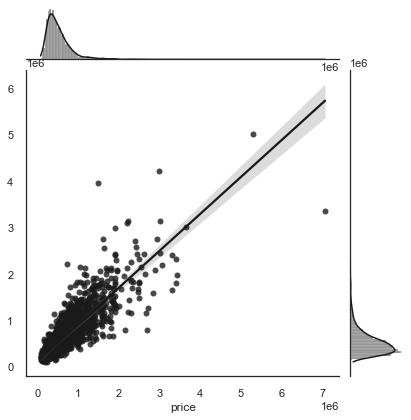

In [ ]:
sns.set(style="darkgrid", color_codes=True)

with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_BGG1_predts, kind="reg", color="k")

#### Random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
RF1=RandomForestRegressor()
RF1.fit(X_train, y_train)

y_RF1_predtr= RF1.predict(X_train)
y_RF1_predts= RF1.predict(X_test)

In [ ]:
#Model score and Deduction for each Model in a DataFrame
RF1_trscore=r2_score(y_train,y_RF1_predtr)
RF1_trRMSE=np.sqrt(mean_squared_error(y_train, y_RF1_predtr))
RF1_trMSE=mean_squared_error(y_train, y_RF1_predtr)
RF1_trMAE=mean_absolute_error(y_train, y_RF1_predtr)
RF1_trMAPE=MAPE(y_train, y_RF1_predtr)

RF1_tsscore=r2_score(y_test,y_RF1_predts)
RF1_tsRMSE=np.sqrt(mean_squared_error(y_test, y_RF1_predts))
RF1_tsMSE=mean_squared_error(y_test, y_RF1_predts)
RF1_tsMAE=mean_absolute_error(y_test, y_RF1_predts)
RF1_tsMAPE=MAPE(y_test, y_RF1_predts)

RF1_df=pd.DataFrame({'Method':['RF1'],'test Score':RF1_tsscore,'RMSE_test': RF1_tsRMSE, 'MSE_test':RF1_tsMSE, 'MAE_test': RF1_tsMAE, 'MAPE_test': RF1_tsMAPE,'train Score':RF1_trscore,'RMSE_tr': RF1_trRMSE, 'MSE_tr': RF1_trMSE, 'MAE_tr': RF1_trMAE, 'MAPE_tr': RF1_trMAPE})
Compa_df = pd.concat([Compa_df, RF1_df])

Compa_df

Method  test Score      RMSE_test      MSE_test       MAE_test  \
0  Linear Reg Model1    0.630328  219677.440431  4.825818e+10  137362.144533   
0  Linear-Reg Lasso1    0.630328  219677.500034  4.825820e+10  137361.774448   
0  Linear-Reg Ridge1    0.630328  219677.403278  4.825816e+10  137360.624692   
0               knn1    0.686038  202449.156764  4.098566e+10  120494.320904   
0               SVR1   -0.053112  370778.661361  1.374768e+11  219203.242831   
0                DT1    0.608300  226127.908221  5.113383e+10  120919.414955   
0                DT2    0.705736  195995.270487  3.841415e+10  108159.881622   
0                GB1    0.783704  168035.580192  2.823596e+10  102355.324106   
0               BGG1    0.767768  174116.005124  3.031638e+10   93924.405822   
0                RF1    0.795909  163226.004153  2.664273e+10   88130.736670   

   MAPE_test  train Score        RMSE_tr        MSE_tr         MAE_tr  \
0  28.554889     0.620381  227565.994097  5.178628e+10  143898.198264   
0  28.554805     0.620381  227565.994165  5.178628e+10  143897.794844   
0  29.932490     0.620381  227565.994427  5.178628e+10  143896.641957   
0  23.760468     0.999232   10237.178840  1.047998e+08     964.891053   
0  42.503752    -0.058310  379961.801842  1.443710e+11  222261.001539   
0  22.465923     0.999232   10237.178840  1.047998e+08     964.885249   
0  20.300532     0.895749  119254.144527  1.422155e+10   67044.851292   
0  20.442281     0.832719  151062.662825  2.281993e+10  100397.872838   
0  17.594451     0.960212   73673.260081  5.427749e+09   38461.597178   
0  16.705250     0.971475   62380.308374  3.891303e+09   34294.856985   

     MAPE_tr  
0  29.933046  
0  29.932955  
0  29.932490  
0   0.279427  
0  42.477781  
0   0.279426  
0  12.572525  
0  20.712898  
0   7.334814  
0   6.627406

In [ ]:
np.round(RF1_df, decimals=3)

Method  test Score   RMSE_test      MSE_test   MAE_test  MAPE_test  \
0    RF1       0.796  163226.004  2.664273e+10  88130.737     16.705   

   train Score    RMSE_tr        MSE_tr     MAE_tr  MAPE_tr  
0        0.971  62380.308  3.891303e+09  34294.857    6.627

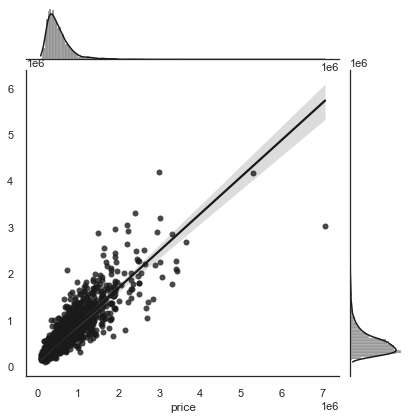

In [ ]:
sns.set(style="darkgrid", color_codes=True)

with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_RF1_predts, kind="reg", color="k")

#### XGBoost

In [ ]:
import xgboost
print(xgboost.__version__)

1.6.0


In [ ]:
from xgboost.sklearn import XGBRegressor
XG=XGBRegressor(random_state=42)
XG.fit(X_train, y_train)

y_XG_predtr= XG.predict(X_train)
y_XG_predts= XG.predict(X_test)

In [ ]:
#Model score and Deduction for each Model in a DataFrame
XG_trscore=r2_score(y_train,y_XG_predtr)
XG_trRMSE=np.sqrt(mean_squared_error(y_train, y_XG_predtr))
XG_trMSE=mean_squared_error(y_train, y_XG_predtr)
XG_trMAE=mean_absolute_error(y_train, y_XG_predtr)
XG_trMAPE=MAPE(y_train, y_XG_predtr)

XG_tsscore=r2_score(y_test,y_XG_predts)
XG_tsRMSE=np.sqrt(mean_squared_error(y_test, y_XG_predts))
XG_tsMSE=mean_squared_error(y_test, y_XG_predts)
XG_tsMAE=mean_absolute_error(y_test, y_XG_predts)
XG_tsMAPE=MAPE(y_test, y_XG_predts)

XG=pd.DataFrame({'Method':['XGBoost'],'test Score':XG_tsscore,'RMSE_test': XG_tsRMSE, 'MSE_test':XG_tsMSE, 'MAE_test': XG_tsMAE, 'MAPE_test': XG_tsMAPE,'train Score':XG_trscore,'RMSE_tr': XG_trRMSE, 'MSE_tr': XG_trMSE, 'MAE_tr': XG_trMAE, 'MAPE_tr': XG_trMAPE})
Compa_df = pd.concat([Compa_df, XG])
Compa_df

Method  test Score      RMSE_test      MSE_test       MAE_test  \
0  Linear Reg Model1    0.630328  219677.440431  4.825818e+10  137362.144533   
0  Linear-Reg Lasso1    0.630328  219677.500034  4.825820e+10  137361.774448   
0  Linear-Reg Ridge1    0.630328  219677.403278  4.825816e+10  137360.624692   
0               knn1    0.686038  202449.156764  4.098566e+10  120494.320904   
0               SVR1   -0.053112  370778.661361  1.374768e+11  219203.242831   
0                DT1    0.608300  226127.908221  5.113383e+10  120919.414955   
0                DT2    0.705736  195995.270487  3.841415e+10  108159.881622   
0                GB1    0.783704  168035.580192  2.823596e+10  102355.324106   
0               BGG1    0.767768  174116.005124  3.031638e+10   93924.405822   
0                RF1    0.795909  163226.004153  2.664273e+10   88130.736670   
0            XGBoost    0.830767  148634.549694  2.209223e+10   78813.054339   

   MAPE_test  train Score        RMSE_tr        MSE_tr         MAE_tr  \
0  28.554889     0.620381  227565.994097  5.178628e+10  143898.198264   
0  28.554805     0.620381  227565.994165  5.178628e+10  143897.794844   
0  29.932490     0.620381  227565.994427  5.178628e+10  143896.641957   
0  23.760468     0.999232   10237.178840  1.047998e+08     964.891053   
0  42.503752    -0.058310  379961.801842  1.443710e+11  222261.001539   
0  22.465923     0.999232   10237.178840  1.047998e+08     964.885249   
0  20.300532     0.895749  119254.144527  1.422155e+10   67044.851292   
0  20.442281     0.832719  151062.662825  2.281993e+10  100397.872838   
0  17.594451     0.960212   73673.260081  5.427749e+09   38461.597178   
0  16.705250     0.971475   62380.308374  3.891303e+09   34294.856985   
0  14.855625     0.960201   73683.482170  5.429256e+09   52452.815551   

     MAPE_tr  
0  29.933046  
0  29.932955  
0  29.932490  
0   0.279427  
0  42.477781  
0   0.279426  
0  12.572525  
0  20.712898  
0   7.334814  
0   6.627406  
0  11.345522

In [ ]:
np.round(XG, decimals=3)

Method  test Score  RMSE_test      MSE_test   MAE_test  MAPE_test  \
0  XGBoost       0.831  148634.55  2.209223e+10  78813.054     14.856   

   train Score    RMSE_tr        MSE_tr     MAE_tr  MAPE_tr  
0         0.96  73683.482  5.429256e+09  52452.816   11.346

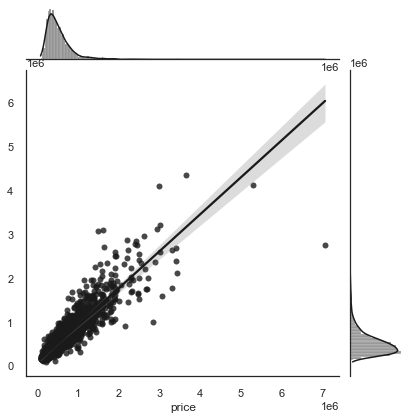

In [ ]:
sns.set(style="darkgrid", color_codes=True)

with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_XG_predts, kind="reg", color="k")

In [ ]:
np.round(Compa_df, decimals=2)

Method  test Score  RMSE_test      MSE_test   MAE_test  \
0  Linear Reg Model1        0.63  219677.44  4.825818e+10  137362.14   
0  Linear-Reg Lasso1        0.63  219677.50  4.825820e+10  137361.77   
0  Linear-Reg Ridge1        0.63  219677.40  4.825816e+10  137360.62   
0               knn1        0.69  202449.16  4.098566e+10  120494.32   
0               SVR1       -0.05  370778.66  1.374768e+11  219203.24   
0                DT1        0.61  226127.91  5.113383e+10  120919.41   
0                DT2        0.71  195995.27  3.841415e+10  108159.88   
0                GB1        0.78  168035.58  2.823596e+10  102355.32   
0               BGG1        0.77  174116.01  3.031638e+10   93924.41   
0                RF1        0.80  163226.00  2.664273e+10   88130.74   
0            XGBoost        0.83  148634.55  2.209223e+10   78813.05   

   MAPE_test  train Score    RMSE_tr        MSE_tr     MAE_tr  MAPE_tr  
0      28.55         0.62  227565.99  5.178628e+10  143898.20    29.93  
0      28.55         0.62  227565.99  5.178628e+10  143897.79    29.93  
0      29.93         0.62  227565.99  5.178628e+10  143896.64    29.93  
0      23.76         1.00   10237.18  1.047998e+08     964.89     0.28  
0      42.50        -0.06  379961.80  1.443710e+11  222261.00    42.48  
0      22.47         1.00   10237.18  1.047998e+08     964.89     0.28  
0      20.30         0.90  119254.14  1.422155e+10   67044.85    12.57  
0      20.44         0.83  151062.66  2.281993e+10  100397.87    20.71  
0      17.59         0.96   73673.26  5.427749e+09   38461.60     7.33  
0      16.71         0.97   62380.31  3.891303e+09   34294.86     6.63  
0      14.86         0.96   73683.48  5.429256e+09   52452.82    11.35

***Enseble models: in summary ensemble models have performed well on training and test sets. As XGBoost is giving the best test score so we decided to proceed with it for further analysis with hypertuning***

### b. Any other model tuning measures

### HYPERTUNING with Gridsearch CV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

### Tuning XGBoost

#### XGBoost is chosen for tuning as it is giving the best result in test set.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

In [ ]:
#Regularization using GridSearchCV - 1st Iteration
XGB_ht=XGBRegressor(objective='reg:squarederror')
params = {
    "colsample_bytree": [1],
    "learning_rate": [0.1, 0.01],
    "n_estimators": [1000],
    "subsample": [0.6, 0.8],
    "max_depth": [5, 10],
    "min_child_weight": [1]
}
XGB_GV = GridSearchCV(estimator = XGB_ht, param_grid = params,
                        cv=3,
                        verbose = 1,
                       return_train_score=True,n_jobs=-1)
XGB_GV.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                              

In [ ]:
XGB_GV.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimators': 1000,
 'subsample': 0.8}

#### Best paramters are used for this model with 75:25 split.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
#Choosing best parameter
xgb_best = XGBRegressor(colsample_bytree=1,learning_rate=0.1,n_estimators=1000,subsample=0.8,
                         random_state=42,max_depth=5,min_child_weight=1)

xgb_best.fit(X_train,y_train)
y_xgb_best_predtr= xgb_best.predict(X_train)
y_xgb_best_predts= xgb_best.predict(X_test)

In [ ]:
#Model score and Deduction for each Model in a DataFrame
xgb_best_trscore=r2_score(y_train,y_xgb_best_predtr)
xgb_best_trRMSE=np.sqrt(mean_squared_error(y_train, y_xgb_best_predtr))
xgb_best_trMSE=mean_squared_error(y_train, y_xgb_best_predtr)
xgb_best_trMAE=mean_absolute_error(y_train, y_xgb_best_predtr)
xgb_best_trMAPE=MAPE(y_train, y_xgb_best_predtr)

xgb_best_tsscore=r2_score(y_test,y_xgb_best_predts)
xgb_best_tsRMSE=np.sqrt(mean_squared_error(y_test, y_xgb_best_predts))
xgb_best_tsMSE=mean_squared_error(y_test, y_xgb_best_predts)
xgb_best_tsMAE=mean_absolute_error(y_test, y_xgb_best_predts)
xgb_best_tsMAPE=MAPE(y_test, y_xgb_best_predts)

xgb_best_df7525 = pd.DataFrame({'Method':['xgb_best_75:25'],'train Score':xgb_best_trscore,'RMSE_tr': xgb_best_trRMSE, 'MSE_tr': xgb_best_trMSE, 'MAE_tr': xgb_best_trMAE, 'MAPE_tr': xgb_best_trMAPE,'test Score':xgb_best_tsscore,'RMSE_ts': xgb_best_tsRMSE, 'MSE_ts': xgb_best_tsMSE, 'MAE_ts': xgb_best_tsMAE, 'MAPE_ts': xgb_best_tsMAPE})
#xgb_best_1_df = pd.concat([GBRF_df, GBRF_df_80_20])
xgb_best_df7525
#GBRF_df

Method  train Score       RMSE_tr        MSE_tr        MAE_tr  \
0  xgb_best_75:25     0.976639  56451.497075  3.186772e+09  40892.640417   

    MAPE_tr  test Score        RMSE_ts        MSE_ts        MAE_ts    MAPE_ts  
0  9.254294    0.848845  140471.462089  1.973223e+10  75134.649547  14.233177

#### Best paramters are used for this model with 70:30 split.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [ ]:
xgb_best = XGBRegressor(colsample_bytree=1,learning_rate=0.1,n_estimators=1000,subsample=0.8,
                         random_state=42,max_depth=5,min_child_weight=1)

xgb_best.fit(X_train,y_train)
y_xgb_best_predtr= xgb_best.predict(X_train)
y_xgb_best_predts= xgb_best.predict(X_test)

In [ ]:
#Model score and Deduction for each Model in a DataFrame
xgb_best_trscore=r2_score(y_train,y_xgb_best_predtr)
xgb_best_trRMSE=np.sqrt(mean_squared_error(y_train, y_xgb_best_predtr))
xgb_best_trMSE=mean_squared_error(y_train, y_xgb_best_predtr)
xgb_best_trMAE=mean_absolute_error(y_train, y_xgb_best_predtr)
xgb_best_trMAPE=MAPE(y_train, y_xgb_best_predtr)

xgb_best_tsscore=r2_score(y_test,y_xgb_best_predts)
xgb_best_tsRMSE=np.sqrt(mean_squared_error(y_test, y_xgb_best_predts))
xgb_best_tsMSE=mean_squared_error(y_test, y_xgb_best_predts)
xgb_best_tsMAE=mean_absolute_error(y_test, y_xgb_best_predts)
xgb_best_tsMAPE=MAPE(y_test, y_xgb_best_predts)

xgb_best_df7030 = pd.DataFrame({'Method':['xgb_best_70:30'],'train Score':xgb_best_trscore,'RMSE_tr': xgb_best_trRMSE, 'MSE_tr': xgb_best_trMSE, 'MAE_tr': xgb_best_trMAE, 'MAPE_tr': xgb_best_trMAPE,'test Score':xgb_best_tsscore,'RMSE_ts': xgb_best_tsRMSE, 'MSE_ts': xgb_best_tsMSE, 'MAE_ts': xgb_best_tsMAE, 'MAPE_ts': xgb_best_tsMAPE})
xgb_best_df7525 = pd.concat([xgb_best_df7525, xgb_best_df7030])
xgb_best_df7525

Method  train Score       RMSE_tr        MSE_tr        MAE_tr  \
0  xgb_best_75:25     0.976639  56451.497075  3.186772e+09  40892.640417   
0  xgb_best_70:30     0.977850  55368.427019  3.065663e+09  40120.680593   

    MAPE_tr  test Score        RMSE_ts        MSE_ts        MAE_ts    MAPE_ts  
0  9.254294    0.848845  140471.462089  1.973223e+10  75134.649547  14.233177  
0  9.094158    0.844761  140346.357288  1.969710e+10  76251.091063  14.454848

#### Best paramters are used for this model with 67:33 split.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [ ]:
xgb_best = XGBRegressor(colsample_bytree=1,learning_rate=0.1,n_estimators=1000,subsample=0.8,
                         random_state=42,max_depth=5,min_child_weight=1)

xgb_best.fit(X_train,y_train)
y_xgb_best_predtr= xgb_best.predict(X_train)
y_xgb_best_predts= xgb_best.predict(X_test)

In [ ]:
#Model score and Deduction for each Model in a DataFrame
xgb_best_trscore=r2_score(y_train,y_xgb_best_predtr)
xgb_best_trRMSE=np.sqrt(mean_squared_error(y_train, y_xgb_best_predtr))
xgb_best_trMSE=mean_squared_error(y_train, y_xgb_best_predtr)
xgb_best_trMAE=mean_absolute_error(y_train, y_xgb_best_predtr)
xgb_best_trMAPE=MAPE(y_train, y_xgb_best_predtr)

xgb_best_tsscore=r2_score(y_test,y_xgb_best_predts)
xgb_best_tsRMSE=np.sqrt(mean_squared_error(y_test, y_xgb_best_predts))
xgb_best_tsMSE=mean_squared_error(y_test, y_xgb_best_predts)
xgb_best_tsMAE=mean_absolute_error(y_test, y_xgb_best_predts)
xgb_best_tsMAPE=MAPE(y_test, y_xgb_best_predts)

xgb_best_df6733 = pd.DataFrame({'Method':['xgb_best_67:33'],'train Score':xgb_best_trscore,'RMSE_tr': xgb_best_trRMSE, 'MSE_tr': xgb_best_trMSE, 'MAE_tr': xgb_best_trMAE, 'MAPE_tr': xgb_best_trMAPE,'test Score':xgb_best_tsscore,'RMSE_ts': xgb_best_tsRMSE, 'MSE_ts': xgb_best_tsMSE, 'MAE_ts': xgb_best_tsMAE, 'MAPE_ts': xgb_best_tsMAPE})
xgb_best_df7525 = pd.concat([xgb_best_df7525, xgb_best_df6733])
xgb_best_df7525

Method  train Score       RMSE_tr        MSE_tr        MAE_tr  \
0  xgb_best_75:25     0.976639  56451.497075  3.186772e+09  40892.640417   
0  xgb_best_70:30     0.977850  55368.427019  3.065663e+09  40120.680593   
0  xgb_best_67:33     0.979321  53186.000049  2.828751e+09  38673.370400   

    MAPE_tr  test Score        RMSE_ts        MSE_ts        MAE_ts    MAPE_ts  
0  9.254294    0.848845  140471.462089  1.973223e+10  75134.649547  14.233177  
0  9.094158    0.844761  140346.357288  1.969710e+10  76251.091063  14.454848  
0  8.822260    0.851013  139823.038306  1.955048e+10  77168.410852  14.564544

#### Best paramters are used for this model with 80:20 split.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [ ]:
xgb_best = XGBRegressor(colsample_bytree=1,learning_rate=0.1,n_estimators=1000,subsample=0.8,
                         random_state=42,max_depth=5,min_child_weight=1)

xgb_best.fit(X_train,y_train)
y_xgb_best_predtr= xgb_best.predict(X_train)
y_xgb_best_predts= xgb_best.predict(X_test)

In [ ]:
#Model score and Deduction for each Model in a DataFrame
xgb_best_trscore=r2_score(y_train,y_xgb_best_predtr)
xgb_best_trRMSE=np.sqrt(mean_squared_error(y_train, y_xgb_best_predtr))
xgb_best_trMSE=mean_squared_error(y_train, y_xgb_best_predtr)
xgb_best_trMAE=mean_absolute_error(y_train, y_xgb_best_predtr)
xgb_best_trMAPE=MAPE(y_train, y_xgb_best_predtr)

xgb_best_tsscore=r2_score(y_test,y_xgb_best_predts)
xgb_best_tsRMSE=np.sqrt(mean_squared_error(y_test, y_xgb_best_predts))
xgb_best_tsMSE=mean_squared_error(y_test, y_xgb_best_predts)
xgb_best_tsMAE=mean_absolute_error(y_test, y_xgb_best_predts)
xgb_best_tsMAPE=MAPE(y_test, y_xgb_best_predts)

xgb_best_df8020 = pd.DataFrame({'Method':['xgb_best_80:20'],'train Score':xgb_best_trscore,'RMSE_tr': xgb_best_trRMSE, 'MSE_tr': xgb_best_trMSE, 'MAE_tr': xgb_best_trMAE, 'MAPE_tr': xgb_best_trMAPE,'test Score':xgb_best_tsscore,'RMSE_ts': xgb_best_tsRMSE, 'MSE_ts': xgb_best_tsMSE, 'MAE_ts': xgb_best_tsMAE, 'MAPE_ts': xgb_best_tsMAPE})
xgb_best_df7525 = pd.concat([xgb_best_df7525, xgb_best_df8020])
xgb_best_df7525

Method  train Score       RMSE_tr        MSE_tr        MAE_tr  \
0  xgb_best_75:25     0.976639  56451.497075  3.186772e+09  40892.640417   
0  xgb_best_70:30     0.977850  55368.427019  3.065663e+09  40120.680593   
0  xgb_best_67:33     0.979321  53186.000049  2.828751e+09  38673.370400   
0  xgb_best_80:20     0.975627  58181.732796  3.385114e+09  42183.262879   

    MAPE_tr  test Score        RMSE_ts        MSE_ts        MAE_ts    MAPE_ts  
0  9.254294    0.848845  140471.462089  1.973223e+10  75134.649547  14.233177  
0  9.094158    0.844761  140346.357288  1.969710e+10  76251.091063  14.454848  
0  8.822260    0.851013  139823.038306  1.955048e+10  77168.410852  14.564544  
0  9.475269    0.852672  132423.852424  1.753608e+10  72282.051760  14.109795

In [ ]:
np.round(xgb_best_df7525, decimals=3)

Method  train Score    RMSE_tr        MSE_tr     MAE_tr  MAPE_tr  \
0  xgb_best_75:25        0.977  56451.497  3.186772e+09  40892.640    9.254   
0  xgb_best_70:30        0.978  55368.427  3.065663e+09  40120.681    9.094   
0  xgb_best_67:33        0.979  53186.000  2.828751e+09  38673.370    8.822   
0  xgb_best_80:20        0.976  58181.733  3.385114e+09  42183.263    9.475   

   test Score     RMSE_ts        MSE_ts     MAE_ts  MAPE_ts  
0       0.849  140471.462  1.973223e+10  75134.650   14.233  
0       0.845  140346.357  1.969710e+10  76251.091   14.455  
0       0.851  139823.038  1.955048e+10  77168.411   14.565  
0       0.853  132423.852  1.753608e+10  72282.052   14.110

### c. Interpretation of the most optimum model and its implication on the business

Modified XGBoost Regressor is the most optimum model with 80:20 train-test split.

In [ ]:
#Feature importance function
def feat_imp(model,X_data_set):
    imp_feature_1=pd.DataFrame(model.feature_importances_, columns = ["Imp"], index = X_data_set.columns)
    imp_feature_1=imp_feature_1.sort_values(by="Imp",ascending=False)
    print(imp_feature_1)

    #feature importance
    plt.figure(figsize=(10,10))
    imp_feature_1[:30].plot.bar(figsize=(15,5))

    #First 20, 25 and 30 feature importance sum
    print("\nFirst 10 feature importance:\t",(imp_feature_1[:10].sum())*100)
    print("\nFirst 16 feature importance:\t",(imp_feature_1[:16].sum())*100)


                       Imp
quality           0.404305
coast             0.241285
furnished         0.093889
sight             0.048235
room_bath         0.047703
zipcode           0.039984
yr_built          0.031757
living_measure15  0.020945
basement          0.015528
ceil              0.013757
condition         0.012942
room_bed          0.012352
yr_renovated      0.010020
lot_measure       0.007297
const             0.000000
has_basement_Yes  0.000000

First 10 feature importance:	 Imp    95.738892
dtype: float32

First 16 feature importance:	 Imp    100.000015
dtype: float32


<Figure size 720x720 with 0 Axes>

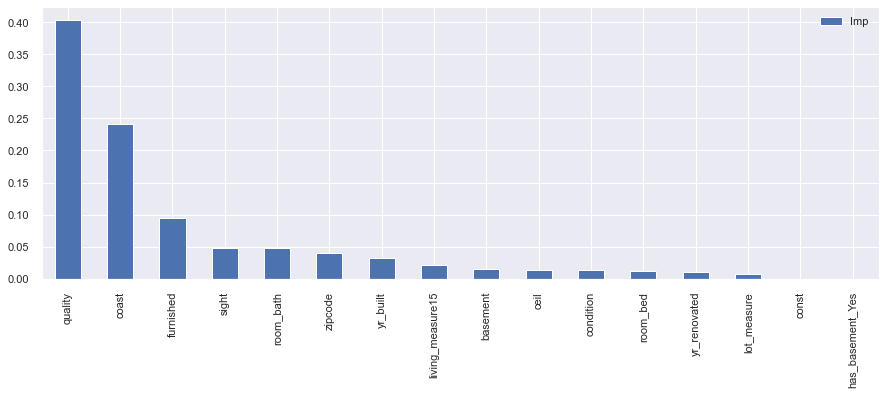

In [ ]:
feat_imp(xgb_best, X_train)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

num_folds = 50

kfold = KFold(n_splits=num_folds)
results = cross_val_score(xgb_best, X_test, y_test, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.86168065 0.80829351 0.8476917  0.88475252 0.79188652 0.77864904
 0.83231868 0.80550545 0.81402165 0.78539181 0.83124445 0.89966214
 0.83349521 0.85844063 0.73228096 0.81102922 0.73543529 0.75054002
 0.74440385 0.83041978 0.75583346 0.8376631  0.82549243 0.80819613
 0.59682665 0.88674479 0.74274464 0.8625959  0.72028277 0.70491675
 0.83183522 0.88553189 0.79206551 0.8458621  0.83820535 0.83564754
 0.84129606 0.83398335 0.90762144 0.79882872 0.7258817  0.88074898
 0.80433252 0.84670382 0.88214999 0.71929683 0.88914596 0.66643669
 0.67501534 0.92343535]
Accuracy: 80.805% (6.785%)


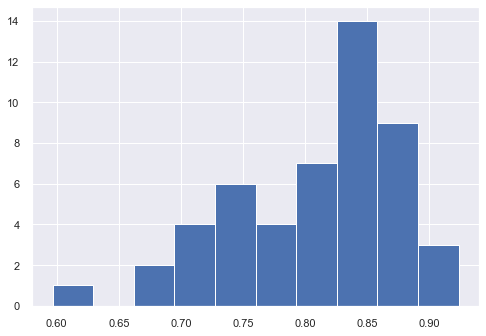

95.0 confidence interval 66.8% and 90.6%
Average accuracy result on test data is 80.805%:


In [ ]:
from matplotlib import pyplot
# plot scores
pyplot.hist(results)
pyplot.show()
# confidence intervals
alpha = 0.95                     # for 95% confidence
p = ((1.0-alpha)/2.0) * 100      # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(results, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(results, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))
print('Average accuracy result on test data is %.3f%%:' % (np.mean(results)*100))

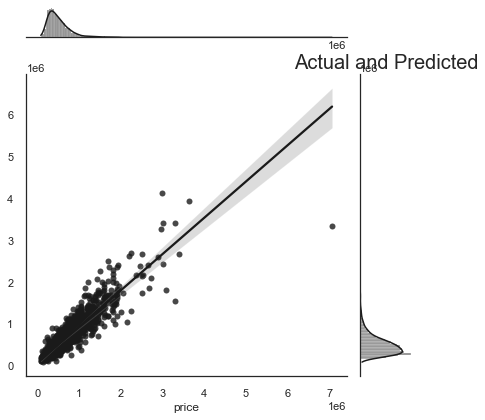

In [ ]:
sns.set(style="darkgrid", color_codes=True)

with sns.axes_style("white"):

    sns.jointplot(x=y_test, y=xgb_best.predict(X_test), kind="reg", color="k")
    plt.title('Actual and Predicted', fontsize=20)       # Plot heading
    plt.xlabel('Actual', fontsize=10)                     # X-label
    plt.ylabel('Predicted', fontsize=10)
    plt.tight_layout()

The best performance is given by tuned XGBoost Regression model having 80:20 train-test split with training (score: 0.976, RMSE: 57967.136) and test (score: 0.853, RSME: 132482.471). The 95% confidence interval scores range from 0.67 to 0.90.

The top key features to consider for pricing a property is mainly based on quality of the house, whether its near coast or not, how many it’s visited, living room area in 2015 (implies-- some renovations), bath rooms, ceil, basement and yr_built.

So, one needs to thoroughly introspect its property on parameters suggested and list its price accordingly, similarly if one wants buy house - needs to check the features suggested above in house and calculate the predicted price. The same can then be
compared to listed price.